# 📥 Descargar TP

📅 **Fecha:** 15/05/2024

---

## 🎯 Objetivo

Este notebook tiene como propósito principal la descarga de datos de **precipitación** proporcionados por **Copernicus**, **exclusivamente para Colombia**, y **hasta el rango máximo de años disponible**, que sabemos comienza en **1950**.

---

## 🧠 Justificación

Al revisar la base de datos de inventarios por moviemntos observamos que dentro del inventario de movimientos en masa existen puntos con registros **anteriores a 1981**, que es el año más antiguo disponible en nuestros datos actuales. Por esta razón, es necesario ampliar el rango temporal hasta el máximo permitido por Copernicus.

---

## ⚠️ Consideraciones

- Esta actividad **no altera el flujo actual** de trabajo, ya que está diseñada como parte de un proyecto **universitario** y **no está relacionada con los procesos de la empresa**.
- Se ha decidido **limitar la descarga a Colombia** y no a toda Sudamérica debido a **restricciones de almacenamiento en disco**. Descargar datos para toda la región generaría un archivo demasiado grande para manejar localmente.
- Más adelante, será necesario **verificar si el volumen de datos para Colombia es manejable** con los recursos disponibles.

---

✅ **Próximo paso:** Realizar la descarga de los datos de precipitación para Colombia desde Copernicus, desde 1950 hasta la fecha más reciente disponible.


In [1]:
import sys
import cdsapi
import os

path_globales = r"D:\OneDrive\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\src\utils"

if path_globales not in sys.path:
    sys.path.append(path_globales)

from time import gmtime, strftime,sleep
import pandas as pd
from tools import define_boundaries,boundaries,get_current_time
from datetime import datetime
import time

def pull_total_precipitation(start_year=1950, end_year=2025):
    """
    Función oficial para descarga de datos de precipitación para Colombia desde Copernicus.
    """

    global boundaries

    get_current_time()

    common_folder = r"D:\OneDrive\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\data\10_Copernicus\Especializacion"
    name_code_south = 'Colombia'
    area_bounds = [
                    boundaries[name_code_south]['lat_max'],
                    boundaries[name_code_south]['lon_min'],
                    boundaries[name_code_south]['lat_min'],
                    boundaries[name_code_south]['lon_max']
                ]

    print(f"Area: {area_bounds}\n")

    key_structure = {
                        ("reanalysis-era5-land", "era5l"): [('tp', "total_precipitation")]
                    }

    current_year = datetime.now().year
    current_month = datetime.now().month -1

    for (complete_db, short_name), list_vars in key_structure.items():
        var_path = os.path.join(common_folder, short_name)
        os.makedirs(var_path, exist_ok=True)

        for code_name, ecmwf_code in list_vars:
            print(f"- Downloading {ecmwf_code}\n")

            code_name_path = os.path.join(var_path, code_name)
            os.makedirs(code_name_path, exist_ok=True)

            requests = []
            skipped_files = []
            total_amount_files = 0
            
            for year in range(start_year, end_year + 1):
                last_month = current_month if year == current_year else 12

                for month in range(1, last_month + 1):
                    start_date = f"{year}-{month:02d}-01"
                    end_date = pd.date_range(start=start_date, periods=1, freq='ME')[0].strftime("%Y-%m-%d")
                    date_range = pd.date_range(start=start_date, end=end_date, freq='D')


                    total_amount_files += 1
                    monthly_filename_pais = f"COP_hourly_{code_name}_{year}_{month:02d}.nc"
                    target = os.path.join(code_name_path, monthly_filename_pais)

                    if os.path.exists(target):
                        skipped_files.append(monthly_filename_pais)
                        continue

                    request = {
                        "variable": ecmwf_code,
                        "year": str(year),
                        "month": f"{month:02d}",
                        "day": [date.strftime("%d") for date in date_range],
                        "time": [f"{h:02d}:00" for h in range(24)],
                        "data_format": "netcdf",
                        "download_format": "unarchived",
                        "area": area_bounds
                    }

                    requests.append((request, monthly_filename_pais, target))


            skiped_amount = len(skipped_files)
            print(f"Amount of files skipped: {skiped_amount}")
            print(f"Total months to be downloaded: {total_amount_files}")
            pctage = (skiped_amount / total_amount_files) * 100
            print(f"Percentage skipped: {pctage:.2f}%\n")

            if skiped_amount == total_amount_files:
                print(f"########## Var {code_name} Already completed ##########")
                continue

            elif skiped_amount > 10:
                print("Skipped files:")
                for file in skipped_files[:5]:
                    print(file)
                print("... Hidden Files ...")
                for file in skipped_files[-5:]:
                    print(file)
            else:
                for file in skipped_files:
                    print(file)

            client = cdsapi.Client()

            for request, monthly_filename_pais, target in requests:
                print(f"Working on: {monthly_filename_pais}")
                start_time = time.time()
                client.retrieve(complete_db, request, target=target)
                end_time = time.time()
                elapsed_time = (end_time - start_time) / 60
                print(f"\tSuccessfully downloaded {monthly_filename_pais} in {elapsed_time:.2f} minutes")

            print(f"\n\nDone {ecmwf_code}!!!\n")


    print("Done !! ")

    return None

# Run trial test.

In [13]:
catch_request = pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 15-05-2025 14:28:36


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation



In [16]:
catch_request[0]

({'variable': 'total_precipitation',
  'year': '1950',
  'month': '01',
  'day': ['01',
   '02',
   '03',
   '04',
   '05',
   '06',
   '07',
   '08',
   '09',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
   '19',
   '20',
   '21',
   '22',
   '23',
   '24',
   '25',
   '26',
   '27',
   '28',
   '29',
   '30',
   '31'],
  'time': ['00:00',
   '01:00',
   '02:00',
   '03:00',
   '04:00',
   '05:00',
   '06:00',
   '07:00',
   '08:00',
   '09:00',
   '10:00',
   '11:00',
   '12:00',
   '13:00',
   '14:00',
   '15:00',
   '16:00',
   '17:00',
   '18:00',
   '19:00',
   '20:00',
   '21:00',
   '22:00',
   '23:00'],
  'data_format': 'netcdf',
  'download_format': 'unarchived',
  'area': [12.590276718139648,
   -81.72014617919922,
   -4.236873626708984,
   -66.87045288085938]},
 'COP_hourly_tp_1950_01.nc',
 'D:\\OneDrive\\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\\01_CC_DOC\\data\\10_Copernicus\\Especializacion\\era5l\\tp\\COP_hourly_tp_1950_01.nc')

In [18]:
catch_request[-1]

({'variable': 'total_precipitation',
  'year': '2025',
  'month': '04',
  'day': ['01',
   '02',
   '03',
   '04',
   '05',
   '06',
   '07',
   '08',
   '09',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
   '19',
   '20',
   '21',
   '22',
   '23',
   '24',
   '25',
   '26',
   '27',
   '28',
   '29',
   '30'],
  'time': ['00:00',
   '01:00',
   '02:00',
   '03:00',
   '04:00',
   '05:00',
   '06:00',
   '07:00',
   '08:00',
   '09:00',
   '10:00',
   '11:00',
   '12:00',
   '13:00',
   '14:00',
   '15:00',
   '16:00',
   '17:00',
   '18:00',
   '19:00',
   '20:00',
   '21:00',
   '22:00',
   '23:00'],
  'data_format': 'netcdf',
  'download_format': 'unarchived',
  'area': [12.590276718139648,
   -81.72014617919922,
   -4.236873626708984,
   -66.87045288085938]},
 'COP_hourly_tp_2025_04.nc',
 'D:\\OneDrive\\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\\01_CC_DOC\\data\\10_Copernicus\\Especializacion\\era5l\\tp\\COP_hourly_tp_2025_04.nc')

In [ ]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 15-05-2025 14:14:29


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 0
Total months to be downloaded: 904
Percentage skipped: 0.00%



2025-05-15 14:14:30,320 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-15 14:14:30,321 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-15 14:14:30,322 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_1950_01.nc


2025-05-15 14:14:31,104 INFO Request ID is 981fcb42-8eaa-4f89-aa62-ce6acb09a51a
2025-05-15 14:14:31,395 INFO status has been updated to accepted
2025-05-15 14:14:40,478 INFO status has been updated to running
2025-05-15 14:15:05,175 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_01.nc in 3.94 minutes
Working on: COP_hourly_tp_1950_02.nc


2025-05-15 14:18:27,800 INFO Request ID is dd26d5ad-0f5e-42a1-b69a-a4d45a6d804a
2025-05-15 14:18:28,031 INFO status has been updated to accepted


In [42]:
print(f"Weight of files {(904 * 34)/1000:.2f} GB")

Weight of files 30.74 GB


In [1]:
import xarray as xr

nc_file = r"D:\OneDrive\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\data\10_Copernicus\Especializacion\era5l\tp\COP_hourly_tp_1950_01.nc"

In [6]:
file = xr.open_dataset(nc_file)

In [8]:
file

<xarray.Dataset> Size: 75MB
Dimensions:     (valid_time: 743, latitude: 169, longitude: 149)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 1950-01-01T01:00:00 ... 1950-...
  * latitude    (latitude) float64 1kB 12.56 12.46 12.36 ... -4.136 -4.237
  * longitude   (longitude) float64 1kB -81.72 -81.62 -81.52 ... -67.02 -66.92
    expver      (valid_time) <U4 12kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 75MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-15T19:08 GRIB to CDM+CF via cfgrib-0.9.1...

In [20]:
file.tp.max(dim= 'valid_time')

<xarray.DataArray 'tp' (latitude: 169, longitude: 149)> Size: 101kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.02563766, 0.02685844,
        0.02685695],
       [       nan,        nan,        nan, ..., 0.0263252 , 0.02748493,
        0.02697133],
       [       nan,        nan,        nan, ..., 0.02799291, 0.02668718,
        0.02568417]], shape=(169, 149), dtype=float32)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 1kB 12.56 12.46 12.36 ... -4.036 -4.136 -4.237
  * longitude  (longitude) float64 1kB -81.72 -81.62 -81.52 ... -67.02 -66.92

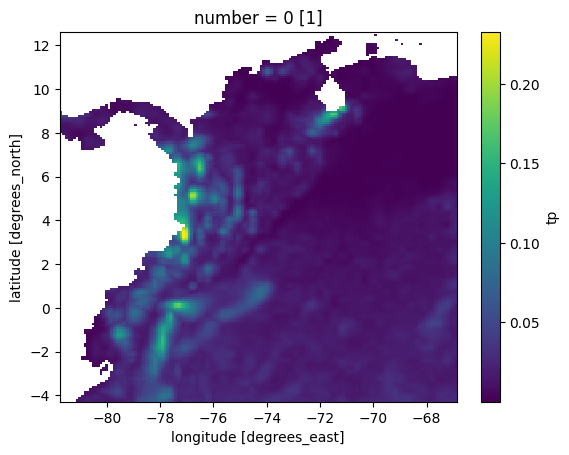

In [22]:
file.tp.max(dim= 'valid_time').plot()

# First Trial

In [4]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 15-05-2025 14:35:28


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 0
Total months to be downloaded: 904
Percentage skipped: 0.00%



2025-05-15 14:35:29,850 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-15 14:35:29,851 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-15 14:35:29,851 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_1950_01.nc


2025-05-15 14:35:30,443 INFO Request ID is ceda6363-ddc2-4704-8e37-46708793a485
2025-05-15 14:35:30,678 INFO status has been updated to accepted
2025-05-15 14:35:53,050 INFO status has been updated to running
2025-05-15 14:36:04,901 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_01.nc in 7.76 minutes
Working on: COP_hourly_tp_1950_02.nc


2025-05-15 14:43:16,897 INFO Request ID is 5cc52fe7-2b58-4312-ae08-415c37279682
2025-05-15 14:43:17,124 INFO status has been updated to accepted
2025-05-15 14:43:31,763 INFO status has been updated to running
2025-05-15 14:43:40,052 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(20103168 bytes read, 16634079 more expected)', IncompleteRead(20103168 bytes read, 16634079 more expected))

# Second Trial

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 15-05-2025 14:49:36


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 1
Total months to be downloaded: 904
Percentage skipped: 0.11%

COP_hourly_tp_1950_01.nc


2025-05-15 14:49:38,148 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-15 14:49:38,150 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-15 14:49:38,152 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_1950_02.nc


2025-05-15 14:49:38,749 INFO Request ID is 76e84b77-41b4-473f-acdd-d992521fbea8
2025-05-15 14:49:39,064 INFO status has been updated to accepted
2025-05-15 14:50:30,572 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_02.nc in 2.39 minutes
Working on: COP_hourly_tp_1950_03.nc


2025-05-15 14:52:03,109 INFO Request ID is fb72036b-7672-4d43-a590-e0ef05818799
2025-05-15 14:52:03,347 INFO status has been updated to accepted
2025-05-15 14:52:18,910 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_03.nc in 1.85 minutes
Working on: COP_hourly_tp_1950_04.nc


2025-05-15 14:53:53,701 INFO Request ID is ba6a9010-a69f-4710-bd15-0bd4df917b9f
2025-05-15 14:53:53,930 INFO status has been updated to accepted
2025-05-15 14:54:16,158 INFO status has been updated to running
2025-05-15 14:58:14,988 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_04.nc in 4.96 minutes
Working on: COP_hourly_tp_1950_05.nc


2025-05-15 14:58:50,761 INFO Request ID is 26b47b5c-5b89-4c56-8d99-f211a24801d9
2025-05-15 14:58:50,982 INFO status has been updated to accepted
2025-05-15 14:59:25,168 INFO status has been updated to running
2025-05-15 15:03:17,843 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(8323072 bytes read, 32901165 more expected)', IncompleteRead(8323072 bytes read, 32901165 more expected))

# 3 Trial

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 15-05-2025 15:06:50


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 4
Total months to be downloaded: 904
Percentage skipped: 0.44%

COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc


2025-05-15 15:06:51,705 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-15 15:06:51,707 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-15 15:06:51,708 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_1950_05.nc


2025-05-15 15:06:52,499 INFO Request ID is 6d28785c-d812-4109-920d-d3fa7a8b346e
2025-05-15 15:06:52,733 INFO status has been updated to accepted
2025-05-15 15:07:26,751 INFO status has been updated to running
2025-05-15 15:07:44,048 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_05.nc in 1.35 minutes
Working on: COP_hourly_tp_1950_06.nc


2025-05-15 15:08:13,265 INFO Request ID is 1a638d03-de53-433a-92bf-e723cae55679
2025-05-15 15:08:13,478 INFO status has been updated to accepted
2025-05-15 15:08:36,106 INFO status has been updated to running
2025-05-15 15:11:07,852 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_06.nc in 3.64 minutes
Working on: COP_hourly_tp_1950_07.nc


2025-05-15 15:11:51,752 INFO Request ID is aeeac38d-994b-4f1c-b72a-826ae89c49f2
2025-05-15 15:11:52,001 INFO status has been updated to accepted
2025-05-15 15:12:06,382 INFO status has been updated to running
2025-05-15 15:14:51,117 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_07.nc in 4.14 minutes
Working on: COP_hourly_tp_1950_08.nc


2025-05-15 15:16:00,695 INFO Request ID is bbfa310e-1376-4943-9c5f-cfc00620552c
2025-05-15 15:16:00,921 INFO status has been updated to accepted
2025-05-15 15:16:09,970 INFO status has been updated to running
2025-05-15 15:20:21,937 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_08.nc in 4.98 minutes
Working on: COP_hourly_tp_1950_09.nc


2025-05-15 15:20:59,005 INFO Request ID is 0d29acb2-8df8-4e0b-b4d7-d6f45688298f
2025-05-15 15:20:59,217 INFO status has been updated to accepted
2025-05-15 15:21:13,460 INFO status has been updated to running
2025-05-15 15:22:54,748 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_09.nc in 3.25 minutes
Working on: COP_hourly_tp_1950_10.nc


2025-05-15 15:24:14,739 INFO Request ID is 7dca206f-9af0-48f2-96ef-ed1f9e699fba
2025-05-15 15:24:14,974 INFO status has been updated to accepted
2025-05-15 15:24:37,136 INFO status has been updated to running
2025-05-15 15:28:35,965 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_10.nc in 4.78 minutes
Working on: COP_hourly_tp_1950_11.nc


2025-05-15 15:29:00,469 INFO Request ID is 78a97da8-cf1e-474a-bc03-483ea899c694
2025-05-15 15:29:00,705 INFO status has been updated to accepted
2025-05-15 15:29:09,739 INFO status has been updated to running
2025-05-15 15:30:56,533 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_11.nc in 2.65 minutes
Working on: COP_hourly_tp_1950_12.nc


2025-05-15 15:31:40,593 INFO Request ID is 44d257d5-899e-4010-8b32-68ea3884b061
2025-05-15 15:31:40,797 INFO status has been updated to accepted
2025-05-15 15:31:49,820 INFO status has been updated to running
2025-05-15 15:34:34,692 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1950_12.nc in 3.55 minutes
Working on: COP_hourly_tp_1951_01.nc


2025-05-15 15:35:12,493 INFO Request ID is c1b86d8e-edf0-4676-9fe5-1afc34e8ca19
2025-05-15 15:35:12,721 INFO status has been updated to accepted
2025-05-15 15:35:27,079 INFO status has been updated to running
2025-05-15 15:38:06,752 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_01.nc in 3.23 minutes
Working on: COP_hourly_tp_1951_02.nc


2025-05-15 15:38:25,715 INFO Request ID is 790c1a09-8507-4c2c-b553-cb0401d19a7a
2025-05-15 15:38:25,929 INFO status has been updated to accepted
2025-05-15 15:38:31,287 INFO status has been updated to running
2025-05-15 15:40:21,474 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_02.nc in 2.40 minutes
Working on: COP_hourly_tp_1951_03.nc


2025-05-15 15:40:49,716 INFO Request ID is ac656544-b4ba-43da-8f5c-6a0795f8accc
2025-05-15 15:40:50,244 INFO status has been updated to accepted
2025-05-15 15:40:59,222 INFO status has been updated to running
2025-05-15 15:43:44,175 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_03.nc in 3.29 minutes
Working on: COP_hourly_tp_1951_04.nc


2025-05-15 15:44:06,755 INFO Request ID is ba4fc423-4669-4608-bb7c-5beb9b667255
2025-05-15 15:44:06,960 INFO status has been updated to accepted
2025-05-15 15:44:29,187 INFO status has been updated to running
2025-05-15 15:47:01,175 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_04.nc in 3.69 minutes
Working on: COP_hourly_tp_1951_05.nc


2025-05-15 15:47:48,389 INFO Request ID is 8e5c8627-7bdf-439d-a8ea-98e613d48df3
2025-05-15 15:47:48,609 INFO status has been updated to accepted
2025-05-15 15:47:57,583 INFO status has been updated to running
2025-05-15 15:50:42,363 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_05.nc in 3.49 minutes
Working on: COP_hourly_tp_1951_06.nc


2025-05-15 15:51:17,563 INFO Request ID is 9c1f7cfd-5e96-4f50-9e97-81e30b51ce53
2025-05-15 15:51:17,766 INFO status has been updated to accepted
2025-05-15 15:51:32,307 INFO status has been updated to running
2025-05-15 15:51:40,106 INFO status has been updated to accepted
2025-05-15 15:51:51,753 INFO status has been updated to running
2025-05-15 15:54:11,887 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_06.nc in 3.33 minutes
Working on: COP_hourly_tp_1951_07.nc


2025-05-15 15:54:37,581 INFO Request ID is c63eaaad-c4e9-4567-aa23-658557f99816
2025-05-15 15:54:37,820 INFO status has been updated to accepted
2025-05-15 15:54:52,081 INFO status has been updated to running
2025-05-15 15:57:31,622 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_07.nc in 3.42 minutes
Working on: COP_hourly_tp_1951_08.nc


2025-05-15 15:58:02,650 INFO Request ID is 38963adb-77f1-4b3c-a374-f2384e292557
2025-05-15 15:58:02,947 INFO status has been updated to accepted
2025-05-15 15:58:08,518 INFO status has been updated to running
2025-05-15 16:00:57,055 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_08.nc in 3.69 minutes
Working on: COP_hourly_tp_1951_09.nc


2025-05-15 16:01:44,470 INFO Request ID is b7a9b379-b441-422c-b7ec-3e05a9a3026d
2025-05-15 16:01:44,684 INFO status has been updated to accepted
2025-05-15 16:02:19,540 INFO status has been updated to running
2025-05-15 16:04:39,850 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_09.nc in 3.39 minutes
Working on: COP_hourly_tp_1951_10.nc


2025-05-15 16:05:07,730 INFO Request ID is 14acdf44-caf9-4866-ba08-bf820bece216
2025-05-15 16:05:08,593 INFO status has been updated to accepted
2025-05-15 16:05:22,893 INFO status has been updated to running
2025-05-15 16:08:04,233 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_10.nc in 3.75 minutes
Working on: COP_hourly_tp_1951_11.nc


2025-05-15 16:08:52,632 INFO Request ID is 5094bc3b-9981-4ef6-87ba-262fdfa3c076
2025-05-15 16:08:52,872 INFO status has been updated to accepted
2025-05-15 16:09:43,813 INFO status has been updated to running
2025-05-15 16:11:46,783 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_11.nc in 3.65 minutes
Working on: COP_hourly_tp_1951_12.nc


2025-05-15 16:12:31,455 INFO Request ID is 76f6d64e-33fb-4378-a12a-841c8b6769cc
2025-05-15 16:12:31,670 INFO status has been updated to accepted
2025-05-15 16:12:45,935 INFO status has been updated to running
2025-05-15 16:15:25,581 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1951_12.nc in 3.25 minutes
Working on: COP_hourly_tp_1952_01.nc


2025-05-15 16:15:46,209 INFO Request ID is 17cc256b-8d3a-4604-b3a3-05e271066c92
2025-05-15 16:15:46,414 INFO status has been updated to accepted
2025-05-15 16:15:55,386 INFO status has been updated to running
2025-05-15 16:18:40,338 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_01.nc in 3.26 minutes
Working on: COP_hourly_tp_1952_02.nc


2025-05-15 16:19:01,656 INFO Request ID is fdedeaa2-eb71-4cd8-99bc-c0240983162e
2025-05-15 16:19:01,869 INFO status has been updated to accepted
2025-05-15 16:19:16,249 INFO status has been updated to running
2025-05-15 16:21:55,776 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_02.nc in 3.50 minutes
Working on: COP_hourly_tp_1952_03.nc


2025-05-15 16:22:31,580 INFO Request ID is d274b16c-3d01-4bd2-9c4f-e3bf9ff27c41
2025-05-15 16:22:31,788 INFO status has been updated to accepted
2025-05-15 16:22:40,871 INFO status has been updated to running
2025-05-15 16:24:27,330 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_03.nc in 2.53 minutes
Working on: COP_hourly_tp_1952_04.nc


2025-05-15 16:25:03,519 INFO Request ID is e5e9929f-c8b8-4d4e-859a-ed4317e9ad1b
2025-05-15 16:25:03,727 INFO status has been updated to accepted
2025-05-15 16:25:12,671 INFO status has been updated to running
2025-05-15 16:27:57,696 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_04.nc in 3.22 minutes
Working on: COP_hourly_tp_1952_05.nc


2025-05-15 16:28:17,045 INFO Request ID is a6354124-63f0-4c4f-8008-666694ebe7aa
2025-05-15 16:28:17,257 INFO status has been updated to accepted
2025-05-15 16:28:31,535 INFO status has been updated to running
2025-05-15 16:31:11,009 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_05.nc in 3.51 minutes
Working on: COP_hourly_tp_1952_06.nc


2025-05-15 16:31:47,390 INFO Request ID is 31131b54-7cf7-4d35-a7ab-d426eaace7a8
2025-05-15 16:31:47,601 INFO status has been updated to accepted
2025-05-15 16:32:21,187 INFO status has been updated to running
2025-05-15 16:34:41,370 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_06.nc in 3.88 minutes
Working on: COP_hourly_tp_1952_07.nc


2025-05-15 16:35:40,401 INFO Request ID is 38625a2a-99d3-4ce5-bb39-6f57878641f9
2025-05-15 16:35:40,605 INFO status has been updated to accepted
2025-05-15 16:35:49,599 INFO status has been updated to running
2025-05-15 16:35:54,918 INFO status has been updated to accepted
2025-05-15 16:36:02,746 INFO status has been updated to running
2025-05-15 16:38:34,468 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_07.nc in 4.27 minutes
Working on: COP_hourly_tp_1952_08.nc


2025-05-15 16:39:57,027 INFO Request ID is 503aef08-8696-4964-958c-bd1639b52912
2025-05-15 16:39:57,243 INFO status has been updated to accepted
2025-05-15 16:40:02,683 INFO status has been updated to running
2025-05-15 16:46:18,972 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_08.nc in 6.79 minutes
Working on: COP_hourly_tp_1952_09.nc


2025-05-15 16:46:44,314 INFO Request ID is ed604562-e5f9-4c3c-961b-ad1f94adcf77
2025-05-15 16:46:44,791 INFO status has been updated to accepted
2025-05-15 16:46:59,240 INFO status has been updated to running
2025-05-15 16:49:38,745 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_09.nc in 3.37 minutes
Working on: COP_hourly_tp_1952_10.nc


2025-05-15 16:50:06,278 INFO Request ID is aa9b13d9-3edb-4993-880c-7100864bc4f9
2025-05-15 16:50:06,483 INFO status has been updated to accepted
2025-05-15 16:50:28,479 INFO status has been updated to running
2025-05-15 16:53:00,220 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_10.nc in 4.06 minutes
Working on: COP_hourly_tp_1952_11.nc


2025-05-15 16:54:15,064 INFO Request ID is 1035d7c7-701b-4743-83e0-ccba21d3496c
2025-05-15 16:54:15,277 INFO status has been updated to accepted
2025-05-15 16:54:24,341 INFO status has been updated to running
2025-05-15 16:56:10,946 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_11.nc in 2.38 minutes
Working on: COP_hourly_tp_1952_12.nc


2025-05-15 16:56:32,658 INFO Request ID is 3dd56ab4-de2e-4599-9ea7-b7037201ad30
2025-05-15 16:56:32,900 INFO status has been updated to accepted
2025-05-15 16:56:47,194 INFO status has been updated to running
2025-05-15 17:00:53,943 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1952_12.nc in 4.90 minutes
Working on: COP_hourly_tp_1953_01.nc


2025-05-15 17:01:26,601 INFO Request ID is 43b5218c-f7ac-4e02-b443-c9e0549b526f
2025-05-15 17:01:26,819 INFO status has been updated to accepted
2025-05-15 17:01:41,282 INFO status has been updated to running
2025-05-15 17:05:48,221 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_01.nc in 4.90 minutes
Working on: COP_hourly_tp_1953_02.nc


2025-05-15 17:06:20,878 INFO Request ID is cbe5bf91-0bd5-4e85-80f0-fae62d0f1788
2025-05-15 17:06:21,185 INFO status has been updated to accepted
2025-05-15 17:06:36,746 INFO status has been updated to running
2025-05-15 17:09:16,271 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_02.nc in 3.38 minutes
Working on: COP_hourly_tp_1953_03.nc


2025-05-15 17:09:43,579 INFO Request ID is 1e5d8336-3368-4a9c-8d82-aa83a90fb92d
2025-05-15 17:09:43,800 INFO status has been updated to accepted
2025-05-15 17:10:34,894 INFO status has been updated to running
2025-05-15 17:12:37,725 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_03.nc in 3.33 minutes
Working on: COP_hourly_tp_1953_04.nc


2025-05-15 17:13:03,612 INFO Request ID is 16c69433-ff98-4d41-95f8-19f5cd077821
2025-05-15 17:13:03,849 INFO status has been updated to accepted
2025-05-15 17:13:13,099 INFO status has been updated to running
2025-05-15 17:15:57,874 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_04.nc in 3.29 minutes
Working on: COP_hourly_tp_1953_05.nc


2025-05-15 17:16:20,918 INFO Request ID is f5488569-eed7-4222-8828-bd3f4daabee6
2025-05-15 17:16:21,631 INFO status has been updated to accepted
2025-05-15 17:16:30,683 INFO status has been updated to running
2025-05-15 17:20:42,642 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_05.nc in 4.97 minutes
Working on: COP_hourly_tp_1953_06.nc


2025-05-15 17:21:19,187 INFO Request ID is 845eed6f-5e9c-4e09-9f22-b24d12562e0c
2025-05-15 17:21:19,536 INFO status has been updated to accepted
2025-05-15 17:23:15,498 INFO status has been updated to running
2025-05-15 17:25:42,014 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_06.nc in 4.98 minutes
Working on: COP_hourly_tp_1953_07.nc


2025-05-15 17:26:17,934 INFO Request ID is df37ac7b-e8b2-40ca-944f-0d995ccaa205
2025-05-15 17:26:18,242 INFO status has been updated to accepted
2025-05-15 17:26:51,950 INFO status has been updated to running
2025-05-15 17:30:39,097 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_07.nc in 4.84 minutes
Working on: COP_hourly_tp_1953_08.nc


2025-05-15 17:31:08,480 INFO Request ID is f61c5f3d-0f5b-4ebe-9d4e-31e67bba7f81
2025-05-15 17:31:08,767 INFO status has been updated to accepted
2025-05-15 17:31:18,143 INFO status has been updated to running
2025-05-15 17:33:04,796 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_08.nc in 2.21 minutes
Working on: COP_hourly_tp_1953_09.nc


2025-05-15 17:33:21,486 INFO Request ID is 672cf2a3-bdb0-4ac9-b180-6ea989c3ebea
2025-05-15 17:33:21,705 INFO status has been updated to accepted
2025-05-15 17:33:55,488 INFO status has been updated to running
2025-05-15 17:36:15,583 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_09.nc in 3.94 minutes
Working on: COP_hourly_tp_1953_10.nc


2025-05-15 17:37:17,914 INFO Request ID is c2213f1a-a03e-46b7-a9a6-c121c376bd58
2025-05-15 17:37:18,124 INFO status has been updated to accepted
2025-05-15 17:38:09,167 INFO status has been updated to running
2025-05-15 17:41:39,098 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_10.nc in 5.13 minutes
Working on: COP_hourly_tp_1953_11.nc


2025-05-15 17:42:24,891 INFO Request ID is e172da93-6960-4369-9916-3fe46f068384
2025-05-15 17:42:25,218 INFO status has been updated to accepted
2025-05-15 17:42:47,303 INFO status has been updated to running
2025-05-15 17:45:18,989 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_11.nc in 3.77 minutes
Working on: COP_hourly_tp_1953_12.nc


2025-05-15 17:46:11,778 INFO Request ID is 3ab17c16-ae15-4ac8-95b1-c00d9b56e11d
2025-05-15 17:46:11,979 INFO status has been updated to accepted
2025-05-15 17:46:26,226 INFO status has been updated to running
2025-05-15 17:50:32,783 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1953_12.nc in 4.53 minutes
Working on: COP_hourly_tp_1954_01.nc


2025-05-15 17:50:43,274 INFO Request ID is fe989395-7370-4634-b682-f2953b0e3484
2025-05-15 17:50:43,478 INFO status has been updated to accepted
2025-05-15 17:50:57,989 INFO status has been updated to running
2025-05-15 17:55:04,576 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_01.nc in 4.97 minutes
Working on: COP_hourly_tp_1954_02.nc


2025-05-15 17:55:41,823 INFO Request ID is df29cfa0-24fe-4406-b712-66e05da6e830
2025-05-15 17:55:42,064 INFO status has been updated to accepted
2025-05-15 17:55:56,314 INFO status has been updated to running
2025-05-15 17:57:37,646 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_02.nc in 2.41 minutes
Working on: COP_hourly_tp_1954_03.nc


2025-05-15 17:58:06,549 INFO Request ID is f8043b0f-06c1-4160-a494-351925588a62
2025-05-15 17:58:06,901 INFO status has been updated to accepted
2025-05-15 17:58:12,399 INFO status has been updated to running
2025-05-15 18:00:02,678 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_03.nc in 2.66 minutes
Working on: COP_hourly_tp_1954_04.nc


2025-05-15 18:00:46,292 INFO Request ID is 884394e6-43c7-451e-aff8-01f38692a788
2025-05-15 18:00:46,505 INFO status has been updated to accepted
2025-05-15 18:00:55,611 INFO status has been updated to running
2025-05-15 18:03:41,186 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_04.nc in 3.78 minutes
Working on: COP_hourly_tp_1954_05.nc


2025-05-15 18:04:33,541 INFO Request ID is 54a727bd-eae0-4381-87b0-c704a606b2d2
2025-05-15 18:04:33,973 INFO status has been updated to accepted
2025-05-15 18:04:48,456 INFO status has been updated to running
2025-05-15 18:07:27,983 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_05.nc in 3.74 minutes
Working on: COP_hourly_tp_1954_06.nc


2025-05-15 18:08:17,625 INFO Request ID is e504c5b5-6c47-499b-85a6-793b7075b8e2
2025-05-15 18:08:17,836 INFO status has been updated to accepted
2025-05-15 18:08:32,097 INFO status has been updated to running
2025-05-15 18:11:16,614 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_06.nc in 5.62 minutes
Working on: COP_hourly_tp_1954_07.nc


2025-05-15 18:14:00,654 INFO Request ID is a5826fd6-e7e1-4cc1-af44-c991a9c9f0d1
2025-05-15 18:14:00,880 INFO status has been updated to accepted
2025-05-15 18:14:09,848 INFO status has been updated to running
2025-05-15 18:16:54,875 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_07.nc in 6.81 minutes
Working on: COP_hourly_tp_1954_08.nc


2025-05-15 18:20:43,943 INFO Request ID is 1ec8583c-a2b7-40ed-99ab-da23a8be0c50
2025-05-15 18:20:44,161 INFO status has been updated to accepted
2025-05-15 18:20:58,580 INFO status has been updated to running
2025-05-15 18:23:38,838 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_08.nc in 5.79 minutes
Working on: COP_hourly_tp_1954_09.nc


2025-05-15 18:26:31,201 INFO Request ID is 48a95640-ca96-43fc-a9ce-a0eed42ee420
2025-05-15 18:26:32,367 INFO status has been updated to accepted
2025-05-15 18:26:42,094 INFO status has been updated to running
2025-05-15 18:29:27,145 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_09.nc in 5.87 minutes
Working on: COP_hourly_tp_1954_10.nc


2025-05-15 18:32:23,547 INFO Request ID is 4248dfb2-5618-4062-8dde-34d29a24a344
2025-05-15 18:32:23,758 INFO status has been updated to accepted
2025-05-15 18:32:58,732 INFO status has been updated to running
2025-05-15 18:36:46,066 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_10.nc in 5.62 minutes
Working on: COP_hourly_tp_1954_11.nc


2025-05-15 18:38:00,781 INFO Request ID is 26515a28-4421-44b6-81fd-2d1b69e2ce89
2025-05-15 18:38:01,070 INFO status has been updated to accepted
2025-05-15 18:38:15,369 INFO status has been updated to running
2025-05-15 18:42:22,290 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_11.nc in 4.96 minutes
Working on: COP_hourly_tp_1954_12.nc


2025-05-15 18:42:57,971 INFO Request ID is 545da163-56aa-4ab0-a3e0-500a1f9b514e
2025-05-15 18:42:58,207 INFO status has been updated to accepted
2025-05-15 18:43:31,910 INFO status has been updated to running
2025-05-15 18:45:51,980 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1954_12.nc in 3.66 minutes
Working on: COP_hourly_tp_1955_01.nc


2025-05-15 18:46:37,441 INFO Request ID is 96d67c84-2897-4693-bde9-657b5ba9ee4f
2025-05-15 18:46:37,667 INFO status has been updated to accepted
2025-05-15 18:46:59,779 INFO status has been updated to running
2025-05-15 18:52:59,422 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_01.nc in 7.82 minutes
Working on: COP_hourly_tp_1955_02.nc


2025-05-15 18:54:27,000 INFO Request ID is 32ae485c-60f6-48ed-9b0a-fae6cd5daef0
2025-05-15 18:54:27,242 INFO status has been updated to accepted
2025-05-15 18:55:00,956 INFO status has been updated to running
2025-05-15 18:58:48,339 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_02.nc in 5.92 minutes
Working on: COP_hourly_tp_1955_03.nc


2025-05-15 19:00:22,354 INFO Request ID is 54c5593f-548e-4408-8bcf-8e14c3307da8
2025-05-15 19:00:22,644 INFO status has been updated to accepted
2025-05-15 19:00:36,969 INFO status has been updated to running
2025-05-15 19:03:16,442 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_03.nc in 3.64 minutes
Working on: COP_hourly_tp_1955_04.nc


2025-05-15 19:04:00,117 INFO Request ID is 417f1798-d64e-494f-8b59-d1fc78976db2
2025-05-15 19:04:00,328 INFO status has been updated to accepted
2025-05-15 19:04:09,279 INFO status has been updated to running
2025-05-15 19:06:59,043 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_04.nc in 4.59 minutes
Working on: COP_hourly_tp_1955_05.nc


2025-05-15 19:08:36,340 INFO Request ID is 492e2b45-3a02-4b9c-8975-19b0b3a6d47a
2025-05-15 19:08:36,554 INFO status has been updated to accepted
2025-05-15 19:08:51,497 INFO status has been updated to running
2025-05-15 19:11:31,177 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_05.nc in 4.48 minutes
Working on: COP_hourly_tp_1955_06.nc


2025-05-15 19:13:05,513 INFO Request ID is ab3a9055-43f4-445e-975c-d371b1b2dbf8
2025-05-15 19:13:05,737 INFO status has been updated to accepted
2025-05-15 19:13:20,069 INFO status has been updated to running
2025-05-15 19:13:27,905 INFO status has been updated to accepted
2025-05-15 19:13:39,514 INFO status has been updated to running
2025-05-15 19:17:26,751 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_06.nc in 6.14 minutes
Working on: COP_hourly_tp_1955_07.nc


2025-05-15 19:19:13,622 INFO Request ID is e343a338-1658-4cf4-a1e9-f4d2ab34348c
2025-05-15 19:19:13,882 INFO status has been updated to accepted
2025-05-15 19:19:23,201 INFO status has been updated to running
2025-05-15 19:22:08,109 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_07.nc in 5.46 minutes
Working on: COP_hourly_tp_1955_08.nc


2025-05-15 19:24:40,888 INFO Request ID is 940bb412-8a75-4c33-b8c5-4baee962cc7a
2025-05-15 19:24:41,096 INFO status has been updated to accepted
2025-05-15 19:25:03,201 INFO status has been updated to running
2025-05-15 19:27:34,913 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_08.nc in 4.94 minutes
Working on: COP_hourly_tp_1955_09.nc


2025-05-15 19:29:37,162 INFO Request ID is bc265250-ae06-46f4-9da3-7a0ef74b6783
2025-05-15 19:29:37,619 INFO status has been updated to accepted
2025-05-15 19:30:01,167 INFO status has been updated to running
2025-05-15 19:34:00,021 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_09.nc in 5.54 minutes
Working on: COP_hourly_tp_1955_10.nc


2025-05-15 19:35:09,535 INFO Request ID is 17f46014-4071-4488-8af6-849fc42df183
2025-05-15 19:35:09,877 INFO status has been updated to accepted
2025-05-15 19:35:44,294 INFO status has been updated to running
2025-05-15 19:38:04,970 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_10.nc in 3.94 minutes
Working on: COP_hourly_tp_1955_11.nc


2025-05-15 19:39:05,921 INFO Request ID is 319c4662-9ba9-443c-b636-692ae8bd3fb1
2025-05-15 19:39:06,204 INFO status has been updated to accepted
2025-05-15 19:39:28,797 INFO status has been updated to running
2025-05-15 19:42:01,406 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_11.nc in 3.81 minutes
Working on: COP_hourly_tp_1955_12.nc


2025-05-15 19:42:54,528 INFO Request ID is 54a4dc01-d93e-4dd5-828a-60a510eb3229
2025-05-15 19:42:54,795 INFO status has been updated to accepted
2025-05-15 19:43:09,362 INFO status has been updated to running
2025-05-15 19:45:49,220 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1955_12.nc in 4.62 minutes
Working on: COP_hourly_tp_1956_01.nc


2025-05-15 19:47:32,155 INFO Request ID is 0d8fac81-77ba-4654-8b07-b625821ac035
2025-05-15 19:47:32,437 INFO status has been updated to accepted
2025-05-15 19:47:47,392 INFO status has been updated to running
2025-05-15 19:50:27,460 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_01.nc in 4.65 minutes
Working on: COP_hourly_tp_1956_02.nc


2025-05-15 19:52:10,824 INFO Request ID is e5d210e7-768d-4d67-be04-5cb19deb3e74
2025-05-15 19:52:11,045 INFO status has been updated to accepted
2025-05-15 19:52:25,540 INFO status has been updated to running
2025-05-15 19:56:34,596 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_02.nc in 5.70 minutes
Working on: COP_hourly_tp_1956_03.nc


2025-05-15 19:57:52,865 INFO Request ID is d09b750a-7f01-4e55-b393-41e2cf0b13b9
2025-05-15 19:57:53,069 INFO status has been updated to accepted
2025-05-15 19:58:07,371 INFO status has been updated to running
2025-05-15 20:00:46,898 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_03.nc in 4.92 minutes
Working on: COP_hourly_tp_1956_04.nc


2025-05-15 20:02:48,756 INFO Request ID is 1221a72d-1052-4069-b906-d07727cf0469
2025-05-15 20:02:49,020 INFO status has been updated to accepted
2025-05-15 20:03:40,172 INFO status has been updated to running
2025-05-15 20:07:11,437 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_04.nc in 6.59 minutes
Working on: COP_hourly_tp_1956_05.nc


2025-05-15 20:09:23,935 INFO Request ID is 883e69f4-41b7-4066-9337-f2fbef180d50
2025-05-15 20:09:24,319 INFO status has been updated to accepted
2025-05-15 20:10:15,664 INFO status has been updated to running
2025-05-15 20:12:18,469 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_05.nc in 4.72 minutes
Working on: COP_hourly_tp_1956_06.nc


2025-05-15 20:14:06,898 INFO Request ID is 6a2a8e99-d080-4b3c-81ae-f2b587058c8a
2025-05-15 20:14:07,117 INFO status has been updated to accepted
2025-05-15 20:16:02,981 INFO status has been updated to running
2025-05-15 20:18:28,465 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_06.nc in 5.85 minutes
Working on: COP_hourly_tp_1956_07.nc


2025-05-15 20:19:58,280 INFO Request ID is 829bc42b-17fb-4b09-91fe-5cbfb1a91d61
2025-05-15 20:19:58,767 INFO status has been updated to accepted
2025-05-15 20:20:13,707 INFO status has been updated to running
2025-05-15 20:24:20,952 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_07.nc in 6.16 minutes
Working on: COP_hourly_tp_1956_08.nc


2025-05-15 20:26:07,576 INFO Request ID is 7cf38f00-cee5-4998-a02c-a469803f0bdd
2025-05-15 20:26:07,833 INFO status has been updated to accepted
2025-05-15 20:26:22,353 INFO status has been updated to running
2025-05-15 20:30:29,476 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_08.nc in 6.64 minutes
Working on: COP_hourly_tp_1956_09.nc


2025-05-15 20:32:45,779 INFO Request ID is 54dc1fee-cc85-4803-8351-35cf5424257a
2025-05-15 20:32:46,011 INFO status has been updated to accepted
2025-05-15 20:33:08,182 INFO status has been updated to running
2025-05-15 20:35:39,925 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_09.nc in 3.75 minutes
Working on: COP_hourly_tp_1956_10.nc


2025-05-15 20:36:30,524 INFO Request ID is a808c7d7-d5a2-4e50-96ce-a8325f586025
2025-05-15 20:36:30,745 INFO status has been updated to accepted
2025-05-15 20:36:45,585 INFO status has been updated to running
2025-05-15 20:40:52,673 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_10.nc in 6.73 minutes
Working on: COP_hourly_tp_1956_11.nc


2025-05-15 20:43:14,623 INFO Request ID is 958087bb-1016-44af-bb4a-3bb2e98d71f4
2025-05-15 20:43:14,856 INFO status has been updated to accepted
2025-05-15 20:43:37,095 INFO status has been updated to running
2025-05-15 20:46:14,035 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_11.nc in 4.98 minutes
Working on: COP_hourly_tp_1956_12.nc


2025-05-15 20:48:13,103 INFO Request ID is f03e45cd-13b2-4629-8712-679af852a351
2025-05-15 20:48:13,324 INFO status has been updated to accepted
2025-05-15 20:48:27,735 INFO status has been updated to running
2025-05-15 20:50:09,360 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1956_12.nc in 3.67 minutes
Working on: COP_hourly_tp_1957_01.nc


2025-05-15 20:51:53,230 INFO Request ID is a98f8b27-9e19-4d89-8a46-f1773afde2f0
2025-05-15 20:51:53,452 INFO status has been updated to accepted
2025-05-15 20:52:02,510 INFO status has been updated to running
2025-05-15 20:56:14,544 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_01.nc in 6.25 minutes
Working on: COP_hourly_tp_1957_02.nc


2025-05-15 20:58:08,376 INFO Request ID is f139fef1-d0a4-40f6-9cdb-621dbc95fde3
2025-05-15 20:58:08,610 INFO status has been updated to accepted
2025-05-15 20:58:22,897 INFO status has been updated to running
2025-05-15 21:02:29,583 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_02.nc in 5.72 minutes
Working on: COP_hourly_tp_1957_03.nc


2025-05-15 21:03:51,888 INFO Request ID is 2b048231-29df-4b26-ae82-9a3d75b2d7ab
2025-05-15 21:03:53,440 INFO status has been updated to accepted
2025-05-15 21:04:07,964 INFO status has been updated to running
2025-05-15 21:06:48,929 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_03.nc in 4.05 minutes
Working on: COP_hourly_tp_1957_04.nc


2025-05-15 21:07:55,838 INFO Request ID is 95167017-acd0-4c2b-b3b3-8e1065777848
2025-05-15 21:07:56,064 INFO status has been updated to accepted
2025-05-15 21:08:10,455 INFO status has been updated to running
2025-05-15 21:12:17,335 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_04.nc in 7.77 minutes
Working on: COP_hourly_tp_1957_05.nc


2025-05-15 21:15:41,224 INFO Request ID is c02baa2e-674b-4640-aab4-c99bc1859608
2025-05-15 21:15:41,450 INFO status has been updated to accepted
2025-05-15 21:15:50,492 INFO status has been updated to running
2025-05-15 21:18:35,458 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_05.nc in 8.01 minutes
Working on: COP_hourly_tp_1957_06.nc


2025-05-15 21:23:41,533 INFO Request ID is 4ac862f7-67af-4f62-8b8f-66355827bf53
2025-05-15 21:23:41,920 INFO status has been updated to accepted
2025-05-15 21:24:15,778 INFO status has been updated to running
2025-05-15 21:26:36,124 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_06.nc in 5.47 minutes
Working on: COP_hourly_tp_1957_07.nc


2025-05-15 21:29:09,708 INFO Request ID is d84813f1-7568-44a1-997b-efbb1ea8e2b0
2025-05-15 21:29:09,982 INFO status has been updated to accepted
2025-05-15 21:29:32,930 INFO status has been updated to running
2025-05-15 21:31:06,551 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_07.nc in 5.42 minutes
Working on: COP_hourly_tp_1957_08.nc


2025-05-15 21:34:34,746 INFO Request ID is 11b4e29c-36c0-4eef-bf1d-7b788ead4da0
2025-05-15 21:34:34,975 INFO status has been updated to accepted
2025-05-15 21:34:49,351 INFO status has been updated to running
2025-05-15 21:37:28,970 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_08.nc in 5.32 minutes
Working on: COP_hourly_tp_1957_09.nc


2025-05-15 21:39:54,019 INFO Request ID is 68ff8860-7549-4058-afd7-337f631a8920
2025-05-15 21:39:54,253 INFO status has been updated to accepted
2025-05-15 21:40:08,773 INFO status has been updated to running
2025-05-15 21:40:16,590 INFO status has been updated to accepted
2025-05-15 21:40:28,209 INFO status has been updated to running
2025-05-15 21:42:48,333 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_09.nc in 5.22 minutes
Working on: COP_hourly_tp_1957_10.nc


2025-05-15 21:45:08,167 INFO Request ID is 33036af8-ddc1-41c3-8720-a81299dace6f
2025-05-15 21:45:08,389 INFO status has been updated to accepted
2025-05-15 21:45:17,474 INFO status has been updated to running
2025-05-15 21:49:35,142 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_10.nc in 7.00 minutes
Working on: COP_hourly_tp_1957_11.nc


2025-05-15 21:52:07,226 INFO Request ID is ab40b6b8-31a2-4de3-b295-1ea82b6dad09
2025-05-15 21:52:07,450 INFO status has been updated to accepted
2025-05-15 21:52:13,097 INFO status has been updated to running
2025-05-15 21:56:28,840 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_11.nc in 5.68 minutes
Working on: COP_hourly_tp_1957_12.nc


2025-05-15 21:57:48,240 INFO Request ID is 9ce58a15-7217-4e69-90c4-bc6d6c004c7b
2025-05-15 21:57:48,465 INFO status has been updated to accepted
2025-05-15 21:58:11,165 INFO status has been updated to running
2025-05-15 22:00:42,931 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1957_12.nc in 5.82 minutes
Working on: COP_hourly_tp_1958_01.nc


2025-05-15 22:03:37,688 INFO Request ID is 2a953689-f597-4b76-9e73-a30b03316879
2025-05-15 22:03:37,926 INFO status has been updated to accepted
2025-05-15 22:04:00,115 INFO status has been updated to running
2025-05-15 22:06:32,091 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_01.nc in 5.27 minutes
Working on: COP_hourly_tp_1958_02.nc


2025-05-15 22:08:53,935 INFO Request ID is 6e5c2d7a-793e-4966-98af-33956bb1e9b7
2025-05-15 22:08:54,167 INFO status has been updated to accepted
2025-05-15 22:09:16,762 INFO status has been updated to running
2025-05-15 22:11:48,550 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_02.nc in 4.30 minutes
Working on: COP_hourly_tp_1958_03.nc


2025-05-15 22:13:12,354 INFO Request ID is d70c98f7-6e28-4394-bb46-6502653af0c5
2025-05-15 22:13:12,585 INFO status has been updated to accepted
2025-05-15 22:14:03,853 INFO status has been updated to running
2025-05-15 22:17:34,047 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_03.nc in 6.71 minutes
Working on: COP_hourly_tp_1958_04.nc


2025-05-15 22:19:54,896 INFO Request ID is 9636e50f-4989-4c2d-8db2-457710dd318f
2025-05-15 22:19:55,129 INFO status has been updated to accepted
2025-05-15 22:20:46,293 INFO status has been updated to running
2025-05-15 22:24:16,489 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_04.nc in 5.63 minutes
Working on: COP_hourly_tp_1958_05.nc


2025-05-15 22:25:32,828 INFO Request ID is c3aad194-1338-4723-91a1-44885db63b28
2025-05-15 22:25:33,057 INFO status has been updated to accepted
2025-05-15 22:25:42,073 INFO status has been updated to running
2025-05-15 22:29:54,017 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_05.nc in 5.34 minutes
Working on: COP_hourly_tp_1958_06.nc


2025-05-15 22:30:52,437 INFO Request ID is 0bf00205-0114-49af-986c-e713368a947c
2025-05-15 22:30:52,694 INFO status has been updated to accepted
2025-05-15 22:32:48,575 INFO status has been updated to running
2025-05-15 22:35:14,016 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_06.nc in 5.40 minutes
Working on: COP_hourly_tp_1958_07.nc


2025-05-15 22:36:17,060 INFO Request ID is 7e061e13-0852-4746-b262-5f4c7523f6fd
2025-05-15 22:36:17,321 INFO status has been updated to accepted
2025-05-15 22:36:26,663 INFO status has been updated to running
2025-05-15 22:36:31,964 INFO status has been updated to accepted
2025-05-15 22:36:39,796 INFO status has been updated to running
2025-05-15 22:40:38,744 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_07.nc in 6.22 minutes
Working on: COP_hourly_tp_1958_08.nc


2025-05-15 22:42:29,837 INFO Request ID is 2b729fc2-8d8f-4688-a058-92efa629ea1c
2025-05-15 22:42:30,124 INFO status has been updated to accepted
2025-05-15 22:43:03,897 INFO status has been updated to running
2025-05-15 22:46:51,199 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_08.nc in 5.50 minutes
Working on: COP_hourly_tp_1958_09.nc


2025-05-15 22:48:00,619 INFO Request ID is 4845baf3-524a-4250-aa15-62f28365ae59
2025-05-15 22:48:00,843 INFO status has been updated to accepted
2025-05-15 22:49:18,081 INFO status has been updated to running
2025-05-15 22:52:22,200 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_09.nc in 5.56 minutes
Working on: COP_hourly_tp_1958_10.nc


2025-05-15 22:53:33,031 INFO Request ID is 4aa3d457-b769-46bc-9d81-24804855cd02
2025-05-15 22:53:33,262 INFO status has been updated to accepted
2025-05-15 22:54:07,057 INFO status has been updated to running
2025-05-15 22:56:27,353 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_10.nc in 4.21 minutes
Working on: COP_hourly_tp_1958_11.nc


2025-05-15 22:57:45,237 INFO Request ID is 17ab019b-d651-4c33-9f57-7e93a1b9f800
2025-05-15 22:57:45,466 INFO status has been updated to accepted
2025-05-15 22:57:59,842 INFO status has been updated to running
2025-05-15 23:02:12,578 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_11.nc in 6.01 minutes
Working on: COP_hourly_tp_1958_12.nc


2025-05-15 23:03:45,762 INFO Request ID is d47f7258-ec34-4b20-b384-f10e423f4100
2025-05-15 23:03:45,990 INFO status has been updated to accepted
2025-05-15 23:04:00,589 INFO status has been updated to running
2025-05-15 23:08:07,286 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1958_12.nc in 5.04 minutes
Working on: COP_hourly_tp_1959_01.nc


2025-05-15 23:08:48,217 INFO Request ID is 36f0bbd3-50f7-40de-9251-34f436d75e91
2025-05-15 23:08:48,468 INFO status has been updated to accepted
2025-05-15 23:08:57,480 INFO status has been updated to running
2025-05-15 23:13:09,773 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_01.nc in 5.29 minutes
Working on: COP_hourly_tp_1959_02.nc


2025-05-15 23:14:07,603 INFO Request ID is e13c1bc6-cfb4-4292-9e7a-9842eb5ec771
2025-05-15 23:14:08,211 INFO status has been updated to accepted
2025-05-15 23:14:22,539 INFO status has been updated to running
2025-05-15 23:17:02,144 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_02.nc in 4.80 minutes
Working on: COP_hourly_tp_1959_03.nc


2025-05-15 23:18:53,995 INFO Request ID is b695e395-98a2-4754-bf35-55d7fc204524
2025-05-15 23:18:54,219 INFO status has been updated to accepted
2025-05-15 23:19:08,679 INFO status has been updated to running
2025-05-15 23:23:15,376 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_03.nc in 5.35 minutes
Working on: COP_hourly_tp_1959_04.nc


2025-05-15 23:24:16,378 INFO Request ID is 5c439d8d-e441-43b9-b6b5-f9238d0efe1d
2025-05-15 23:24:16,726 INFO status has been updated to accepted
2025-05-15 23:24:26,571 INFO status has been updated to running
2025-05-15 23:28:38,891 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_04.nc in 5.95 minutes
Working on: COP_hourly_tp_1959_05.nc


2025-05-15 23:30:12,808 INFO Request ID is 8be760d6-914b-4ede-b182-631f91bed70d
2025-05-15 23:30:13,226 INFO status has been updated to accepted
2025-05-15 23:30:22,703 INFO status has been updated to running
2025-05-15 23:33:07,610 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_05.nc in 3.33 minutes
Working on: COP_hourly_tp_1959_06.nc


2025-05-15 23:33:31,749 INFO Request ID is 98b42ba8-fd02-4361-863f-b82431eeadb7
2025-05-15 23:33:31,959 INFO status has been updated to accepted
2025-05-15 23:33:41,022 INFO status has been updated to running
2025-05-15 23:36:25,913 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_06.nc in 4.11 minutes
Working on: COP_hourly_tp_1959_07.nc


2025-05-15 23:37:38,749 INFO Request ID is da277749-8fe4-4999-b26e-8c681d701774
2025-05-15 23:37:38,973 INFO status has been updated to accepted
2025-05-15 23:37:53,462 INFO status has been updated to running
2025-05-15 23:40:33,177 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_07.nc in 3.69 minutes
Working on: COP_hourly_tp_1959_08.nc


2025-05-15 23:41:19,939 INFO Request ID is f84804fb-6fac-40a8-a772-2a33e4d06753
2025-05-15 23:41:20,183 INFO status has been updated to accepted
2025-05-15 23:41:35,103 INFO status has been updated to running
2025-05-15 23:44:14,697 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_08.nc in 3.67 minutes
Working on: COP_hourly_tp_1959_09.nc


2025-05-15 23:45:00,398 INFO Request ID is 751b67a6-9675-4d60-a0b3-ec0f05d48db4
2025-05-15 23:45:00,604 INFO status has been updated to accepted
2025-05-15 23:45:34,461 INFO status has been updated to running
2025-05-15 23:47:54,568 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_09.nc in 5.30 minutes
Working on: COP_hourly_tp_1959_10.nc


2025-05-15 23:50:19,076 INFO Request ID is 626df8aa-5f35-4eca-9c90-4a8b71404b27
2025-05-15 23:50:19,304 INFO status has been updated to accepted
2025-05-15 23:52:14,938 INFO status has been updated to running
2025-05-15 23:54:40,386 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_10.nc in 6.03 minutes
Working on: COP_hourly_tp_1959_11.nc


2025-05-15 23:56:21,426 INFO Request ID is c076ff95-3b7c-4c01-bf07-04f3cbb9f885
2025-05-15 23:56:21,655 INFO status has been updated to accepted
2025-05-15 23:57:12,860 INFO status has been updated to running
2025-05-15 23:59:15,700 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_11.nc in 4.01 minutes
Working on: COP_hourly_tp_1959_12.nc


2025-05-16 00:00:21,544 INFO Request ID is 6e4d4d11-22a8-4399-9a7a-902f136ff325
2025-05-16 00:00:21,762 INFO status has been updated to accepted
2025-05-16 00:00:30,975 INFO status has been updated to running
2025-05-16 00:04:43,491 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1959_12.nc in 5.64 minutes
Working on: COP_hourly_tp_1960_01.nc


2025-05-16 00:05:59,704 INFO Request ID is 72fa4fc9-7e24-4f3b-945e-7aeb3716f1fd
2025-05-16 00:05:59,927 INFO status has been updated to accepted
2025-05-16 00:06:14,228 INFO status has been updated to running
2025-05-16 00:08:53,881 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_01.nc in 3.46 minutes
Working on: COP_hourly_tp_1960_02.nc


2025-05-16 00:09:26,904 INFO Request ID is 96bf9fa1-dfe9-4f38-8151-f81d13000a15
2025-05-16 00:09:27,211 INFO status has been updated to accepted
2025-05-16 00:09:41,823 INFO status has been updated to running
2025-05-16 00:11:23,413 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_02.nc in 2.69 minutes
Working on: COP_hourly_tp_1960_03.nc


2025-05-16 00:12:08,369 INFO Request ID is 9f38452a-57ef-4ae5-9640-5c15ec15d72b
2025-05-16 00:12:08,593 INFO status has been updated to accepted
2025-05-16 00:12:23,350 INFO status has been updated to running
2025-05-16 00:15:03,179 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_03.nc in 3.61 minutes
Working on: COP_hourly_tp_1960_04.nc


2025-05-16 00:15:44,984 INFO Request ID is a6f18727-dfc2-4e67-9030-3c99e18e944d
2025-05-16 00:15:45,197 INFO status has been updated to accepted
2025-05-16 00:15:54,244 INFO status has been updated to running
2025-05-16 00:15:59,539 INFO status has been updated to accepted
2025-05-16 00:16:07,362 INFO status has been updated to running
2025-05-16 00:20:06,147 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_04.nc in 5.50 minutes
Working on: COP_hourly_tp_1960_05.nc


2025-05-16 00:21:15,946 INFO Request ID is 87d396a7-5560-4518-b639-b466524c25dd
2025-05-16 00:21:16,183 INFO status has been updated to accepted
2025-05-16 00:21:50,097 INFO status has been updated to running
2025-05-16 00:25:37,312 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_05.nc in 5.30 minutes
Working on: COP_hourly_tp_1960_06.nc


2025-05-16 00:26:33,323 INFO Request ID is 22a8c8d2-66a1-4533-a936-55ca9f154e68
2025-05-16 00:26:33,541 INFO status has been updated to accepted
2025-05-16 00:27:07,407 INFO status has been updated to running
2025-05-16 00:30:54,586 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_06.nc in 5.11 minutes
Working on: COP_hourly_tp_1960_07.nc


2025-05-16 00:31:39,523 INFO Request ID is d42a726d-6de5-4bba-abee-bbd2efbed4fc
2025-05-16 00:31:39,781 INFO status has been updated to accepted
2025-05-16 00:32:01,976 INFO status has been updated to running
2025-05-16 00:36:00,829 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_07.nc in 5.40 minutes
Working on: COP_hourly_tp_1960_08.nc


2025-05-16 00:37:03,868 INFO Request ID is 6b627125-e749-447b-8e01-d55fa4b6c5ff
2025-05-16 00:37:04,100 INFO status has been updated to accepted
2025-05-16 00:37:18,600 INFO status has been updated to running
2025-05-16 00:41:25,466 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_08.nc in 5.38 minutes
Working on: COP_hourly_tp_1960_09.nc


2025-05-16 00:42:26,653 INFO Request ID is c73ff2f7-87c1-4178-9b2b-fad004fca163
2025-05-16 00:42:26,882 INFO status has been updated to accepted
2025-05-16 00:42:41,219 INFO status has been updated to running
2025-05-16 00:46:47,888 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_09.nc in 4.69 minutes
Working on: COP_hourly_tp_1960_10.nc


2025-05-16 00:47:07,343 INFO Request ID is 674d1c69-1e5a-4755-b171-d4438e37e6f1
2025-05-16 00:47:07,571 INFO status has been updated to accepted
2025-05-16 00:47:21,887 INFO status has been updated to running
2025-05-16 00:51:28,844 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_10.nc in 5.26 minutes
Working on: COP_hourly_tp_1960_11.nc


2025-05-16 00:52:23,414 INFO Request ID is d83c51ea-c75c-46a5-872c-cb48d1e30684
2025-05-16 00:52:23,639 INFO status has been updated to accepted
2025-05-16 00:52:57,403 INFO status has been updated to running
2025-05-16 00:55:17,476 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_11.nc in 3.82 minutes
Working on: COP_hourly_tp_1960_12.nc


2025-05-16 00:56:12,708 INFO Request ID is e1427491-2892-4430-95bc-47dc557479a2
2025-05-16 00:56:13,099 INFO status has been updated to accepted
2025-05-16 00:56:22,089 INFO status has been updated to running
2025-05-16 01:00:34,108 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1960_12.nc in 4.79 minutes
Working on: COP_hourly_tp_1961_01.nc


2025-05-16 01:00:59,954 INFO Request ID is 646e086d-6dc0-4de4-9a79-d6bbcfd5fe8d
2025-05-16 01:01:00,181 INFO status has been updated to accepted
2025-05-16 01:01:14,634 INFO status has been updated to running
2025-05-16 01:05:21,386 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_01.nc in 5.72 minutes
Working on: COP_hourly_tp_1961_02.nc


2025-05-16 01:06:48,444 INFO Request ID is c52bd386-7963-47e4-b70f-a3f8e11a3382
2025-05-16 01:06:48,672 INFO status has been updated to accepted
2025-05-16 01:07:02,991 INFO status has been updated to running
2025-05-16 01:09:42,617 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_02.nc in 4.17 minutes
Working on: COP_hourly_tp_1961_03.nc


2025-05-16 01:10:53,730 INFO Request ID is 4e7fb101-2cf1-4c48-891a-fd8ba5dfb1c0
2025-05-16 01:10:53,961 INFO status has been updated to accepted
2025-05-16 01:11:03,702 INFO status has been updated to running
2025-05-16 01:13:48,829 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_03.nc in 3.38 minutes
Working on: COP_hourly_tp_1961_04.nc


2025-05-16 01:14:16,443 INFO Request ID is 203f1844-2f38-46b7-b9e1-e3e5ccd64289
2025-05-16 01:14:16,661 INFO status has been updated to accepted
2025-05-16 01:14:31,305 INFO status has been updated to running
2025-05-16 01:18:38,050 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_04.nc in 4.98 minutes
Working on: COP_hourly_tp_1961_05.nc


2025-05-16 01:19:15,274 INFO Request ID is 40be8e37-c5bd-4eb3-adc3-09d241853a7c
2025-05-16 01:19:15,491 INFO status has been updated to accepted
2025-05-16 01:20:32,773 INFO status has been updated to running
2025-05-16 01:23:36,860 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_05.nc in 4.92 minutes
Working on: COP_hourly_tp_1961_06.nc


2025-05-16 01:24:10,710 INFO Request ID is 24787040-5daa-4a10-88c2-b600042ecf57
2025-05-16 01:24:10,930 INFO status has been updated to accepted
2025-05-16 01:24:33,058 INFO status has been updated to running
2025-05-16 01:27:04,743 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_06.nc in 3.70 minutes
Working on: COP_hourly_tp_1961_07.nc


2025-05-16 01:27:52,513 INFO Request ID is 006a31a1-3c49-428b-96da-55ccb58ebacb
2025-05-16 01:27:52,743 INFO status has been updated to accepted
2025-05-16 01:28:07,057 INFO status has been updated to running
2025-05-16 01:32:13,721 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_07.nc in 4.93 minutes
Working on: COP_hourly_tp_1961_08.nc


2025-05-16 01:32:48,613 INFO Request ID is 133c26c7-c846-4af8-a443-06a10a94a04c
2025-05-16 01:32:48,840 INFO status has been updated to accepted
2025-05-16 01:33:11,078 INFO status has been updated to running
2025-05-16 01:35:42,832 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_08.nc in 3.41 minutes
Working on: COP_hourly_tp_1961_09.nc


2025-05-16 01:36:12,766 INFO Request ID is 5846eef8-ae71-4bc1-9d3f-1419f4d3259c
2025-05-16 01:36:13,043 INFO status has been updated to accepted
2025-05-16 01:37:06,030 INFO status has been updated to running
2025-05-16 01:40:36,168 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_09.nc in 4.68 minutes
Working on: COP_hourly_tp_1961_10.nc


2025-05-16 01:40:53,605 INFO Request ID is 6965971c-95b4-4b33-93d6-35f4a1f759be
2025-05-16 01:40:53,821 INFO status has been updated to accepted
2025-05-16 01:41:45,011 INFO status has been updated to running
2025-05-16 01:43:47,821 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_10.nc in 3.17 minutes
Working on: COP_hourly_tp_1961_11.nc


2025-05-16 01:44:03,948 INFO Request ID is 423ee4ca-02f3-4288-a507-57055500afb7
2025-05-16 01:44:04,186 INFO status has been updated to accepted
2025-05-16 01:44:18,572 INFO status has been updated to running
2025-05-16 01:46:58,297 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_11.nc in 4.25 minutes
Working on: COP_hourly_tp_1961_12.nc


2025-05-16 01:48:24,222 INFO Request ID is 877c32d5-15c1-4b07-b5c0-d3ff74c26901
2025-05-16 01:48:24,493 INFO status has been updated to accepted
2025-05-16 01:48:33,515 INFO status has been updated to running
2025-05-16 01:51:23,908 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1961_12.nc in 3.33 minutes
Working on: COP_hourly_tp_1962_01.nc


2025-05-16 01:51:38,421 INFO Request ID is eed2f645-40ef-4a67-83c1-abbc3520a932
2025-05-16 01:51:38,755 INFO status has been updated to accepted
2025-05-16 01:51:47,831 INFO status has been updated to running
2025-05-16 01:54:32,897 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_01.nc in 3.20 minutes
Working on: COP_hourly_tp_1962_02.nc


2025-05-16 01:54:51,469 INFO Request ID is dd4fda00-45ad-4bab-aff7-a063e3873c02
2025-05-16 01:54:51,686 INFO status has been updated to accepted
2025-05-16 01:55:43,947 INFO status has been updated to running
2025-05-16 01:57:46,833 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_02.nc in 3.09 minutes
Working on: COP_hourly_tp_1962_03.nc


2025-05-16 01:57:56,992 INFO Request ID is 5edbefb3-95b8-415e-acf3-52eeefd7967e
2025-05-16 01:57:57,219 INFO status has been updated to accepted
2025-05-16 01:58:30,957 INFO status has been updated to running
2025-05-16 02:02:18,264 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_03.nc in 4.63 minutes
Working on: COP_hourly_tp_1962_04.nc


2025-05-16 02:02:34,340 INFO Request ID is 44cae0d5-3796-45dd-84ce-47561c841ccf
2025-05-16 02:02:34,562 INFO status has been updated to accepted
2025-05-16 02:02:56,691 INFO status has been updated to running
2025-05-16 02:05:29,194 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_04.nc in 3.39 minutes
Working on: COP_hourly_tp_1962_05.nc


2025-05-16 02:05:57,611 INFO Request ID is b69a2990-1438-4fdb-8fed-9ac0840a8d14
2025-05-16 02:05:57,830 INFO status has been updated to accepted
2025-05-16 02:10:18,766 INFO status has been updated to running
2025-05-16 02:12:19,664 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_05.nc in 6.82 minutes
Working on: COP_hourly_tp_1962_06.nc


2025-05-16 02:12:47,161 INFO Request ID is 7447789c-eede-4ba6-b8dd-4979b7fdbafb
2025-05-16 02:12:47,383 INFO status has been updated to accepted
2025-05-16 02:13:09,553 INFO status has been updated to running
2025-05-16 02:15:41,284 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_06.nc in 3.69 minutes
Working on: COP_hourly_tp_1962_07.nc


2025-05-16 02:16:28,243 INFO Request ID is 3aa1e499-0a24-409e-bdbf-5262a6626a8c
2025-05-16 02:16:28,467 INFO status has been updated to accepted
2025-05-16 02:16:39,137 INFO status has been updated to running
2025-05-16 02:19:24,029 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_07.nc in 3.20 minutes
Working on: COP_hourly_tp_1962_08.nc


2025-05-16 02:19:40,269 INFO Request ID is 72438f85-3d73-48ae-9d09-f26dce48c4a2
2025-05-16 02:19:40,534 INFO status has been updated to accepted
2025-05-16 02:19:55,112 INFO status has been updated to running
2025-05-16 02:24:01,818 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_08.nc in 4.60 minutes
Working on: COP_hourly_tp_1962_09.nc


2025-05-16 02:24:16,193 INFO Request ID is cd15ad1b-0738-4228-a93c-081d7480ae28
2025-05-16 02:24:16,441 INFO status has been updated to accepted
2025-05-16 02:24:38,819 INFO status has been updated to running
2025-05-16 02:28:37,701 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_09.nc in 4.66 minutes
Working on: COP_hourly_tp_1962_10.nc


2025-05-16 02:28:55,914 INFO Request ID is 9cd3d411-3aa6-450a-80e0-e581c68ba0dc
2025-05-16 02:28:56,532 INFO status has been updated to accepted
2025-05-16 02:29:05,618 INFO status has been updated to running
2025-05-16 02:31:50,532 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_10.nc in 3.33 minutes
Working on: COP_hourly_tp_1962_11.nc


2025-05-16 02:32:15,813 INFO Request ID is 046dbdd1-4446-487a-b976-792322966806
2025-05-16 02:32:16,028 INFO status has been updated to accepted
2025-05-16 02:32:49,955 INFO status has been updated to running
2025-05-16 02:36:37,152 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_11.nc in 4.75 minutes
Working on: COP_hourly_tp_1962_12.nc


2025-05-16 02:37:00,498 INFO Request ID is baa21a73-d8fe-483b-bb8a-25d15f06adb6
2025-05-16 02:37:00,720 INFO status has been updated to accepted
2025-05-16 02:37:51,892 INFO status has been updated to running
2025-05-16 02:41:22,139 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1962_12.nc in 4.87 minutes
Working on: COP_hourly_tp_1963_01.nc


2025-05-16 02:41:52,909 INFO Request ID is 4f858af7-7b82-49f9-be9b-1e01a97fd371
2025-05-16 02:41:53,128 INFO status has been updated to accepted
2025-05-16 02:42:07,425 INFO status has been updated to running
2025-05-16 02:46:14,242 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_01.nc in 4.62 minutes
Working on: COP_hourly_tp_1963_02.nc


2025-05-16 02:46:30,020 INFO Request ID is 12790929-ed18-4bb1-86fe-ff4d54ec2822
2025-05-16 02:46:30,243 INFO status has been updated to accepted
2025-05-16 02:47:21,286 INFO status has been updated to running
2025-05-16 02:49:24,110 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_02.nc in 3.13 minutes
Working on: COP_hourly_tp_1963_03.nc


2025-05-16 02:49:37,654 INFO Request ID is bad178f6-6b60-4369-acae-1b88d7a965a6
2025-05-16 02:49:37,901 INFO status has been updated to accepted
2025-05-16 02:49:52,220 INFO status has been updated to running
2025-05-16 02:53:59,723 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_03.nc in 4.66 minutes
Working on: COP_hourly_tp_1963_04.nc


2025-05-16 02:54:17,062 INFO Request ID is 15914c95-3dcb-4876-8da1-df15bb6c4434
2025-05-16 02:54:17,293 INFO status has been updated to accepted
2025-05-16 02:54:39,631 INFO status has been updated to running
2025-05-16 02:58:38,908 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_04.nc in 4.75 minutes
Working on: COP_hourly_tp_1963_05.nc


2025-05-16 02:59:02,163 INFO Request ID is c5462336-ff2f-4478-8589-b12ed11335f8
2025-05-16 02:59:02,394 INFO status has been updated to accepted
2025-05-16 02:59:17,371 INFO status has been updated to running
2025-05-16 03:01:58,835 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_05.nc in 3.47 minutes
Working on: COP_hourly_tp_1963_06.nc


2025-05-16 03:02:30,363 INFO Request ID is 1d3fee72-4091-4d00-83cb-66ff70ed4a98
2025-05-16 03:02:30,580 INFO status has been updated to accepted
2025-05-16 03:03:04,455 INFO status has been updated to running
2025-05-16 03:05:24,538 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_06.nc in 3.26 minutes
Working on: COP_hourly_tp_1963_07.nc


2025-05-16 03:05:45,752 INFO Request ID is 6f595680-ec21-4273-bfa8-1b49106c94ab
2025-05-16 03:05:46,003 INFO status has been updated to accepted
2025-05-16 03:06:37,052 INFO status has been updated to running
2025-05-16 03:08:39,931 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_07.nc in 3.30 minutes
Working on: COP_hourly_tp_1963_08.nc


2025-05-16 03:09:03,429 INFO Request ID is 982f1de7-2445-437e-a4c8-c4455333a03e
2025-05-16 03:09:03,628 INFO status has been updated to accepted
2025-05-16 03:09:25,750 INFO status has been updated to running
2025-05-16 03:13:24,556 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_08.nc in 4.51 minutes
Working on: COP_hourly_tp_1963_09.nc


2025-05-16 03:13:34,046 INFO Request ID is e25881fe-d822-4897-bc48-ca4433b20438
2025-05-16 03:13:34,260 INFO status has been updated to accepted
2025-05-16 03:14:08,146 INFO status has been updated to running
2025-05-16 03:16:28,628 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_09.nc in 3.26 minutes
Working on: COP_hourly_tp_1963_10.nc


2025-05-16 03:16:49,713 INFO Request ID is 4d0bf081-ca9d-4607-9ab8-481f4a14d96b
2025-05-16 03:16:49,956 INFO status has been updated to accepted
2025-05-16 03:19:44,090 INFO status has been updated to running
2025-05-16 03:23:11,792 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_10.nc in 6.75 minutes
Working on: COP_hourly_tp_1963_11.nc


2025-05-16 03:23:34,774 INFO Request ID is 1dcb6af3-a0ee-46e1-a75e-f32e87809470
2025-05-16 03:23:36,467 INFO status has been updated to accepted
2025-05-16 03:24:10,447 INFO status has been updated to running
2025-05-16 03:29:58,305 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_11.nc in 6.74 minutes
Working on: COP_hourly_tp_1963_12.nc


2025-05-16 03:30:19,502 INFO Request ID is 61d2f1f4-5f38-4f24-8dce-18f96e64d5db
2025-05-16 03:30:19,744 INFO status has been updated to accepted
2025-05-16 03:31:36,924 INFO status has been updated to running
2025-05-16 03:34:40,973 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1963_12.nc in 4.72 minutes
Working on: COP_hourly_tp_1964_01.nc


2025-05-16 03:35:02,837 INFO Request ID is 45bcc5d7-a14a-48f7-b821-ddb5c0cc4f8e
2025-05-16 03:35:03,185 INFO status has been updated to accepted
2025-05-16 03:35:37,427 INFO status has been updated to running
2025-05-16 03:36:59,289 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_01.nc in 2.22 minutes
Working on: COP_hourly_tp_1964_02.nc


2025-05-16 03:37:16,329 INFO Request ID is 5cfa8db7-dbee-4858-92e8-be3a62dc1b48
2025-05-16 03:37:16,633 INFO status has been updated to accepted
2025-05-16 03:41:38,302 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_02.nc in 4.78 minutes
Working on: COP_hourly_tp_1964_03.nc


2025-05-16 03:42:02,503 INFO Request ID is 80bb7c84-6cd9-4770-b89e-a0b4b96115c3
2025-05-16 03:42:02,752 INFO status has been updated to accepted
2025-05-16 03:42:17,042 INFO status has been updated to running
2025-05-16 03:43:58,301 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_03.nc in 2.32 minutes
Working on: COP_hourly_tp_1964_04.nc


2025-05-16 03:44:21,690 INFO Request ID is 6600db44-7d44-4d49-9a26-c87dee606265
2025-05-16 03:44:21,971 INFO status has been updated to accepted
2025-05-16 03:44:45,089 INFO status has been updated to running
2025-05-16 03:47:17,047 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_04.nc in 3.22 minutes
Working on: COP_hourly_tp_1964_05.nc


2025-05-16 03:47:35,043 INFO Request ID is 401453c2-a0d3-4489-ae0d-e65f9789f021
2025-05-16 03:47:35,249 INFO status has been updated to accepted
2025-05-16 03:47:49,537 INFO status has been updated to running
2025-05-16 03:50:34,616 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_05.nc in 3.37 minutes
Working on: COP_hourly_tp_1964_06.nc


2025-05-16 03:50:57,497 INFO Request ID is 8b02b8cb-3953-4371-bdd9-0fbbd6fd627b
2025-05-16 03:50:57,712 INFO status has been updated to accepted
2025-05-16 03:51:06,859 INFO status has been updated to running
2025-05-16 03:51:31,534 INFO status has been updated to accepted
2025-05-16 03:51:48,836 INFO status has been updated to running
2025-05-16 03:53:51,629 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_06.nc in 3.38 minutes
Working on: COP_hourly_tp_1964_07.nc


2025-05-16 03:54:19,554 INFO Request ID is f3efa07e-12ee-46ef-9555-8dddbbb8691c
2025-05-16 03:54:19,778 INFO status has been updated to accepted
2025-05-16 03:56:15,597 INFO status has been updated to running
2025-05-16 03:58:41,007 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_07.nc in 4.73 minutes
Working on: COP_hourly_tp_1964_08.nc


2025-05-16 03:59:03,666 INFO Request ID is 4f084c7a-bef6-45df-b592-7b4c17b13898
2025-05-16 03:59:03,904 INFO status has been updated to accepted
2025-05-16 03:59:12,898 INFO status has been updated to running
2025-05-16 04:01:58,328 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_08.nc in 3.16 minutes
Working on: COP_hourly_tp_1964_09.nc


2025-05-16 04:02:13,414 INFO Request ID is daa3a0c8-6e59-42e4-91b7-17b7d4d3f71d
2025-05-16 04:02:13,660 INFO status has been updated to accepted
2025-05-16 04:04:09,530 INFO status has been updated to running
2025-05-16 04:06:35,093 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_09.nc in 4.70 minutes
Working on: COP_hourly_tp_1964_10.nc


2025-05-16 04:06:54,927 INFO Request ID is 58c7f025-f092-4010-a455-cfcc09e7b284
2025-05-16 04:06:55,142 INFO status has been updated to accepted
2025-05-16 04:07:29,501 INFO status has been updated to running
2025-05-16 04:11:17,353 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_10.nc in 4.65 minutes
Working on: COP_hourly_tp_1964_11.nc


2025-05-16 04:11:34,116 INFO Request ID is df6943f0-ebd7-43a6-8385-dffaa0388a12
2025-05-16 04:11:34,341 INFO status has been updated to accepted
2025-05-16 04:11:48,697 INFO status has been updated to running
2025-05-16 04:16:00,388 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_11.nc in 4.82 minutes
Working on: COP_hourly_tp_1964_12.nc


2025-05-16 04:16:23,534 INFO Request ID is 11edf624-5548-4009-b18e-1556b60f8abe
2025-05-16 04:16:24,456 INFO status has been updated to accepted
2025-05-16 04:16:46,513 INFO status has been updated to running
2025-05-16 04:19:18,320 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1964_12.nc in 3.13 minutes
Working on: COP_hourly_tp_1965_01.nc


2025-05-16 04:19:31,137 INFO Request ID is 1615ddf1-8eec-4f36-9380-9867786c4f31
2025-05-16 04:19:31,955 INFO status has been updated to accepted
2025-05-16 04:19:46,342 INFO status has been updated to running
2025-05-16 04:22:25,927 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_01.nc in 3.23 minutes
Working on: COP_hourly_tp_1965_02.nc


2025-05-16 04:22:45,727 INFO Request ID is 51202fb7-2978-460f-9cd8-fe482b13145a
2025-05-16 04:22:46,570 INFO status has been updated to accepted
2025-05-16 04:23:39,007 INFO status has been updated to running
2025-05-16 04:25:41,858 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_02.nc in 3.26 minutes
Working on: COP_hourly_tp_1965_03.nc


2025-05-16 04:26:00,524 INFO Request ID is 91fbe2ca-e3a4-4345-8e5d-0755c0279c45
2025-05-16 04:26:01,368 INFO status has been updated to accepted
2025-05-16 04:26:52,928 INFO status has been updated to running
2025-05-16 04:30:24,066 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_03.nc in 4.75 minutes
Working on: COP_hourly_tp_1965_04.nc


2025-05-16 04:30:45,316 INFO Request ID is 6d8dd2a4-079a-497c-8fb1-4bc0d7fc1c24
2025-05-16 04:30:45,535 INFO status has been updated to accepted
2025-05-16 04:32:04,162 INFO status has been updated to running
2025-05-16 04:33:41,267 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_04.nc in 3.41 minutes
Working on: COP_hourly_tp_1965_05.nc


2025-05-16 04:34:09,835 INFO Request ID is 32ab1b63-c8bf-4999-aa6e-ed3680cd38ea
2025-05-16 04:34:10,303 INFO status has been updated to accepted
2025-05-16 04:34:44,335 INFO status has been updated to running
2025-05-16 04:37:04,444 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_05.nc in 3.34 minutes
Working on: COP_hourly_tp_1965_06.nc


2025-05-16 04:37:30,092 INFO Request ID is e35a96bb-96fe-434e-b89d-f04a16bb69b6
2025-05-16 04:37:30,523 INFO status has been updated to accepted
2025-05-16 04:43:55,829 INFO status has been updated to running
2025-05-16 04:45:56,400 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_06.nc in 8.71 minutes
Working on: COP_hourly_tp_1965_07.nc


2025-05-16 04:46:12,371 INFO Request ID is e950adc9-4f6c-4a9e-ae68-90b61ae05c73
2025-05-16 04:46:12,585 INFO status has been updated to accepted
2025-05-16 04:49:06,554 INFO status has been updated to running
2025-05-16 04:50:34,838 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_07.nc in 4.76 minutes
Working on: COP_hourly_tp_1965_08.nc


2025-05-16 04:50:58,222 INFO Request ID is 3557040d-1989-44d5-82e4-08db49063dcc
2025-05-16 04:50:58,423 INFO status has been updated to accepted
2025-05-16 04:52:15,220 INFO status has been updated to running
2025-05-16 04:55:19,385 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_08.nc in 5.47 minutes
Working on: COP_hourly_tp_1965_09.nc


2025-05-16 04:56:26,672 INFO Request ID is b9a42caf-dd51-4df9-9c2c-3bcc5372ab09
2025-05-16 04:56:26,896 INFO status has been updated to accepted
2025-05-16 04:57:43,828 INFO status has been updated to running
2025-05-16 05:00:47,856 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_09.nc in 4.92 minutes
Working on: COP_hourly_tp_1965_10.nc


2025-05-16 05:01:21,572 INFO Request ID is cedbece1-b0af-425d-8a21-4c695f532285
2025-05-16 05:01:21,803 INFO status has been updated to accepted
2025-05-16 05:05:43,693 INFO status has been updated to running
2025-05-16 05:07:44,350 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_10.nc in 6.63 minutes
Working on: COP_hourly_tp_1965_11.nc


2025-05-16 05:07:59,554 INFO Request ID is e0ea809a-2a7d-4f93-94a1-190d1d5fa676
2025-05-16 05:08:00,241 INFO status has been updated to accepted
2025-05-16 05:08:34,607 INFO status has been updated to running
2025-05-16 05:12:22,295 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_11.nc in 4.57 minutes
Working on: COP_hourly_tp_1965_12.nc


2025-05-16 05:12:33,788 INFO Request ID is f6b8ded7-6a88-4b81-b02b-6fe84a11b5b6
2025-05-16 05:12:34,024 INFO status has been updated to accepted
2025-05-16 05:14:30,901 INFO status has been updated to running
2025-05-16 05:16:56,350 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1965_12.nc in 4.65 minutes
Working on: COP_hourly_tp_1966_01.nc


2025-05-16 05:17:12,767 INFO Request ID is 44c6c9d3-d7e2-4dc0-9698-37668440ab88
2025-05-16 05:17:12,983 INFO status has been updated to accepted
2025-05-16 05:18:04,086 INFO status has been updated to running
2025-05-16 05:21:34,388 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_01.nc in 4.58 minutes
Working on: COP_hourly_tp_1966_02.nc


2025-05-16 05:21:47,095 INFO Request ID is d8a0f59c-3f0c-4044-beb4-c79650e31010
2025-05-16 05:21:47,434 INFO status has been updated to accepted
2025-05-16 05:26:08,994 INFO status has been updated to running
2025-05-16 05:28:09,567 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_02.nc in 6.54 minutes
Working on: COP_hourly_tp_1966_03.nc


2025-05-16 05:28:19,827 INFO Request ID is 047aa756-add2-4979-8769-5dd2e02d7040
2025-05-16 05:28:20,049 INFO status has been updated to accepted
2025-05-16 05:28:34,390 INFO status has been updated to running
2025-05-16 05:30:15,699 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_03.nc in 2.32 minutes
Working on: COP_hourly_tp_1966_04.nc


2025-05-16 05:30:39,129 INFO Request ID is e26a6e51-e491-44b9-9d50-3a2a2a870b0a
2025-05-16 05:30:39,348 INFO status has been updated to accepted
2025-05-16 05:37:01,175 INFO status has been updated to running
2025-05-16 05:39:01,823 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_04.nc in 8.72 minutes
Working on: COP_hourly_tp_1966_05.nc


2025-05-16 05:39:22,276 INFO Request ID is c582320b-8a88-47fc-b9c5-082d89a423b1
2025-05-16 05:39:22,912 INFO status has been updated to accepted
2025-05-16 05:39:45,058 INFO status has been updated to running
2025-05-16 05:42:16,918 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_05.nc in 3.10 minutes
Working on: COP_hourly_tp_1966_06.nc


2025-05-16 05:42:28,172 INFO Request ID is f6c2c282-5e4c-4474-9128-296b5bcd026e
2025-05-16 05:42:28,388 INFO status has been updated to accepted
2025-05-16 05:42:37,785 INFO status has been updated to running
2025-05-16 05:45:22,524 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_06.nc in 3.17 minutes
Working on: COP_hourly_tp_1966_07.nc


2025-05-16 05:45:38,798 INFO Request ID is e63085ff-c97e-4a9e-8455-e21eb2b25f5f
2025-05-16 05:45:39,031 INFO status has been updated to accepted
2025-05-16 05:46:02,205 INFO status has been updated to running
2025-05-16 05:48:34,303 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_07.nc in 3.29 minutes
Working on: COP_hourly_tp_1966_08.nc


2025-05-16 05:48:56,673 INFO Request ID is 37e662cd-916c-4f80-ad8b-4c1bc85d5164
2025-05-16 05:48:56,883 INFO status has been updated to accepted
2025-05-16 06:05:27,811 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_08.nc in 17.17 minutes
Working on: COP_hourly_tp_1966_09.nc


2025-05-16 06:06:07,335 INFO Request ID is d09e0231-edec-45c6-94b6-42c4e870ba90
2025-05-16 06:06:07,560 INFO status has been updated to accepted
2025-05-16 06:14:31,245 INFO status has been updated to running
2025-05-16 06:16:32,041 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_09.nc in 10.71 minutes
Working on: COP_hourly_tp_1966_10.nc


2025-05-16 06:16:49,891 INFO Request ID is fda17556-9e7e-44a8-90d4-3a98fafcfd60
2025-05-16 06:16:52,331 INFO status has been updated to accepted
2025-05-16 06:29:15,391 INFO status has been updated to running
2025-05-16 06:31:16,201 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_10.nc in 14.92 minutes
Working on: COP_hourly_tp_1966_11.nc


2025-05-16 06:31:46,413 INFO Request ID is d94994c5-e11a-48a4-abc4-a0084144bc1d
2025-05-16 06:31:46,913 INFO status has been updated to accepted
2025-05-16 06:32:21,431 INFO status has been updated to running
2025-05-16 06:34:41,520 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_11.nc in 3.29 minutes
Working on: COP_hourly_tp_1966_12.nc


2025-05-16 06:35:02,225 INFO Request ID is 34b8e194-89b2-438c-a182-018f15bbcf5c
2025-05-16 06:35:02,422 INFO status has been updated to accepted
2025-05-16 06:35:53,844 INFO status has been updated to running
2025-05-16 06:39:23,707 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1966_12.nc in 4.86 minutes
Working on: COP_hourly_tp_1967_01.nc


2025-05-16 06:39:53,933 INFO Request ID is 2985a87f-38db-4d36-a7fa-4279416f19fd
2025-05-16 06:39:54,144 INFO status has been updated to accepted
2025-05-16 06:40:27,977 INFO status has been updated to running
2025-05-16 06:44:15,112 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_01.nc in 4.68 minutes
Working on: COP_hourly_tp_1967_02.nc


2025-05-16 06:44:34,882 INFO Request ID is d0144d5c-daa2-431b-8ddd-036479a7068d
2025-05-16 06:44:35,098 INFO status has been updated to accepted
2025-05-16 06:58:59,410 INFO status has been updated to running
2025-05-16 07:01:00,047 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_02.nc in 16.61 minutes
Working on: COP_hourly_tp_1967_03.nc


2025-05-16 07:01:11,480 INFO Request ID is 6df77e33-f6b8-4bf3-a3a8-100e25cd0592
2025-05-16 07:01:11,701 INFO status has been updated to accepted
2025-05-16 07:15:46,991 INFO status has been updated to running
2025-05-16 07:17:47,658 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_03.nc in 16.84 minutes
Working on: COP_hourly_tp_1967_04.nc


2025-05-16 07:18:01,763 INFO Request ID is 980a84ae-82d1-411b-afb6-b19f54dceffa
2025-05-16 07:18:01,992 INFO status has been updated to accepted
2025-05-16 07:24:23,527 INFO status has been updated to running
2025-05-16 07:26:24,147 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_04.nc in 8.72 minutes
Working on: COP_hourly_tp_1967_05.nc


2025-05-16 07:26:45,361 INFO Request ID is 0bd19823-f295-4787-92c8-b635c5404134
2025-05-16 07:26:45,569 INFO status has been updated to accepted
2025-05-16 07:29:39,706 INFO status has been updated to running
2025-05-16 07:33:07,373 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_05.nc in 6.84 minutes
Working on: COP_hourly_tp_1967_06.nc


2025-05-16 07:33:35,244 INFO Request ID is 78f6092a-5e16-4be3-9470-a279357e3b9c
2025-05-16 07:33:35,446 INFO status has been updated to accepted
2025-05-16 07:46:04,387 INFO status has been updated to running
2025-05-16 07:48:05,000 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_06.nc in 14.85 minutes
Working on: COP_hourly_tp_1967_07.nc


2025-05-16 07:48:26,518 INFO Request ID is 7581686f-6321-4a07-bfff-0f208e163145
2025-05-16 07:48:26,713 INFO status has been updated to accepted
2025-05-16 08:00:50,212 INFO status has been updated to running
2025-05-16 08:02:50,827 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_07.nc in 14.77 minutes
Working on: COP_hourly_tp_1967_08.nc


2025-05-16 08:03:13,207 INFO Request ID is f43b9497-b881-43ef-8af7-9fda8445d976
2025-05-16 08:03:13,422 INFO status has been updated to accepted
2025-05-16 08:15:38,766 INFO status has been updated to running
2025-05-16 08:17:39,382 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_08.nc in 15.04 minutes
Working on: COP_hourly_tp_1967_09.nc


2025-05-16 08:18:15,474 INFO Request ID is a5ae395b-15b2-4451-8fb8-36f68bb275e2
2025-05-16 08:18:15,689 INFO status has been updated to accepted
2025-05-16 08:30:39,906 INFO status has been updated to running
2025-05-16 08:34:41,072 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_09.nc in 16.84 minutes
Working on: COP_hourly_tp_1967_10.nc


2025-05-16 08:35:06,546 INFO Request ID is 98c217b0-4fe9-43a7-a22f-1741c6a78946
2025-05-16 08:35:06,804 INFO status has been updated to accepted
2025-05-16 08:51:35,398 INFO status has been updated to running
2025-05-16 08:53:38,078 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_10.nc in 20.14 minutes
Working on: COP_hourly_tp_1967_11.nc


2025-05-16 08:55:14,866 INFO Request ID is cef08459-ac7f-408d-876a-3c694e8419e3
2025-05-16 08:55:15,097 INFO status has been updated to accepted
2025-05-16 09:05:52,015 INFO status has been updated to running
2025-05-16 09:07:52,574 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_11.nc in 12.94 minutes
Working on: COP_hourly_tp_1967_12.nc


2025-05-16 09:08:10,499 INFO Request ID is cb304041-e115-4b50-9d3c-f7df5b15c404
2025-05-16 09:08:11,039 INFO status has been updated to accepted
2025-05-16 09:26:46,693 INFO status has been updated to running
2025-05-16 09:28:47,292 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1967_12.nc in 20.96 minutes
Working on: COP_hourly_tp_1968_01.nc


2025-05-16 09:29:08,152 INFO Request ID is c306c8c8-23c7-4527-935b-6b813271429b
2025-05-16 09:29:08,386 INFO status has been updated to accepted
2025-05-16 09:45:32,975 INFO status has been updated to running
2025-05-16 09:47:33,599 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_01.nc in 18.79 minutes
Working on: COP_hourly_tp_1968_02.nc


2025-05-16 09:47:55,466 INFO Request ID is 601214c2-1657-4a59-9b2f-6ef4d62f1b9d
2025-05-16 09:47:55,679 INFO status has been updated to accepted
2025-05-16 10:00:24,203 INFO status has been updated to running
2025-05-16 10:02:24,765 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_02.nc in 15.30 minutes
Working on: COP_hourly_tp_1968_03.nc


2025-05-16 10:03:13,454 INFO Request ID is 931f61d9-d631-4dc3-8321-5cc85725e751
2025-05-16 10:03:13,654 INFO status has been updated to accepted
2025-05-16 10:11:35,892 INFO status has been updated to running
2025-05-16 10:13:36,471 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_03.nc in 10.77 minutes
Working on: COP_hourly_tp_1968_04.nc


2025-05-16 10:13:59,299 INFO Request ID is cbc1bc99-dacf-4a4c-a865-4c0595b5af65
2025-05-16 10:13:59,499 INFO status has been updated to accepted
2025-05-16 10:32:25,597 INFO status has been updated to running
2025-05-16 10:36:27,143 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_04.nc in 23.65 minutes
Working on: COP_hourly_tp_1968_05.nc


2025-05-16 10:37:38,852 INFO Request ID is 89efb723-e66b-42bb-90af-3f4a4cf6c424
2025-05-16 10:37:39,084 INFO status has been updated to accepted
2025-05-16 10:58:10,597 INFO status has been updated to running
2025-05-16 11:00:11,183 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_05.nc in 23.18 minutes
Working on: COP_hourly_tp_1968_06.nc


2025-05-16 11:00:49,382 INFO Request ID is b117cccb-b48a-43df-83b9-8797fe29cb5e
2025-05-16 11:00:49,590 INFO status has been updated to accepted
2025-05-16 11:17:14,439 INFO status has been updated to running
2025-05-16 11:19:15,010 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_06.nc in 19.37 minutes
Working on: COP_hourly_tp_1968_07.nc


2025-05-16 11:20:11,934 INFO Request ID is e3d39211-6504-4125-a77f-087778a84b36
2025-05-16 11:20:12,151 INFO status has been updated to accepted
2025-05-16 11:38:37,676 INFO status has been updated to running
2025-05-16 11:40:38,283 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_07.nc in 20.80 minutes
Working on: COP_hourly_tp_1968_08.nc


2025-05-16 11:40:59,581 INFO Request ID is 2cb6c178-ac5c-4c5b-9fee-c3aacee35235
2025-05-16 11:40:59,949 INFO status has been updated to accepted
2025-05-16 11:47:22,188 INFO status has been updated to running
2025-05-16 11:49:22,896 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_08.nc in 8.84 minutes
Working on: COP_hourly_tp_1968_09.nc


2025-05-16 11:49:50,201 INFO Request ID is 1f3e000a-4234-4ef8-bd93-197b8df85f2b
2025-05-16 11:49:50,429 INFO status has been updated to accepted
2025-05-16 12:04:15,375 INFO status has been updated to running
2025-05-16 12:06:15,988 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_09.nc in 16.68 minutes
Working on: COP_hourly_tp_1968_10.nc


2025-05-16 12:06:30,762 INFO Request ID is 64fcb294-12f5-40d9-81b7-6b3d25558d22
2025-05-16 12:06:30,983 INFO status has been updated to accepted
2025-05-16 12:18:55,232 INFO status has been updated to running
2025-05-16 12:20:55,849 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_10.nc in 14.89 minutes
Working on: COP_hourly_tp_1968_11.nc


2025-05-16 12:21:24,983 INFO Request ID is 9e11deb3-48b6-4abd-b389-32853c118d85
2025-05-16 12:21:25,200 INFO status has been updated to accepted
2025-05-16 12:35:51,596 INFO status has been updated to running
2025-05-16 12:37:52,234 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_11.nc in 17.51 minutes
Working on: COP_hourly_tp_1968_12.nc


2025-05-16 12:38:55,186 INFO Request ID is fb1aa4c9-d04f-4413-9ccb-9bf026c0b1e9
2025-05-16 12:38:55,408 INFO status has been updated to accepted
2025-05-16 13:07:24,844 INFO status has been updated to running
2025-05-16 13:09:25,498 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1968_12.nc in 31.04 minutes
Working on: COP_hourly_tp_1969_01.nc


2025-05-16 13:09:57,270 INFO Request ID is 34409c8e-43ec-494a-acc4-d3c8141fcfce
2025-05-16 13:09:57,827 INFO status has been updated to accepted
2025-05-16 13:28:26,419 INFO status has been updated to running
2025-05-16 13:30:27,659 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_01.nc in 20.93 minutes
Working on: COP_hourly_tp_1969_02.nc


2025-05-16 13:30:53,677 INFO Request ID is 9f08a426-0569-4b4c-b32e-10118ec2bf0a
2025-05-16 13:30:53,979 INFO status has been updated to accepted
2025-05-16 13:59:26,904 INFO status has been updated to running
2025-05-16 14:01:27,549 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_02.nc in 32.01 minutes
Working on: COP_hourly_tp_1969_03.nc


2025-05-16 14:02:54,721 INFO Request ID is dd2848eb-0e6d-43b1-89ab-1526cfc24ec6
2025-05-16 14:02:55,064 INFO status has been updated to accepted
2025-05-16 14:11:17,490 INFO status has been updated to running
2025-05-16 14:13:18,165 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_03.nc in 10.60 minutes
Working on: COP_hourly_tp_1969_04.nc


2025-05-16 14:13:29,826 INFO Request ID is 437228cf-1588-49eb-82fd-f706049274ba
2025-05-16 14:13:30,111 INFO status has been updated to accepted
2025-05-16 14:38:06,605 INFO status has been updated to running
2025-05-16 14:40:07,270 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_04.nc in 27.04 minutes
Working on: COP_hourly_tp_1969_05.nc


2025-05-16 14:40:32,180 INFO Request ID is 31e0f60c-483b-4300-9a31-bcb2dd22aec7
2025-05-16 14:40:32,607 INFO status has been updated to accepted
2025-05-16 15:11:09,277 INFO status has been updated to running
2025-05-16 15:13:09,904 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_05.nc in 32.97 minutes
Working on: COP_hourly_tp_1969_06.nc


2025-05-16 15:13:30,371 INFO Request ID is 7ac84b44-8a87-4c6d-998b-890e3767d4c3
2025-05-16 15:13:32,036 INFO status has been updated to accepted
2025-05-16 15:26:00,507 INFO status has been updated to running
2025-05-16 15:28:01,117 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_06.nc in 14.88 minutes
Working on: COP_hourly_tp_1969_07.nc


2025-05-16 15:28:23,344 INFO Request ID is aae2bfa9-5ad7-4fec-8b51-de8b6fc936d4
2025-05-16 15:28:23,572 INFO status has been updated to accepted
2025-05-16 15:31:17,682 INFO status has been updated to running
2025-05-16 15:32:44,802 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_07.nc in 5.26 minutes
Working on: COP_hourly_tp_1969_08.nc


2025-05-16 15:33:39,430 INFO Request ID is 25db7637-a79e-419a-896e-e3ea8ea9f5ef
2025-05-16 15:33:39,661 INFO status has been updated to accepted
2025-05-16 15:34:31,107 INFO status has been updated to running
2025-05-16 15:36:33,999 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_08.nc in 3.53 minutes
Working on: COP_hourly_tp_1969_09.nc


2025-05-16 15:37:10,100 INFO Request ID is 0abcf3d8-db94-40e4-9ceb-d655d3cedc89
2025-05-16 15:37:10,339 INFO status has been updated to accepted
2025-05-16 15:38:27,427 INFO status has been updated to running
2025-05-16 15:40:04,619 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_09.nc in 3.59 minutes
Working on: COP_hourly_tp_1969_10.nc


2025-05-16 15:40:45,235 INFO Request ID is 9142cc21-82fd-433b-ab22-79c3ced77fa2
2025-05-16 15:40:45,451 INFO status has been updated to accepted
2025-05-16 15:49:09,050 INFO status has been updated to running
2025-05-16 15:51:09,947 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_10.nc in 10.81 minutes
Working on: COP_hourly_tp_1969_11.nc


2025-05-16 15:51:34,119 INFO Request ID is 5008892b-16ca-4a82-a3c9-de50b50ac5f0
2025-05-16 15:51:34,346 INFO status has been updated to accepted
2025-05-16 15:55:55,402 INFO status has been updated to running
2025-05-16 15:59:56,672 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_11.nc in 9.76 minutes
Working on: COP_hourly_tp_1969_12.nc


2025-05-16 16:01:20,026 INFO Request ID is edcbf1ff-da38-44f1-ae74-7d069ce2df85
2025-05-16 16:01:20,382 INFO status has been updated to accepted
2025-05-16 16:03:16,222 INFO status has been updated to running
2025-05-16 16:05:46,640 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1969_12.nc in 5.56 minutes
Working on: COP_hourly_tp_1970_01.nc


2025-05-16 16:06:53,686 INFO Request ID is 721f4de6-18e3-4d9a-80df-5e013510e11a
2025-05-16 16:06:53,915 INFO status has been updated to accepted
2025-05-16 16:09:48,164 INFO status has been updated to running
2025-05-16 16:13:16,138 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_01.nc in 7.28 minutes
Working on: COP_hourly_tp_1970_02.nc


2025-05-16 16:14:10,468 INFO Request ID is c2c66769-af0d-4edf-8653-2142748b299b
2025-05-16 16:14:10,700 INFO status has been updated to accepted
2025-05-16 16:16:06,582 INFO status has been updated to running
2025-05-16 16:18:32,063 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_02.nc in 4.97 minutes
Working on: COP_hourly_tp_1970_03.nc


2025-05-16 16:19:08,041 INFO Request ID is cdd03757-b3eb-4714-a99b-1183529d52fc
2025-05-16 16:19:08,265 INFO status has been updated to accepted
2025-05-16 16:19:59,286 INFO status has been updated to running
2025-05-16 16:22:02,085 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_03.nc in 3.53 minutes
Working on: COP_hourly_tp_1970_04.nc


2025-05-16 16:22:39,746 INFO Request ID is 6b318b06-b1bb-4898-b46a-114725373242
2025-05-16 16:22:39,967 INFO status has been updated to accepted
2025-05-16 16:23:14,013 INFO status has been updated to running
2025-05-16 16:27:01,280 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_04.nc in 4.92 minutes
Working on: COP_hourly_tp_1970_05.nc


2025-05-16 16:27:35,524 INFO Request ID is daebf0b0-21fe-4dd4-b500-c8f281da08b6
2025-05-16 16:27:35,748 INFO status has been updated to accepted
2025-05-16 16:28:52,524 INFO status has been updated to running
2025-05-16 16:33:57,344 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_05.nc in 7.28 minutes
Working on: COP_hourly_tp_1970_06.nc


2025-05-16 16:34:51,831 INFO Request ID is 3eb4bada-83b3-405f-aee6-11cd5d6b7cce
2025-05-16 16:34:52,062 INFO status has been updated to accepted
2025-05-16 16:35:43,285 INFO status has been updated to running
2025-05-16 16:39:16,525 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_06.nc in 5.37 minutes
Working on: COP_hourly_tp_1970_07.nc


2025-05-16 16:40:14,226 INFO Request ID is d24a53ae-110a-4d55-bc33-ebd5a13eda23
2025-05-16 16:40:14,452 INFO status has been updated to accepted
2025-05-16 16:41:06,573 INFO status has been updated to running
2025-05-16 16:44:36,538 INFO status has been updated to accepted
2025-05-16 16:46:37,177 INFO status has been updated to running
2025-05-16 16:48:37,792 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_07.nc in 9.36 minutes
Working on: COP_hourly_tp_1970_08.nc


2025-05-16 16:49:35,677 INFO Request ID is 3affc266-e61c-4628-8f4d-7b53c0b06f5f
2025-05-16 16:49:35,922 INFO status has been updated to accepted
2025-05-16 16:51:31,910 INFO status has been updated to running
2025-05-16 16:53:57,291 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_08.nc in 4.77 minutes
Working on: COP_hourly_tp_1970_09.nc


2025-05-16 16:54:21,500 INFO Request ID is 7a6e1bb5-8ef7-4278-a03c-43c9597869e3
2025-05-16 16:54:21,724 INFO status has been updated to accepted
2025-05-16 16:56:17,873 INFO status has been updated to running
2025-05-16 16:58:44,055 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_09.nc in 6.69 minutes
Working on: COP_hourly_tp_1970_10.nc


2025-05-16 17:01:03,594 INFO Request ID is e44bca16-3be0-414f-afa9-ac132b1a4f0e
2025-05-16 17:01:03,808 INFO status has been updated to accepted
2025-05-16 17:03:57,900 INFO status has been updated to running
2025-05-16 17:07:25,616 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_10.nc in 7.29 minutes
Working on: COP_hourly_tp_1970_11.nc


2025-05-16 17:08:21,401 INFO Request ID is afef91a4-9d23-4db2-b6db-b8e9d821aa86
2025-05-16 17:08:21,602 INFO status has been updated to accepted
2025-05-16 17:09:12,623 INFO status has been updated to running
2025-05-16 17:11:15,609 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_11.nc in 3.66 minutes
Working on: COP_hourly_tp_1970_12.nc


2025-05-16 17:12:00,175 INFO Request ID is 7789187c-bb2d-4c55-b2a0-8a20942c5da2
2025-05-16 17:12:00,394 INFO status has been updated to accepted
2025-05-16 17:12:22,869 INFO status has been updated to running
2025-05-16 17:14:54,886 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1970_12.nc in 4.39 minutes
Working on: COP_hourly_tp_1971_01.nc


2025-05-16 17:16:24,267 INFO Request ID is 58efaf8a-61ec-49a2-a301-b5d64197e289
2025-05-16 17:16:24,500 INFO status has been updated to accepted
2025-05-16 17:17:16,245 INFO status has been updated to running
2025-05-16 17:19:19,052 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_01.nc in 3.85 minutes
Working on: COP_hourly_tp_1971_02.nc


2025-05-16 17:20:14,992 INFO Request ID is adbace64-0f61-401a-b792-584cf9199b6f
2025-05-16 17:20:15,205 INFO status has been updated to accepted
2025-05-16 17:21:07,019 INFO status has been updated to running
2025-05-16 17:23:09,854 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_02.nc in 4.40 minutes
Working on: COP_hourly_tp_1971_03.nc


2025-05-16 17:24:39,320 INFO Request ID is 076e2ce3-e607-4acc-a252-ff24fa327014
2025-05-16 17:24:40,108 INFO status has been updated to accepted
2025-05-16 17:25:57,590 INFO status has been updated to running
2025-05-16 17:27:34,541 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_03.nc in 3.34 minutes
Working on: COP_hourly_tp_1971_04.nc


2025-05-16 17:27:59,191 INFO Request ID is 0edc0985-16a5-4688-ae51-cd7f980e7a01
2025-05-16 17:27:59,422 INFO status has been updated to accepted
2025-05-16 17:29:16,415 INFO status has been updated to running
2025-05-16 17:32:20,636 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_04.nc in 5.00 minutes
Working on: COP_hourly_tp_1971_05.nc


2025-05-16 17:32:58,980 INFO Request ID is 076c9751-1e64-4ba2-922e-02dfa645090a
2025-05-16 17:32:59,211 INFO status has been updated to accepted
2025-05-16 17:33:50,298 INFO status has been updated to running
2025-05-16 17:37:20,214 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_05.nc in 4.86 minutes
Working on: COP_hourly_tp_1971_06.nc


2025-05-16 17:37:51,597 INFO Request ID is d356688e-7811-4d43-a3e0-9217ff169b49
2025-05-16 17:37:51,834 INFO status has been updated to accepted
2025-05-16 17:38:43,028 INFO status has been updated to running
2025-05-16 17:42:12,897 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_06.nc in 5.28 minutes
Working on: COP_hourly_tp_1971_07.nc


2025-05-16 17:43:07,880 INFO Request ID is b7aef125-6ad2-4239-951a-4790b2ac3e0a
2025-05-16 17:43:08,105 INFO status has been updated to accepted
2025-05-16 17:43:30,306 INFO status has been updated to running
2025-05-16 17:47:29,290 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_07.nc in 5.14 minutes
Working on: COP_hourly_tp_1971_08.nc


2025-05-16 17:48:15,859 INFO Request ID is 80e8e439-d627-4a9d-b895-42749e8bc867
2025-05-16 17:48:16,077 INFO status has been updated to accepted
2025-05-16 17:51:10,618 INFO status has been updated to running
2025-05-16 17:52:37,703 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_08.nc in 4.83 minutes
Working on: COP_hourly_tp_1971_09.nc


2025-05-16 17:53:05,941 INFO Request ID is a463659d-d499-4fd0-9126-31e4e3bea4f5
2025-05-16 17:53:06,164 INFO status has been updated to accepted
2025-05-16 17:55:59,927 INFO status has been updated to running
2025-05-16 17:59:27,659 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_09.nc in 7.18 minutes
Working on: COP_hourly_tp_1971_10.nc


2025-05-16 18:00:17,029 INFO Request ID is 8564cb35-e713-4161-8da1-c8e745b07980
2025-05-16 18:00:17,506 INFO status has been updated to accepted
2025-05-16 18:01:08,654 INFO status has been updated to running
2025-05-16 18:04:38,674 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_10.nc in 5.11 minutes
Working on: COP_hourly_tp_1971_11.nc


2025-05-16 18:05:23,201 INFO Request ID is 78a957fc-74e6-4f97-a159-44ea982848e9
2025-05-16 18:05:23,432 INFO status has been updated to accepted
2025-05-16 18:05:45,555 INFO status has been updated to running
2025-05-16 18:08:17,511 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_11.nc in 3.28 minutes
Working on: COP_hourly_tp_1971_12.nc


2025-05-16 18:08:40,373 INFO Request ID is 8ef8ba56-8262-4214-9e2f-eb7998c6600f
2025-05-16 18:08:40,592 INFO status has been updated to accepted
2025-05-16 18:08:55,047 INFO status has been updated to running
2025-05-16 18:11:35,275 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1971_12.nc in 3.48 minutes
Working on: COP_hourly_tp_1972_01.nc


2025-05-16 18:12:08,863 INFO Request ID is be9bb875-ed78-4353-a150-9b81348a7a2b
2025-05-16 18:12:09,120 INFO status has been updated to accepted
2025-05-16 18:12:43,384 INFO status has been updated to running
2025-05-16 18:15:03,691 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_01.nc in 4.02 minutes
Working on: COP_hourly_tp_1972_02.nc


2025-05-16 18:16:10,159 INFO Request ID is 0e4dfde0-e145-45f7-9362-7eb2056bda1c
2025-05-16 18:16:10,386 INFO status has been updated to accepted
2025-05-16 18:17:27,375 INFO status has been updated to running
2025-05-16 18:19:04,314 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_02.nc in 3.71 minutes
Working on: COP_hourly_tp_1972_03.nc


2025-05-16 18:19:52,831 INFO Request ID is 07eec0d5-bb00-497f-b3ac-02f34cc0d786
2025-05-16 18:19:53,044 INFO status has been updated to accepted
2025-05-16 18:21:48,675 INFO status has been updated to running
2025-05-16 18:24:14,353 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_03.nc in 5.07 minutes
Working on: COP_hourly_tp_1972_04.nc


2025-05-16 18:24:57,259 INFO Request ID is 683606c2-1dc9-4fef-901c-c7db81e8db4c
2025-05-16 18:24:57,475 INFO status has been updated to accepted
2025-05-16 18:25:48,560 INFO status has been updated to running
2025-05-16 18:27:51,393 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_04.nc in 3.90 minutes
Working on: COP_hourly_tp_1972_05.nc


2025-05-16 18:28:51,554 INFO Request ID is a82e8ddf-4c7c-4f13-835c-498f21a671dc
2025-05-16 18:28:51,777 INFO status has been updated to accepted
2025-05-16 18:29:06,290 INFO status has been updated to running
2025-05-16 18:31:45,842 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_05.nc in 3.31 minutes
Working on: COP_hourly_tp_1972_06.nc


2025-05-16 18:32:09,593 INFO Request ID is ae20748a-ce85-42dd-b85d-b4bfc03af929
2025-05-16 18:32:09,826 INFO status has been updated to accepted
2025-05-16 18:33:01,483 INFO status has been updated to running
2025-05-16 18:35:04,634 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_06.nc in 3.54 minutes
Working on: COP_hourly_tp_1972_07.nc


2025-05-16 18:35:41,490 INFO Request ID is fe83f7fe-33a1-4c45-ad32-c9b268ec1a3f
2025-05-16 18:35:41,735 INFO status has been updated to accepted
2025-05-16 18:36:15,555 INFO status has been updated to running
2025-05-16 18:38:35,881 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_07.nc in 3.32 minutes
Working on: COP_hourly_tp_1972_08.nc


2025-05-16 18:39:00,949 INFO Request ID is dfdf9875-e4aa-47e2-9d81-256593596cc9
2025-05-16 18:39:01,451 INFO status has been updated to accepted
2025-05-16 18:39:23,705 INFO status has been updated to running
2025-05-16 18:41:55,497 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_08.nc in 4.11 minutes
Working on: COP_hourly_tp_1972_09.nc


2025-05-16 18:43:08,043 INFO Request ID is ff070809-7171-499a-89c3-10497d3a46c1
2025-05-16 18:43:08,267 INFO status has been updated to accepted
2025-05-16 18:45:03,825 INFO status has been updated to running
2025-05-16 18:47:34,317 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_09.nc in 4.80 minutes
Working on: COP_hourly_tp_1972_10.nc


2025-05-16 18:47:56,010 INFO Request ID is b96b92cc-bd28-4dfe-ac64-a17996bfbf91
2025-05-16 18:47:56,231 INFO status has been updated to accepted
2025-05-16 18:48:47,475 INFO status has been updated to running
2025-05-16 18:50:50,281 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_10.nc in 3.50 minutes
Working on: COP_hourly_tp_1972_11.nc


2025-05-16 18:51:26,198 INFO Request ID is 6b723d55-77cf-430f-a9e1-85c62c58b245
2025-05-16 18:51:26,621 INFO status has been updated to accepted
2025-05-16 18:52:00,817 INFO status has been updated to running
2025-05-16 18:54:21,225 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_11.nc in 3.56 minutes
Working on: COP_hourly_tp_1972_12.nc


2025-05-16 18:54:59,520 INFO Request ID is f69ca409-937e-4f17-ad26-c2c2e294257c
2025-05-16 18:54:59,735 INFO status has been updated to accepted
2025-05-16 18:55:14,169 INFO status has been updated to running
2025-05-16 18:57:53,927 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1972_12.nc in 3.68 minutes
Working on: COP_hourly_tp_1973_01.nc


2025-05-16 18:58:40,249 INFO Request ID is bb1bd2ab-ddc8-4936-b064-46b5df884c69
2025-05-16 18:58:40,450 INFO status has been updated to accepted
2025-05-16 19:01:34,324 INFO status has been updated to running
2025-05-16 19:03:01,632 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_01.nc in 4.94 minutes
Working on: COP_hourly_tp_1973_02.nc


2025-05-16 19:03:36,549 INFO Request ID is c17a463b-e786-4f5c-baaf-2be84cf1c37f
2025-05-16 19:03:36,763 INFO status has been updated to accepted
2025-05-16 19:03:59,190 INFO status has been updated to running
2025-05-16 19:06:30,896 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_02.nc in 3.40 minutes
Working on: COP_hourly_tp_1973_03.nc


2025-05-16 19:07:00,429 INFO Request ID is 6b4141c1-5745-44eb-91d6-ca427d292b56
2025-05-16 19:07:00,673 INFO status has been updated to accepted
2025-05-16 19:07:52,947 INFO status has been updated to running
2025-05-16 19:11:22,956 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_03.nc in 5.96 minutes
Working on: COP_hourly_tp_1973_04.nc


2025-05-16 19:12:58,892 INFO Request ID is 33d23518-59ef-4435-9de7-eb7eb7d486bb
2025-05-16 19:12:59,103 INFO status has been updated to accepted
2025-05-16 19:13:32,937 INFO status has been updated to running
2025-05-16 19:15:53,124 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_04.nc in 4.15 minutes
Working on: COP_hourly_tp_1973_05.nc


2025-05-16 19:17:07,720 INFO Request ID is bc288034-0fb5-4cb7-89e9-c9c273294ba1
2025-05-16 19:17:07,956 INFO status has been updated to accepted
2025-05-16 19:17:30,219 INFO status has been updated to running
2025-05-16 19:20:01,889 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_05.nc in 4.20 minutes
Working on: COP_hourly_tp_1973_06.nc


2025-05-16 19:21:19,203 INFO Request ID is 8fa95e67-bcf4-4e13-b0f9-b6cc13331226
2025-05-16 19:21:19,416 INFO status has been updated to accepted
2025-05-16 19:22:10,659 INFO status has been updated to running
2025-05-16 19:24:13,488 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_06.nc in 3.80 minutes
Working on: COP_hourly_tp_1973_07.nc


2025-05-16 19:25:07,176 INFO Request ID is 8e36e112-039e-48b3-aa41-e188aa8c3bb9
2025-05-16 19:25:07,447 INFO status has been updated to accepted
2025-05-16 19:27:03,177 INFO status has been updated to running
2025-05-16 19:29:28,704 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_07.nc in 5.62 minutes
Working on: COP_hourly_tp_1973_08.nc


2025-05-16 19:30:44,516 INFO Request ID is 6f82f53a-e92d-410c-aa99-eeef09c43da5
2025-05-16 19:30:44,734 INFO status has been updated to accepted
2025-05-16 19:32:01,692 INFO status has been updated to running
2025-05-16 19:35:05,809 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_08.nc in 5.15 minutes
Working on: COP_hourly_tp_1973_09.nc


2025-05-16 19:35:52,834 INFO Request ID is ed0dace0-0ed2-451a-bb93-d4591b425ebd
2025-05-16 19:35:53,130 INFO status has been updated to accepted
2025-05-16 19:36:44,318 INFO status has been updated to running
2025-05-16 19:38:47,348 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_09.nc in 3.80 minutes
Working on: COP_hourly_tp_1973_10.nc


2025-05-16 19:39:41,309 INFO Request ID is 571004fd-911c-4151-bf56-1e991cfcb0df
2025-05-16 19:39:41,533 INFO status has been updated to accepted
2025-05-16 19:42:35,623 INFO status has been updated to running
2025-05-16 19:46:03,480 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_10.nc in 6.96 minutes
Working on: COP_hourly_tp_1973_11.nc


2025-05-16 19:46:39,081 INFO Request ID is 8e0c1d0d-6728-4422-9508-fa0bea349da1
2025-05-16 19:46:39,312 INFO status has been updated to accepted
2025-05-16 19:47:30,882 INFO status has been updated to running
2025-05-16 19:49:33,858 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_11.nc in 3.51 minutes
Working on: COP_hourly_tp_1973_12.nc


2025-05-16 19:50:09,663 INFO Request ID is 0d736c2d-1ba7-4476-8ff9-c1344c01d3e5
2025-05-16 19:50:09,901 INFO status has been updated to accepted
2025-05-16 19:51:27,731 INFO status has been updated to running
2025-05-16 19:53:04,790 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1973_12.nc in 3.47 minutes
Working on: COP_hourly_tp_1974_01.nc


2025-05-16 19:53:37,926 INFO Request ID is 1839f437-d42e-4964-bcba-5a00b71428a9
2025-05-16 19:53:38,165 INFO status has been updated to accepted
2025-05-16 19:53:52,427 INFO status has been updated to running
2025-05-16 19:55:33,754 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_01.nc in 2.50 minutes
Working on: COP_hourly_tp_1974_02.nc


2025-05-16 19:56:07,921 INFO Request ID is 46486a7d-4a34-4bad-a3e4-1ecf67b55742
2025-05-16 19:56:08,150 INFO status has been updated to accepted
2025-05-16 19:56:22,931 INFO status has been updated to running
2025-05-16 19:58:04,193 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_02.nc in 2.42 minutes
Working on: COP_hourly_tp_1974_03.nc


2025-05-16 19:58:33,117 INFO Request ID is 18cd6f53-8a3c-456f-b875-9a8afc0e3af2
2025-05-16 19:58:33,494 INFO status has been updated to accepted
2025-05-16 19:58:55,635 INFO status has been updated to running
2025-05-16 20:01:27,694 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_03.nc in 4.12 minutes
Working on: COP_hourly_tp_1974_04.nc


2025-05-16 20:02:40,904 INFO Request ID is ce8fff12-6225-470e-a28a-ffe5c81b5615
2025-05-16 20:02:41,229 INFO status has been updated to accepted
2025-05-16 20:03:32,818 INFO status has been updated to running
2025-05-16 20:05:35,737 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_04.nc in 4.89 minutes
Working on: COP_hourly_tp_1974_05.nc


2025-05-16 20:07:33,932 INFO Request ID is 76637095-4643-4dbc-800b-79c19b6afaac
2025-05-16 20:07:34,224 INFO status has been updated to accepted
2025-05-16 20:08:25,910 INFO status has been updated to running
Recovering from HTTP error [500 Internal Server Error], attempt 1 of 500
Retrying in 120 seconds
2025-05-16 20:11:08,672 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_05.nc in 5.03 minutes
Working on: COP_hourly_tp_1974_06.nc


2025-05-16 20:12:35,499 INFO Request ID is efab83fa-1567-4389-8e7f-8f0cdbee38ea
2025-05-16 20:12:35,730 INFO status has been updated to accepted
2025-05-16 20:14:31,343 INFO status has been updated to running
2025-05-16 20:16:57,304 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_06.nc in 6.00 minutes
Working on: COP_hourly_tp_1974_07.nc


2025-05-16 20:18:35,201 INFO Request ID is f0ec1be9-aa84-424e-ab7f-fbdeabfc4d1a
2025-05-16 20:18:35,436 INFO status has been updated to accepted
2025-05-16 20:20:31,089 INFO status has been updated to running
2025-05-16 20:22:56,498 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_07.nc in 5.77 minutes
Working on: COP_hourly_tp_1974_08.nc


2025-05-16 20:24:21,456 INFO Request ID is cf8130d4-d277-4756-b625-d39b651c2b55
2025-05-16 20:24:21,716 INFO status has been updated to accepted
2025-05-16 20:24:44,365 INFO status has been updated to running
2025-05-16 20:27:16,134 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_08.nc in 4.64 minutes
Working on: COP_hourly_tp_1974_09.nc


2025-05-16 20:28:59,791 INFO Request ID is 2f7c4279-0a2b-4a49-93ff-f65b9b93327b
2025-05-16 20:29:00,253 INFO status has been updated to accepted
2025-05-16 20:29:15,051 INFO status has been updated to running
2025-05-16 20:30:56,225 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_09.nc in 3.89 minutes
Working on: COP_hourly_tp_1974_10.nc


2025-05-16 20:32:53,079 INFO Request ID is 0f5dc545-1036-443c-8091-7f73ef6fd31c
2025-05-16 20:32:53,332 INFO status has been updated to accepted
2025-05-16 20:33:15,456 INFO status has been updated to running
2025-05-16 20:35:47,155 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_10.nc in 3.70 minutes
Working on: COP_hourly_tp_1974_11.nc


2025-05-16 20:36:35,246 INFO Request ID is c94c5f07-5624-43b8-a916-99bcae1ebf6f
2025-05-16 20:36:35,473 INFO status has been updated to accepted
2025-05-16 20:37:09,282 INFO status has been updated to running
2025-05-16 20:39:29,393 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_11.nc in 4.50 minutes
Working on: COP_hourly_tp_1974_12.nc


2025-05-16 20:41:05,709 INFO Request ID is 6e360b56-63c9-41e7-9864-9f0d88d4457c
2025-05-16 20:41:05,993 INFO status has been updated to accepted
2025-05-16 20:42:23,731 INFO status has been updated to running
2025-05-16 20:47:28,475 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1974_12.nc in 6.70 minutes
Working on: COP_hourly_tp_1975_01.nc


2025-05-16 20:47:46,879 INFO Request ID is 0e7ce16c-3f7e-4699-8292-c96088b141e4
2025-05-16 20:47:47,099 INFO status has been updated to accepted
2025-05-16 20:49:42,715 INFO status has been updated to running
2025-05-16 20:52:08,899 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_01.nc in 5.88 minutes
Working on: COP_hourly_tp_1975_02.nc


2025-05-16 20:53:40,277 INFO Request ID is 719cd5b5-a952-407b-b295-2f3f6054167a
2025-05-16 20:53:40,499 INFO status has been updated to accepted
2025-05-16 20:54:14,397 INFO status has been updated to running
2025-05-16 20:56:34,520 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_02.nc in 4.10 minutes
Working on: COP_hourly_tp_1975_03.nc


2025-05-16 20:57:46,524 INFO Request ID is c4c2b8a5-0d36-4055-80e0-3e8c0b8be4cf
2025-05-16 20:57:46,746 INFO status has been updated to accepted
2025-05-16 20:59:03,795 INFO status has been updated to running
2025-05-16 21:02:08,149 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_03.nc in 5.10 minutes
Working on: COP_hourly_tp_1975_04.nc


2025-05-16 21:02:52,077 INFO Request ID is bb752bcd-3584-4da6-9668-3fa12eb31cee
2025-05-16 21:02:52,293 INFO status has been updated to accepted
2025-05-16 21:03:28,754 INFO status has been updated to running
2025-05-16 21:05:48,827 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_04.nc in 6.20 minutes
Working on: COP_hourly_tp_1975_05.nc


2025-05-16 21:09:04,577 INFO Request ID is bffa4e0d-505d-46dd-98f7-aa6fd7a67112
2025-05-16 21:09:04,838 INFO status has been updated to accepted
2025-05-16 21:09:27,067 INFO status has been updated to running
2025-05-16 21:11:00,480 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_05.nc in 5.67 minutes
Working on: COP_hourly_tp_1975_06.nc


2025-05-16 21:14:44,505 INFO Request ID is 9c21cdf4-9a93-4612-bfc4-70de1e1f5969
2025-05-16 21:14:44,820 INFO status has been updated to accepted
2025-05-16 21:16:02,156 INFO status has been updated to running
2025-05-16 21:19:06,291 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_06.nc in 6.37 minutes
Working on: COP_hourly_tp_1975_07.nc


2025-05-16 21:21:07,028 INFO Request ID is 5ef56814-b2d5-418c-be38-078b8e50fe61
2025-05-16 21:21:07,239 INFO status has been updated to accepted
2025-05-16 21:21:58,220 INFO status has been updated to running
2025-05-16 21:24:00,995 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_07.nc in 6.61 minutes
Working on: COP_hourly_tp_1975_08.nc


2025-05-16 21:27:43,737 INFO Request ID is d9b93cc5-dc1f-4abf-8d2a-8b1e6ea1146d
2025-05-16 21:27:44,014 INFO status has been updated to accepted
2025-05-16 21:28:06,791 INFO status has been updated to running
2025-05-16 21:30:38,619 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_08.nc in 6.84 minutes
Working on: COP_hourly_tp_1975_09.nc


2025-05-16 21:34:34,048 INFO Request ID is 8ccd60fa-eb71-4fad-9666-7d9f3d0a20b3
2025-05-16 21:34:34,357 INFO status has been updated to accepted
2025-05-16 21:34:49,106 INFO status has been updated to running
2025-05-16 21:37:29,448 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_09.nc in 4.21 minutes
Working on: COP_hourly_tp_1975_10.nc


2025-05-16 21:38:46,591 INFO Request ID is de08febb-6513-442f-982e-41e454eea979
2025-05-16 21:38:46,822 INFO status has been updated to accepted
2025-05-16 21:39:09,462 INFO status has been updated to running
2025-05-16 21:41:41,498 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_10.nc in 3.91 minutes
Working on: COP_hourly_tp_1975_11.nc


2025-05-16 21:42:41,318 INFO Request ID is 886aaf68-575b-4500-b8c2-2f92cd98fdec
2025-05-16 21:42:42,008 INFO status has been updated to accepted
2025-05-16 21:42:51,511 INFO status has been updated to running
2025-05-16 21:45:36,386 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_11.nc in 5.49 minutes
Working on: COP_hourly_tp_1975_12.nc


2025-05-16 21:48:10,977 INFO Request ID is f9e03873-6826-467d-89ea-933c9fc01c09
2025-05-16 21:48:11,207 INFO status has been updated to accepted
2025-05-16 21:49:03,303 INFO status has been updated to running
2025-05-16 21:51:06,063 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1975_12.nc in 4.87 minutes
Working on: COP_hourly_tp_1976_01.nc


2025-05-16 21:53:02,947 INFO Request ID is 1cc5b2b7-dbb0-4c90-8b9a-f1d074699df6
2025-05-16 21:53:03,164 INFO status has been updated to accepted
2025-05-16 21:53:36,846 INFO status has been updated to running
2025-05-16 21:55:56,940 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_01.nc in 3.40 minutes
Working on: COP_hourly_tp_1976_02.nc


2025-05-16 21:56:26,716 INFO Request ID is 1817004e-2302-4d59-a37f-41db54fb1fa6
2025-05-16 21:56:27,146 INFO status has been updated to accepted
2025-05-16 21:57:00,994 INFO status has been updated to running
2025-05-16 21:59:21,067 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_02.nc in 4.17 minutes
Working on: COP_hourly_tp_1976_03.nc


2025-05-16 22:00:37,386 INFO Request ID is b25da1ba-e763-4543-8056-6c0d473c0190
2025-05-16 22:00:37,610 INFO status has been updated to accepted
2025-05-16 22:01:11,681 INFO status has been updated to running
2025-05-16 22:03:31,856 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_03.nc in 5.32 minutes
Working on: COP_hourly_tp_1976_04.nc


2025-05-16 22:05:56,910 INFO Request ID is 90247417-08c0-4171-b8ca-9400cb54fb45
2025-05-16 22:05:57,147 INFO status has been updated to accepted
2025-05-16 22:06:19,305 INFO status has been updated to running
2025-05-16 22:08:51,409 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_04.nc in 5.06 minutes
Working on: COP_hourly_tp_1976_05.nc


2025-05-16 22:11:00,164 INFO Request ID is 69f42713-81d5-420e-83ff-e3d3d6a839b3
2025-05-16 22:11:00,396 INFO status has been updated to accepted
2025-05-16 22:11:51,784 INFO status has been updated to running
2025-05-16 22:12:56,312 INFO status has been updated to accepted
2025-05-16 22:13:54,725 INFO status has been updated to running
2025-05-16 22:15:26,861 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(40490240 bytes read, 5586862 more expected)', IncompleteRead(40490240 bytes read, 5586862 more expected))

# Trial 4

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 17-05-2025 01:06:53


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 316
Total months to be downloaded: 904
Percentage skipped: 34.96%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_1975_12.nc
COP_hourly_tp_1976_01.nc
COP_hourly_tp_1976_02.nc
COP_hourly_tp_1976_03.nc
COP_hourly_tp_1976_04.nc


2025-05-17 01:06:55,107 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-17 01:06:55,110 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-17 01:06:55,111 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_1976_05.nc


2025-05-17 01:06:55,790 INFO Request ID is 16a8f24c-2048-46f1-82d5-e730f6991c1c
2025-05-17 01:06:56,060 INFO status has been updated to accepted
2025-05-17 01:07:05,411 INFO status has been updated to running
2025-05-17 01:07:10,706 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_05.nc in 0.69 minutes
Working on: COP_hourly_tp_1976_06.nc


2025-05-17 01:07:37,075 INFO Request ID is 8c1b7841-61fc-421a-8b60-494312288865
2025-05-17 01:07:37,310 INFO status has been updated to accepted
2025-05-17 01:08:28,381 INFO status has been updated to running
2025-05-17 01:11:58,310 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_06.nc in 4.76 minutes
Working on: COP_hourly_tp_1976_07.nc


2025-05-17 01:12:22,645 INFO Request ID is c71655e7-f577-4467-9c31-e0dadc7dc76a
2025-05-17 01:12:22,867 INFO status has been updated to accepted
2025-05-17 01:12:44,923 INFO status has been updated to running
2025-05-17 01:15:16,664 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_07.nc in 3.13 minutes
Working on: COP_hourly_tp_1976_08.nc


2025-05-17 01:15:30,803 INFO Request ID is ae9edb1c-4872-48c6-a681-28441fef0639
2025-05-17 01:15:31,046 INFO status has been updated to accepted
2025-05-17 01:16:04,863 INFO status has been updated to running
2025-05-17 01:19:52,251 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_08.nc in 4.79 minutes
Working on: COP_hourly_tp_1976_09.nc


2025-05-17 01:20:17,629 INFO Request ID is f3902486-b6ee-42bc-8ff3-b0fa0e0a8229
2025-05-17 01:20:17,850 INFO status has been updated to accepted
2025-05-17 01:20:40,027 INFO status has been updated to running
2025-05-17 01:23:11,839 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_09.nc in 3.45 minutes
Working on: COP_hourly_tp_1976_10.nc


2025-05-17 01:23:44,886 INFO Request ID is e0b113d2-3cf3-4364-9aa2-f71f9092875e
2025-05-17 01:23:45,111 INFO status has been updated to accepted
2025-05-17 01:24:19,599 INFO status has been updated to running
2025-05-17 01:28:11,750 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_10.nc in 5.05 minutes
Working on: COP_hourly_tp_1976_11.nc


2025-05-17 01:28:47,519 INFO Request ID is 2a954a06-a6b8-4cdb-a151-bda7bf9b4a40
2025-05-17 01:28:47,721 INFO status has been updated to accepted
2025-05-17 01:30:43,162 INFO status has been updated to running
2025-05-17 01:33:08,724 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_11.nc in 4.92 minutes
Working on: COP_hourly_tp_1976_12.nc


2025-05-17 01:33:42,781 INFO Request ID is d6e620ed-41f5-48e4-a968-14b09f23a300
2025-05-17 01:33:43,012 INFO status has been updated to accepted
2025-05-17 01:35:00,005 INFO status has been updated to running
2025-05-17 01:38:04,030 INFO status has been updated to accepted
2025-05-17 01:40:04,782 INFO status has been updated to running
2025-05-17 01:42:05,398 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1976_12.nc in 8.62 minutes
Working on: COP_hourly_tp_1977_01.nc


2025-05-17 01:42:19,846 INFO Request ID is a92636aa-afd9-4faa-8ad5-4e07b1ef08e7
2025-05-17 01:42:20,058 INFO status has been updated to accepted
2025-05-17 01:43:37,129 INFO status has been updated to running
2025-05-17 01:46:41,439 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_01.nc in 4.79 minutes
Working on: COP_hourly_tp_1977_02.nc


2025-05-17 01:47:07,218 INFO Request ID is 9f06c616-2464-4a5a-913c-a0d386cd73d7
2025-05-17 01:47:07,465 INFO status has been updated to accepted
2025-05-17 01:48:24,872 INFO status has been updated to running
2025-05-17 01:51:29,178 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_02.nc in 4.62 minutes
Working on: COP_hourly_tp_1977_03.nc


2025-05-17 01:51:44,121 INFO Request ID is e3f2d385-6a41-425c-9d06-a4010c72052d
2025-05-17 01:51:44,360 INFO status has been updated to accepted
2025-05-17 01:52:06,568 INFO status has been updated to running
2025-05-17 01:54:39,178 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_03.nc in 3.34 minutes
Working on: COP_hourly_tp_1977_04.nc


2025-05-17 01:55:04,638 INFO Request ID is 96f307d0-6740-4601-b260-73b57720f85c
2025-05-17 01:55:04,864 INFO status has been updated to accepted
2025-05-17 01:55:27,069 INFO status has been updated to running
2025-05-17 01:57:59,327 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_04.nc in 3.32 minutes
Working on: COP_hourly_tp_1977_05.nc


2025-05-17 01:58:24,442 INFO Request ID is 20f15c10-aa51-40db-a672-c117a78a6b72
2025-05-17 01:58:24,681 INFO status has been updated to accepted
2025-05-17 01:58:39,150 INFO status has been updated to running
2025-05-17 02:01:18,820 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_05.nc in 3.63 minutes
Working on: COP_hourly_tp_1977_06.nc


2025-05-17 02:02:02,898 INFO Request ID is 1849c2ad-a641-4e4b-8616-bedafae621c3
2025-05-17 02:02:03,145 INFO status has been updated to accepted
2025-05-17 02:02:17,488 INFO status has been updated to running
2025-05-17 02:04:57,136 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_06.nc in 3.30 minutes
Working on: COP_hourly_tp_1977_07.nc


2025-05-17 02:05:21,218 INFO Request ID is 058518ca-f318-4806-abfe-409841452d66
2025-05-17 02:05:21,453 INFO status has been updated to accepted
2025-05-17 02:06:13,403 INFO status has been updated to running
2025-05-17 02:09:43,352 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_07.nc in 4.68 minutes
Working on: COP_hourly_tp_1977_08.nc


2025-05-17 02:10:01,244 INFO Request ID is da051aa7-fc64-4cdc-b679-4521e9851f95
2025-05-17 02:10:01,473 INFO status has been updated to accepted
2025-05-17 02:10:16,041 INFO status has been updated to running
2025-05-17 02:12:55,639 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_08.nc in 3.14 minutes
Working on: COP_hourly_tp_1977_09.nc


2025-05-17 02:13:10,318 INFO Request ID is ae628621-6dea-4865-9fd1-57d154306632
2025-05-17 02:13:10,552 INFO status has been updated to accepted
2025-05-17 02:13:25,156 INFO status has been updated to running
2025-05-17 02:16:04,809 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_09.nc in 3.29 minutes
Working on: COP_hourly_tp_1977_10.nc


2025-05-17 02:16:26,900 INFO Request ID is 6d4db762-9547-4c3c-93aa-744c91bada1b
2025-05-17 02:16:27,152 INFO status has been updated to accepted
2025-05-17 02:17:03,103 INFO status has been updated to running
2025-05-17 02:20:50,552 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_10.nc in 4.81 minutes
Working on: COP_hourly_tp_1977_11.nc


2025-05-17 02:21:16,095 INFO Request ID is 4429e3e2-936e-4b35-9fb0-4e1a82ba9655
2025-05-17 02:21:16,465 INFO status has been updated to accepted
2025-05-17 02:21:50,533 INFO status has been updated to running
2025-05-17 02:24:10,597 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_11.nc in 3.39 minutes
Working on: COP_hourly_tp_1977_12.nc


2025-05-17 02:24:38,828 INFO Request ID is 32fa4696-19a1-439a-870c-8a8b0e0b0aa9
2025-05-17 02:24:39,048 INFO status has been updated to accepted
2025-05-17 02:25:55,890 INFO status has been updated to running
2025-05-17 02:28:59,952 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1977_12.nc in 4.57 minutes
Working on: COP_hourly_tp_1978_01.nc


2025-05-17 02:29:12,861 INFO Request ID is ab90e2ec-1848-4738-ba42-a7b9d0ee122d
2025-05-17 02:29:13,084 INFO status has been updated to accepted
2025-05-17 02:29:35,466 INFO status has been updated to running
2025-05-17 02:32:07,372 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_01.nc in 3.09 minutes
Working on: COP_hourly_tp_1978_02.nc


2025-05-17 02:32:18,648 INFO Request ID is 9fca30b2-3bd3-4b95-8e32-36f1f5089acb
2025-05-17 02:32:19,119 INFO status has been updated to accepted
2025-05-17 02:32:53,631 INFO status has been updated to running
2025-05-17 02:35:13,817 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_02.nc in 3.31 minutes
Working on: COP_hourly_tp_1978_03.nc


2025-05-17 02:35:37,099 INFO Request ID is b6da72c9-1d00-41cb-9a76-0356d47b3eba
2025-05-17 02:35:37,323 INFO status has been updated to accepted
2025-05-17 02:36:28,326 INFO status has been updated to running
2025-05-17 02:38:31,104 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_03.nc in 3.07 minutes
Working on: COP_hourly_tp_1978_04.nc


2025-05-17 02:38:41,580 INFO Request ID is bc234216-6741-4ad4-a584-34e2dc1fe222
2025-05-17 02:38:41,798 INFO status has been updated to accepted
2025-05-17 02:38:51,134 INFO status has been updated to running
2025-05-17 02:41:37,807 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_04.nc in 3.16 minutes
Working on: COP_hourly_tp_1978_05.nc


2025-05-17 02:41:51,380 INFO Request ID is 64a17ee9-1eef-490d-9f00-d5e0159e4479
2025-05-17 02:41:51,589 INFO status has been updated to accepted
2025-05-17 02:43:08,505 INFO status has been updated to running
2025-05-17 02:46:12,548 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_05.nc in 5.07 minutes
Working on: COP_hourly_tp_1978_06.nc


2025-05-17 02:46:55,504 INFO Request ID is 10ef4e44-ceb4-4578-948c-61231a88b6d6
2025-05-17 02:46:55,717 INFO status has been updated to accepted
2025-05-17 02:47:46,859 INFO status has been updated to running
2025-05-17 02:51:16,786 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_06.nc in 4.62 minutes
Working on: COP_hourly_tp_1978_07.nc


2025-05-17 02:51:32,710 INFO Request ID is 308d4a0d-057f-4588-b86b-c609adcb8b46
2025-05-17 02:51:32,956 INFO status has been updated to accepted
2025-05-17 02:51:55,054 INFO status has been updated to running
2025-05-17 02:54:26,807 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_07.nc in 3.19 minutes
Working on: COP_hourly_tp_1978_08.nc


2025-05-17 02:54:44,525 INFO Request ID is 1449dd81-fd35-47b5-9a58-f66596406fea
2025-05-17 02:54:44,736 INFO status has been updated to accepted
2025-05-17 02:55:18,793 INFO status has been updated to running
2025-05-17 02:56:01,952 INFO status has been updated to accepted
2025-05-17 02:56:40,612 INFO status has been updated to running
2025-05-17 02:59:06,020 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_08.nc in 4.65 minutes
Working on: COP_hourly_tp_1978_09.nc


2025-05-17 02:59:22,814 INFO Request ID is 43494041-6401-44d8-9706-098cdf678dc5
2025-05-17 02:59:23,204 INFO status has been updated to accepted
2025-05-17 02:59:32,208 INFO status has been updated to running
2025-05-17 03:01:19,065 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_09.nc in 2.28 minutes
Working on: COP_hourly_tp_1978_10.nc


2025-05-17 03:01:39,568 INFO Request ID is 3c576be0-cb33-4edc-bd92-6b052e7e57a0
2025-05-17 03:01:39,793 INFO status has been updated to accepted
2025-05-17 03:02:03,472 INFO status has been updated to running
2025-05-17 03:04:35,289 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_10.nc in 3.28 minutes
Working on: COP_hourly_tp_1978_11.nc


2025-05-17 03:04:56,520 INFO Request ID is 79fb6258-9d88-4e30-b2fe-cf7968df2bfe
2025-05-17 03:04:56,735 INFO status has been updated to accepted
2025-05-17 03:05:47,837 INFO status has been updated to running
2025-05-17 03:11:18,393 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_11.nc in 6.69 minutes
Working on: COP_hourly_tp_1978_12.nc


2025-05-17 03:11:38,180 INFO Request ID is e85201fb-058c-4e32-b2da-a24ab5215aef
2025-05-17 03:11:38,411 INFO status has been updated to accepted
2025-05-17 03:12:00,816 INFO status has been updated to running
2025-05-17 03:14:32,613 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1978_12.nc in 3.18 minutes
Working on: COP_hourly_tp_1979_01.nc


2025-05-17 03:14:48,802 INFO Request ID is f084f167-93ee-4119-af12-fe22873cf422
2025-05-17 03:14:49,031 INFO status has been updated to accepted
2025-05-17 03:16:06,576 INFO status has been updated to running
2025-05-17 03:19:10,744 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_01.nc in 4.53 minutes
Working on: COP_hourly_tp_1979_02.nc


2025-05-17 03:19:20,599 INFO Request ID is 5c42e7ab-80b3-479e-9bf2-2520b6bf99b6
2025-05-17 03:19:20,841 INFO status has been updated to accepted
2025-05-17 03:19:35,491 INFO status has been updated to running
2025-05-17 03:22:15,009 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_02.nc in 3.10 minutes
Working on: COP_hourly_tp_1979_03.nc


2025-05-17 03:22:26,329 INFO Request ID is 5f7eeab5-2da6-43a0-9d1b-a6175a156aef
2025-05-17 03:22:26,542 INFO status has been updated to accepted
2025-05-17 03:22:48,799 INFO status has been updated to running
2025-05-17 03:25:20,653 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_03.nc in 3.20 minutes
Working on: COP_hourly_tp_1979_04.nc


2025-05-17 03:25:38,965 INFO Request ID is 548f45ff-b4c2-45ad-b392-b706ee188584
2025-05-17 03:25:39,165 INFO status has been updated to accepted
2025-05-17 03:26:13,062 INFO status has been updated to running
2025-05-17 03:28:33,239 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_04.nc in 3.29 minutes
Working on: COP_hourly_tp_1979_05.nc


2025-05-17 03:28:55,609 INFO Request ID is b4ca4cdf-8074-4296-a91a-8a9612ce0cde
2025-05-17 03:28:55,838 INFO status has been updated to accepted
2025-05-17 03:29:10,161 INFO status has been updated to running
2025-05-17 03:31:50,036 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_05.nc in 3.19 minutes
Working on: COP_hourly_tp_1979_06.nc


2025-05-17 03:32:06,741 INFO Request ID is 10a45364-9eb0-47da-be5d-777c9e9c3df3
2025-05-17 03:32:06,941 INFO status has been updated to accepted
2025-05-17 03:32:40,744 INFO status has been updated to running
2025-05-17 03:36:28,001 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_06.nc in 4.59 minutes
Working on: COP_hourly_tp_1979_07.nc


2025-05-17 03:36:42,775 INFO Request ID is d96fc90b-bdcc-413e-bf3c-11c35dc2bf97
2025-05-17 03:36:42,987 INFO status has been updated to accepted
2025-05-17 03:36:57,249 INFO status has been updated to running
2025-05-17 03:39:37,239 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_07.nc in 3.49 minutes
Working on: COP_hourly_tp_1979_08.nc


2025-05-17 03:40:11,575 INFO Request ID is 97c327b9-a38d-4a72-9106-c05d0864f8d3
2025-05-17 03:40:11,801 INFO status has been updated to accepted
2025-05-17 03:40:46,157 INFO status has been updated to running
2025-05-17 03:43:06,282 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_08.nc in 3.09 minutes
Working on: COP_hourly_tp_1979_09.nc


2025-05-17 03:43:16,482 INFO Request ID is 7419cea9-2837-446b-8e1b-fc01a41b34a8
2025-05-17 03:43:16,709 INFO status has been updated to accepted
2025-05-17 03:43:26,020 INFO status has been updated to running
2025-05-17 03:46:12,349 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_09.nc in 3.22 minutes
Working on: COP_hourly_tp_1979_10.nc


2025-05-17 03:46:29,915 INFO Request ID is 90f075de-eab3-48e3-b47f-9a2aba954801
2025-05-17 03:46:30,190 INFO status has been updated to accepted
2025-05-17 03:46:52,478 INFO status has been updated to running
2025-05-17 03:49:24,376 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_10.nc in 3.21 minutes
Working on: COP_hourly_tp_1979_11.nc


2025-05-17 03:49:42,782 INFO Request ID is 5d124588-7e69-41c8-9ec3-485fc9172b59
2025-05-17 03:49:42,998 INFO status has been updated to accepted
2025-05-17 03:50:59,953 INFO status has been updated to running
2025-05-17 03:54:04,033 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_11.nc in 4.74 minutes
Working on: COP_hourly_tp_1979_12.nc


2025-05-17 03:54:26,483 INFO Request ID is 4a3eb631-76c5-4db7-826f-e66c7bc9a712
2025-05-17 03:54:26,699 INFO status has been updated to accepted
2025-05-17 03:55:18,153 INFO status has been updated to running
2025-05-17 03:58:53,232 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1979_12.nc in 4.72 minutes
Working on: COP_hourly_tp_1980_01.nc


2025-05-17 03:59:09,490 INFO Request ID is a495c342-5830-4986-a816-10362a8358ab
2025-05-17 03:59:09,706 INFO status has been updated to accepted
2025-05-17 03:59:43,666 INFO status has been updated to running
2025-05-17 04:02:03,798 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_01.nc in 3.24 minutes
Working on: COP_hourly_tp_1980_02.nc


2025-05-17 04:02:23,702 INFO Request ID is 2c904a32-7292-4103-8e63-8868c604ccea
2025-05-17 04:02:24,100 INFO status has been updated to accepted
2025-05-17 04:02:46,382 INFO status has been updated to running
2025-05-17 04:05:18,311 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_02.nc in 3.06 minutes
Working on: COP_hourly_tp_1980_03.nc


2025-05-17 04:05:27,792 INFO Request ID is d1d378d8-5d11-4a7b-a9be-733c64ba1426
2025-05-17 04:05:28,103 INFO status has been updated to accepted
2025-05-17 04:05:42,724 INFO status has been updated to running
2025-05-17 04:05:50,518 INFO status has been updated to accepted
2025-05-17 04:06:02,126 INFO status has been updated to running
2025-05-17 04:09:50,069 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_03.nc in 5.08 minutes
Working on: COP_hourly_tp_1980_04.nc


2025-05-17 04:10:32,242 INFO Request ID is 18d5f6bd-1f10-4f49-9a50-08d24021baa9
2025-05-17 04:10:32,524 INFO status has been updated to accepted
2025-05-17 04:10:46,799 INFO status has been updated to running
2025-05-17 04:13:26,595 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_04.nc in 3.15 minutes
Working on: COP_hourly_tp_1980_05.nc


2025-05-17 04:13:40,900 INFO Request ID is 2bae65cb-24be-4253-a12d-ce0f239865e9
2025-05-17 04:13:41,139 INFO status has been updated to accepted
2025-05-17 04:14:32,300 INFO status has been updated to running
2025-05-17 04:18:02,686 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_05.nc in 4.76 minutes
Working on: COP_hourly_tp_1980_06.nc


2025-05-17 04:18:26,651 INFO Request ID is fce0e52d-4bf4-4200-8507-02811e831640
2025-05-17 04:18:26,938 INFO status has been updated to accepted
2025-05-17 04:19:44,250 INFO status has been updated to running
2025-05-17 04:21:21,310 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_06.nc in 3.22 minutes
Working on: COP_hourly_tp_1980_07.nc


2025-05-17 04:21:39,331 INFO Request ID is 684d4a14-38f3-4a4b-a562-3217dc0065a2
2025-05-17 04:21:39,600 INFO status has been updated to accepted
2025-05-17 04:22:13,422 INFO status has been updated to running
2025-05-17 04:24:38,874 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_07.nc in 3.60 minutes
Working on: COP_hourly_tp_1980_08.nc


2025-05-17 04:25:15,097 INFO Request ID is abd27751-2732-4709-8ef9-45c91a72d7bc
2025-05-17 04:25:15,308 INFO status has been updated to accepted
2025-05-17 04:26:32,557 INFO status has been updated to running
2025-05-17 04:29:36,683 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_08.nc in 5.06 minutes
Working on: COP_hourly_tp_1980_09.nc


2025-05-17 04:30:18,691 INFO Request ID is 5dcb9320-a0d6-40b4-981a-23124aefb2f3
2025-05-17 04:30:19,276 INFO status has been updated to accepted
2025-05-17 04:30:38,011 INFO status has been updated to running
2025-05-17 04:33:23,238 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_09.nc in 3.41 minutes
Working on: COP_hourly_tp_1980_10.nc


2025-05-17 04:33:43,113 INFO Request ID is 59d9f939-7b51-475a-84a5-dec7fce223ed
2025-05-17 04:33:43,318 INFO status has been updated to accepted
2025-05-17 04:33:52,501 INFO status has been updated to running
2025-05-17 04:36:38,448 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_10.nc in 3.23 minutes
Working on: COP_hourly_tp_1980_11.nc


2025-05-17 04:36:57,121 INFO Request ID is 9960ff10-255c-4988-92f5-4172ae71a31e
2025-05-17 04:36:57,352 INFO status has been updated to accepted
2025-05-17 04:37:48,608 INFO status has been updated to running
2025-05-17 04:39:51,467 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_11.nc in 3.18 minutes
Working on: COP_hourly_tp_1980_12.nc


2025-05-17 04:40:07,482 INFO Request ID is bb2caa44-563d-4c7d-a240-f9ad201e2c3a
2025-05-17 04:40:07,834 INFO status has been updated to accepted
2025-05-17 04:40:22,375 INFO status has been updated to running
2025-05-17 04:43:02,008 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1980_12.nc in 3.13 minutes
Working on: COP_hourly_tp_1981_01.nc


2025-05-17 04:43:15,154 INFO Request ID is f16d890d-7e3f-44e0-8a25-7db18c51da32
2025-05-17 04:43:15,383 INFO status has been updated to accepted
2025-05-17 04:43:30,128 INFO status has been updated to running
2025-05-17 04:47:36,831 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_01.nc in 4.64 minutes
Working on: COP_hourly_tp_1981_02.nc


2025-05-17 04:47:53,692 INFO Request ID is 65447f9d-d8dd-40c4-80ec-39f22276b031
2025-05-17 04:47:53,926 INFO status has been updated to accepted
2025-05-17 04:48:28,142 INFO status has been updated to running
2025-05-17 04:48:45,455 INFO status has been updated to accepted
2025-05-17 04:49:11,310 INFO status has been updated to running
2025-05-17 04:52:20,392 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_02.nc in 5.05 minutes
Working on: COP_hourly_tp_1981_03.nc


2025-05-17 04:52:56,675 INFO Request ID is 5bfff0a0-c1d4-4192-b51b-88e67dcefc60
2025-05-17 04:52:56,914 INFO status has been updated to accepted
2025-05-17 04:53:19,175 INFO status has been updated to running
2025-05-17 04:55:50,966 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_03.nc in 3.15 minutes
Working on: COP_hourly_tp_1981_04.nc


2025-05-17 04:56:05,343 INFO Request ID is e4451051-87d8-4273-acaf-6bd34ee95be5
2025-05-17 04:56:05,614 INFO status has been updated to accepted
2025-05-17 04:56:39,689 INFO status has been updated to running
2025-05-17 04:59:02,464 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_04.nc in 3.35 minutes
Working on: COP_hourly_tp_1981_05.nc


2025-05-17 04:59:26,173 INFO Request ID is b2262d02-82bd-4147-8b5c-637d0bc8d3d5
2025-05-17 04:59:26,396 INFO status has been updated to accepted
2025-05-17 04:59:48,974 INFO status has been updated to running
2025-05-17 05:02:21,229 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_05.nc in 3.31 minutes
Working on: COP_hourly_tp_1981_06.nc


2025-05-17 05:02:44,588 INFO Request ID is a361885e-94a3-4975-b465-860013182ca9
2025-05-17 05:02:44,809 INFO status has been updated to accepted
2025-05-17 05:02:59,310 INFO status has been updated to running
2025-05-17 05:05:38,805 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_06.nc in 3.16 minutes
Working on: COP_hourly_tp_1981_07.nc


2025-05-17 05:05:54,311 INFO Request ID is 2f389741-d1d3-4b58-b924-b7273b96be64
2025-05-17 05:05:54,534 INFO status has been updated to accepted
2025-05-17 05:06:16,691 INFO status has been updated to running
2025-05-17 05:08:48,440 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_07.nc in 3.32 minutes
Working on: COP_hourly_tp_1981_08.nc


2025-05-17 05:09:13,760 INFO Request ID is cddd56b6-e249-4576-9742-08264f131f29
2025-05-17 05:09:13,979 INFO status has been updated to accepted
2025-05-17 05:09:28,312 INFO status has been updated to running
2025-05-17 05:13:35,190 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_08.nc in 4.67 minutes
Working on: COP_hourly_tp_1981_09.nc


2025-05-17 05:13:53,945 INFO Request ID is e5ff62d0-3d02-48c0-964d-12cd63ead7c1
2025-05-17 05:13:54,171 INFO status has been updated to accepted
2025-05-17 05:14:45,258 INFO status has been updated to running
2025-05-17 05:18:15,182 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_09.nc in 4.78 minutes
Working on: COP_hourly_tp_1981_10.nc


2025-05-17 05:18:40,434 INFO Request ID is f2b0ffe3-0991-41e4-afae-a01f541d832f
2025-05-17 05:18:40,638 INFO status has been updated to accepted
2025-05-17 05:19:03,005 INFO status has been updated to running
2025-05-17 05:21:34,990 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_10.nc in 3.24 minutes
Working on: COP_hourly_tp_1981_11.nc


2025-05-17 05:21:54,778 INFO Request ID is a0a091b5-229d-4279-8e0c-f77b7c6f6bc2
2025-05-17 05:21:54,980 INFO status has been updated to accepted
2025-05-17 05:22:09,396 INFO status has been updated to running
2025-05-17 05:24:50,339 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_11.nc in 3.12 minutes
Working on: COP_hourly_tp_1981_12.nc


2025-05-17 05:25:02,052 INFO Request ID is e47bbf7d-3fdb-491b-829b-1dd73a1130e6
2025-05-17 05:25:02,495 INFO status has been updated to accepted
2025-05-17 05:25:16,852 INFO status has been updated to running
2025-05-17 05:27:56,640 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1981_12.nc in 3.42 minutes
Working on: COP_hourly_tp_1982_01.nc


2025-05-17 05:28:27,622 INFO Request ID is 5e9ce47d-b3b0-4943-beba-6d061b4f545f
2025-05-17 05:28:27,853 INFO status has been updated to accepted
2025-05-17 05:29:19,147 INFO status has been updated to running
2025-05-17 05:31:21,984 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_01.nc in 3.08 minutes
Working on: COP_hourly_tp_1982_02.nc


2025-05-17 05:31:31,842 INFO Request ID is 3a877e39-b180-4ce1-89c9-cdf820a5b277
2025-05-17 05:31:32,058 INFO status has been updated to accepted
2025-05-17 05:31:54,294 INFO status has been updated to running
2025-05-17 05:34:25,986 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_02.nc in 3.21 minutes
Working on: COP_hourly_tp_1982_03.nc


2025-05-17 05:34:44,392 INFO Request ID is 2fd2c8bd-a749-4747-9aec-06e0824446e6
2025-05-17 05:34:44,618 INFO status has been updated to accepted
2025-05-17 05:34:53,763 INFO status has been updated to running
2025-05-17 05:37:38,942 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_03.nc in 3.23 minutes
Working on: COP_hourly_tp_1982_04.nc


2025-05-17 05:37:58,022 INFO Request ID is 38bb787e-5fb0-4435-a8f2-773bc0f107b5
2025-05-17 05:37:58,225 INFO status has been updated to accepted
2025-05-17 05:38:12,811 INFO status has been updated to running
2025-05-17 05:40:52,468 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_04.nc in 3.21 minutes
Working on: COP_hourly_tp_1982_05.nc


2025-05-17 05:41:11,110 INFO Request ID is ae89314f-13e7-4f29-8f6a-41404e1ac1a7
2025-05-17 05:41:11,382 INFO status has been updated to accepted
2025-05-17 05:41:25,844 INFO status has been updated to running
2025-05-17 05:44:05,514 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_05.nc in 3.34 minutes
Working on: COP_hourly_tp_1982_06.nc


2025-05-17 05:44:31,408 INFO Request ID is 907a288f-9565-4531-a14b-67cc7d3b2bd1
2025-05-17 05:44:31,695 INFO status has been updated to accepted
2025-05-17 05:44:53,994 INFO status has been updated to running
2025-05-17 05:47:26,255 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_06.nc in 3.14 minutes
Working on: COP_hourly_tp_1982_07.nc


2025-05-17 05:47:40,038 INFO Request ID is 104b9909-4d8d-4575-9d29-96ebc6805051
2025-05-17 05:47:40,258 INFO status has been updated to accepted
2025-05-17 05:48:31,402 INFO status has been updated to running
2025-05-17 05:52:01,385 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_07.nc in 4.57 minutes
Working on: COP_hourly_tp_1982_08.nc


2025-05-17 05:52:14,579 INFO Request ID is f1227cf8-8908-4fbf-a6b1-24b619684342
2025-05-17 05:52:14,795 INFO status has been updated to accepted
2025-05-17 05:52:36,950 INFO status has been updated to running
2025-05-17 05:56:36,717 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_08.nc in 4.57 minutes
Working on: COP_hourly_tp_1982_09.nc


2025-05-17 05:56:48,518 INFO Request ID is fb07014a-7997-4d7c-b53f-612192d10cbe
2025-05-17 05:56:48,751 INFO status has been updated to accepted
2025-05-17 05:56:57,746 INFO status has been updated to running
2025-05-17 05:59:42,598 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_09.nc in 3.12 minutes
Working on: COP_hourly_tp_1982_10.nc


2025-05-17 05:59:56,046 INFO Request ID is 03e5bf9b-d8ca-4a9e-bea8-b8549d825537
2025-05-17 05:59:56,442 INFO status has been updated to accepted
2025-05-17 06:00:10,887 INFO status has been updated to running
2025-05-17 06:02:50,516 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_10.nc in 3.49 minutes
Working on: COP_hourly_tp_1982_11.nc


2025-05-17 06:03:25,484 INFO Request ID is 23ec3f9f-520d-446f-bc0b-0fb589d39d82
2025-05-17 06:03:25,709 INFO status has been updated to accepted
2025-05-17 06:03:40,620 INFO status has been updated to running
2025-05-17 06:06:20,626 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_11.nc in 3.16 minutes
Working on: COP_hourly_tp_1982_12.nc


2025-05-17 06:06:35,138 INFO Request ID is 63edc607-3438-4f19-bf21-32450a2a0185
2025-05-17 06:06:35,355 INFO status has been updated to accepted
2025-05-17 06:07:26,409 INFO status has been updated to running
2025-05-17 06:09:29,387 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1982_12.nc in 3.29 minutes
Working on: COP_hourly_tp_1983_01.nc


2025-05-17 06:09:52,610 INFO Request ID is ee88ea2d-a931-45c7-95e0-df806b72089b
2025-05-17 06:09:52,831 INFO status has been updated to accepted
2025-05-17 06:10:43,823 INFO status has been updated to running
2025-05-17 06:12:46,646 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_01.nc in 3.18 minutes
Working on: COP_hourly_tp_1983_02.nc


2025-05-17 06:13:03,457 INFO Request ID is 7ab5b1c3-9bce-4d77-a8a9-9220896ba084
2025-05-17 06:13:03,678 INFO status has been updated to accepted
2025-05-17 06:13:18,046 INFO status has been updated to running
2025-05-17 06:15:57,656 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_02.nc in 3.13 minutes
Working on: COP_hourly_tp_1983_03.nc


2025-05-17 06:16:10,808 INFO Request ID is 9f6c0e1f-e78f-4f39-b70d-17694c7af7d0
2025-05-17 06:16:11,066 INFO status has been updated to accepted
2025-05-17 06:16:20,160 INFO status has been updated to running
2025-05-17 06:19:04,927 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_03.nc in 3.32 minutes
Working on: COP_hourly_tp_1983_04.nc


2025-05-17 06:19:29,696 INFO Request ID is 85324fcb-6af0-4aed-89ad-1fb3c440b6e6
2025-05-17 06:19:29,917 INFO status has been updated to accepted
2025-05-17 06:20:20,886 INFO status has been updated to running
2025-05-17 06:23:50,766 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_04.nc in 4.73 minutes
Working on: COP_hourly_tp_1983_05.nc


2025-05-17 06:24:13,796 INFO Request ID is 3ac77ff0-85b2-49fb-9a3e-1a4edaa67554
2025-05-17 06:24:14,163 INFO status has been updated to accepted
2025-05-17 06:24:28,721 INFO status has been updated to running
2025-05-17 06:27:08,337 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_05.nc in 3.27 minutes
Working on: COP_hourly_tp_1983_06.nc


2025-05-17 06:27:29,526 INFO Request ID is de3977a4-6f38-403c-87b4-480f97e13263
2025-05-17 06:27:29,780 INFO status has been updated to accepted
2025-05-17 06:28:05,386 INFO status has been updated to running
2025-05-17 06:30:25,587 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_06.nc in 3.59 minutes
Working on: COP_hourly_tp_1983_07.nc


2025-05-17 06:31:04,916 INFO Request ID is 1bd3177d-1dd0-48d7-94bd-d8af884935b0
2025-05-17 06:31:05,126 INFO status has been updated to accepted
2025-05-17 06:31:14,195 INFO status has been updated to running
2025-05-17 06:33:59,233 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_07.nc in 3.46 minutes
Working on: COP_hourly_tp_1983_08.nc


2025-05-17 06:34:32,325 INFO Request ID is 94c90818-4298-41c8-bf32-fcd362d48c6c
2025-05-17 06:34:32,606 INFO status has been updated to accepted
2025-05-17 06:35:24,056 INFO status has been updated to running
2025-05-17 06:38:54,006 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_08.nc in 4.79 minutes
Working on: COP_hourly_tp_1983_09.nc


2025-05-17 06:39:19,460 INFO Request ID is 1ab82e33-2228-48fd-a727-48dc1af0849b
2025-05-17 06:39:19,688 INFO status has been updated to accepted
2025-05-17 06:41:16,407 INFO status has been updated to running
2025-05-17 06:43:41,840 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_09.nc in 4.62 minutes
Working on: COP_hourly_tp_1983_10.nc


2025-05-17 06:43:56,956 INFO Request ID is 08c49143-01a2-40f6-89de-ac5ea8e8d20e
2025-05-17 06:43:57,181 INFO status has been updated to accepted
2025-05-17 06:44:19,342 INFO status has been updated to running
2025-05-17 06:46:51,281 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_10.nc in 3.64 minutes
Working on: COP_hourly_tp_1983_11.nc


2025-05-17 06:47:35,316 INFO Request ID is 8e91846d-673a-43df-9098-0d54c7d08728
2025-05-17 06:47:35,563 INFO status has been updated to accepted
2025-05-17 06:48:52,937 INFO status has been updated to running
2025-05-17 06:51:57,019 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_11.nc in 4.61 minutes
Working on: COP_hourly_tp_1983_12.nc


2025-05-17 06:52:11,508 INFO Request ID is 54331cbb-4dfb-43ef-b030-0a3dba1e5684
2025-05-17 06:52:11,740 INFO status has been updated to accepted
2025-05-17 06:53:02,768 INFO status has been updated to running
2025-05-17 06:56:32,627 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1983_12.nc in 4.59 minutes
Working on: COP_hourly_tp_1984_01.nc


2025-05-17 06:56:46,399 INFO Request ID is cbade3af-c0e9-4e15-94ab-6f3eaca044c1
2025-05-17 06:56:47,635 INFO status has been updated to accepted
2025-05-17 06:57:38,631 INFO status has been updated to running
2025-05-17 07:01:08,576 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_01.nc in 4.99 minutes
Working on: COP_hourly_tp_1984_02.nc


2025-05-17 07:01:45,940 INFO Request ID is 7480fd78-a4ab-4a4d-ad8a-5e230fca87f7
2025-05-17 07:01:46,213 INFO status has been updated to accepted
2025-05-17 07:02:01,473 INFO status has been updated to running
2025-05-17 07:02:09,310 INFO status has been updated to accepted
2025-05-17 07:02:20,931 INFO status has been updated to running
2025-05-17 07:04:41,309 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_02.nc in 3.35 minutes
Working on: COP_hourly_tp_1984_03.nc


2025-05-17 07:05:07,293 INFO Request ID is 118ccad9-2a37-45ed-b3e7-d2f00e54cca9
2025-05-17 07:05:07,515 INFO status has been updated to accepted
2025-05-17 07:07:03,427 INFO status has been updated to running
2025-05-17 07:09:29,148 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_03.nc in 4.96 minutes
Working on: COP_hourly_tp_1984_04.nc


2025-05-17 07:10:04,882 INFO Request ID is fe97cc04-595f-4a75-84e6-60e055870ffb
2025-05-17 07:10:05,170 INFO status has been updated to accepted
2025-05-17 07:10:39,011 INFO status has been updated to running
2025-05-17 07:12:59,424 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_04.nc in 3.28 minutes
Working on: COP_hourly_tp_1984_05.nc


2025-05-17 07:13:22,129 INFO Request ID is d47166c4-4db8-4b03-8643-8b37b761b0ff
2025-05-17 07:13:22,367 INFO status has been updated to accepted
2025-05-17 07:13:31,349 INFO status has been updated to running
2025-05-17 07:17:43,337 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_05.nc in 4.71 minutes
Working on: COP_hourly_tp_1984_06.nc


2025-05-17 07:18:04,755 INFO Request ID is 32d934a2-25db-424a-89bd-72d6856cfd52
2025-05-17 07:18:04,978 INFO status has been updated to accepted
2025-05-17 07:18:19,655 INFO status has been updated to running
2025-05-17 07:20:59,222 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_06.nc in 3.23 minutes
Working on: COP_hourly_tp_1984_07.nc


2025-05-17 07:21:18,566 INFO Request ID is 78bb0ab5-d86d-4f94-8673-136d825b9403
2025-05-17 07:21:18,785 INFO status has been updated to accepted
2025-05-17 07:21:40,864 INFO status has been updated to running
2025-05-17 07:24:12,607 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_07.nc in 3.20 minutes
Working on: COP_hourly_tp_1984_08.nc


2025-05-17 07:24:30,494 INFO Request ID is c3c64e38-60d5-4872-81af-a033a0c2a0d9
2025-05-17 07:24:30,744 INFO status has been updated to accepted
2025-05-17 07:24:53,551 INFO status has been updated to running
2025-05-17 07:27:25,304 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_08.nc in 3.24 minutes
Working on: COP_hourly_tp_1984_09.nc


2025-05-17 07:27:45,042 INFO Request ID is e8924301-2d32-43c8-8013-b4dc78401376
2025-05-17 07:27:45,243 INFO status has been updated to accepted
2025-05-17 07:29:02,089 INFO status has been updated to running
2025-05-17 07:32:06,101 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_09.nc in 4.64 minutes
Working on: COP_hourly_tp_1984_10.nc


2025-05-17 07:32:23,462 INFO Request ID is f89a963d-f453-44f1-80c2-0d35ae67f007
2025-05-17 07:32:23,677 INFO status has been updated to accepted
2025-05-17 07:33:40,744 INFO status has been updated to running
2025-05-17 07:36:44,786 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_10.nc in 4.76 minutes
Working on: COP_hourly_tp_1984_11.nc


2025-05-17 07:37:08,948 INFO Request ID is 33ad1d92-f882-4750-904d-521a52d26dc1
2025-05-17 07:37:09,235 INFO status has been updated to accepted
2025-05-17 07:37:19,585 INFO status has been updated to running
2025-05-17 07:37:32,649 INFO status has been updated to accepted
2025-05-17 07:37:44,262 INFO status has been updated to running
2025-05-17 07:40:04,741 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_11.nc in 3.29 minutes
Working on: COP_hourly_tp_1984_12.nc


2025-05-17 07:40:26,717 INFO Request ID is 53220018-9305-4133-9dfd-2acaae723e6c
2025-05-17 07:40:26,940 INFO status has been updated to accepted
2025-05-17 07:41:18,034 INFO status has been updated to running
2025-05-17 07:44:47,967 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1984_12.nc in 4.68 minutes
Working on: COP_hourly_tp_1985_01.nc


2025-05-17 07:45:07,470 INFO Request ID is 4be89113-0cc6-4993-ba3d-a7ea57ddb92f
2025-05-17 07:45:07,686 INFO status has been updated to accepted
2025-05-17 07:45:30,133 INFO status has been updated to running
2025-05-17 07:48:01,809 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_01.nc in 3.40 minutes
Working on: COP_hourly_tp_1985_02.nc


2025-05-17 07:48:31,820 INFO Request ID is b3bcccba-c417-4c27-a425-390f4466a791
2025-05-17 07:48:32,041 INFO status has been updated to accepted
2025-05-17 07:49:23,141 INFO status has been updated to running
2025-05-17 07:51:25,955 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_02.nc in 3.29 minutes
Working on: COP_hourly_tp_1985_03.nc


2025-05-17 07:51:49,895 INFO Request ID is b079b2f5-3cac-46ea-a7fe-8bf4bf9e4977
2025-05-17 07:51:50,117 INFO status has been updated to accepted
2025-05-17 07:52:12,317 INFO status has been updated to running
2025-05-17 07:54:44,162 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_03.nc in 8.98 minutes
Working on: COP_hourly_tp_1985_04.nc


2025-05-17 08:00:48,069 INFO Request ID is 00891210-6a71-4f87-be8b-6280eedf82f7
2025-05-17 08:00:48,376 INFO status has been updated to accepted
2025-05-17 08:01:22,520 INFO status has been updated to running
2025-05-17 08:03:43,078 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_04.nc in 6.27 minutes
Working on: COP_hourly_tp_1985_05.nc


2025-05-17 08:07:04,185 INFO Request ID is ed8dd0da-102b-4f6d-90bc-2f85a9763516
2025-05-17 08:07:04,432 INFO status has been updated to accepted
2025-05-17 08:07:26,978 INFO status has been updated to running
2025-05-17 08:09:59,219 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_05.nc in 8.12 minutes
Working on: COP_hourly_tp_1985_06.nc


2025-05-17 08:15:11,081 INFO Request ID is 86b2d3b3-f8d1-4e49-953f-bf6d28e65104
2025-05-17 08:15:11,299 INFO status has been updated to accepted
2025-05-17 08:15:25,638 INFO status has been updated to running
2025-05-17 08:18:10,751 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_06.nc in 8.72 minutes
Working on: COP_hourly_tp_1985_07.nc


2025-05-17 08:23:54,107 INFO Request ID is a753154c-78ec-4a74-8338-efc102900eb5
2025-05-17 08:23:54,358 INFO status has been updated to accepted
2025-05-17 08:24:09,105 INFO status has been updated to running
2025-05-17 08:26:49,208 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_07.nc in 7.20 minutes
Working on: COP_hourly_tp_1985_08.nc


2025-05-17 08:31:06,023 INFO Request ID is 76cb036b-8ea5-4f86-89cc-7be527e9f95d
2025-05-17 08:31:06,287 INFO status has been updated to accepted
2025-05-17 08:31:40,484 INFO status has been updated to running
2025-05-17 08:34:00,984 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_08.nc in 4.80 minutes
Working on: COP_hourly_tp_1985_09.nc


2025-05-17 08:35:54,221 INFO Request ID is d76eedc7-b0db-4112-bc75-af03f575e40e
2025-05-17 08:35:54,440 INFO status has been updated to accepted
2025-05-17 08:36:45,838 INFO status has been updated to running
2025-05-17 08:40:17,003 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_09.nc in 8.14 minutes
Working on: COP_hourly_tp_1985_10.nc


2025-05-17 08:44:02,431 INFO Request ID is 158211ac-535f-423d-acae-400e6509c570
2025-05-17 08:44:02,647 INFO status has been updated to accepted
2025-05-17 08:44:12,478 INFO status has been updated to running
2025-05-17 08:48:25,253 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_10.nc in 7.22 minutes
Working on: COP_hourly_tp_1985_11.nc


2025-05-17 08:51:15,723 INFO Request ID is 4f9cf9cf-fb4e-48b7-95d1-c688b38cb058
2025-05-17 08:51:15,941 INFO status has been updated to accepted
2025-05-17 08:51:38,255 INFO status has been updated to running
2025-05-17 08:54:10,245 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_11.nc in 6.25 minutes
Working on: COP_hourly_tp_1985_12.nc


2025-05-17 08:57:31,226 INFO Request ID is 639e4510-7bd8-4a90-9adf-d7816be96fc2
2025-05-17 08:57:31,842 INFO status has been updated to accepted
2025-05-17 08:57:41,609 INFO status has been updated to running
2025-05-17 09:00:27,047 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1985_12.nc in 6.56 minutes
Working on: COP_hourly_tp_1986_01.nc


2025-05-17 09:04:04,738 INFO Request ID is b1827f6b-2837-4b5d-bb5b-b5dc0266b649
2025-05-17 09:04:04,962 INFO status has been updated to accepted
2025-05-17 09:04:14,069 INFO status has been updated to running
2025-05-17 09:10:29,803 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_01.nc in 10.48 minutes
Working on: COP_hourly_tp_1986_02.nc


2025-05-17 09:14:34,212 INFO Request ID is 174769da-25ac-4272-aa34-c6e165ba3406
2025-05-17 09:14:34,454 INFO status has been updated to accepted
2025-05-17 09:14:48,849 INFO status has been updated to running
2025-05-17 09:17:34,151 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_02.nc in 6.06 minutes
Working on: COP_hourly_tp_1986_03.nc


2025-05-17 09:20:37,288 INFO Request ID is 7a81badc-7d91-40a2-a4c7-b76160d90aaf
2025-05-17 09:20:37,516 INFO status has been updated to accepted
2025-05-17 09:20:51,868 INFO status has been updated to running
2025-05-17 09:23:31,399 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(45416448 bytes read, 1006356 more expected)', IncompleteRead(45416448 bytes read, 1006356 more expected))

# Trial 5

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 17-05-2025 12:28:31


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 434
Total months to be downloaded: 904
Percentage skipped: 48.01%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_1985_10.nc
COP_hourly_tp_1985_11.nc
COP_hourly_tp_1985_12.nc
COP_hourly_tp_1986_01.nc
COP_hourly_tp_1986_02.nc


2025-05-17 12:28:32,848 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-17 12:28:32,850 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-17 12:28:32,852 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_1986_03.nc


2025-05-17 12:28:33,668 INFO Request ID is 8d3d6f61-ead2-412c-8458-b2adf02b538f
2025-05-17 12:28:33,886 INFO status has been updated to accepted
2025-05-17 12:28:43,088 INFO status has been updated to running
2025-05-17 12:28:48,415 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_03.nc in 2.29 minutes
Working on: COP_hourly_tp_1986_04.nc


2025-05-17 12:30:51,435 INFO Request ID is db2249df-ff93-4ce6-826f-68ab71f20bc5
2025-05-17 12:30:51,665 INFO status has been updated to accepted
2025-05-17 12:31:00,816 INFO status has been updated to running
2025-05-17 12:33:46,012 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_04.nc in 5.40 minutes
Working on: COP_hourly_tp_1986_05.nc


2025-05-17 12:36:15,118 INFO Request ID is 65082874-7de7-43ef-8e4c-a34b212435f8
2025-05-17 12:36:15,343 INFO status has been updated to accepted
2025-05-17 12:36:21,223 INFO status has been updated to running
2025-05-17 12:39:10,486 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_05.nc in 7.05 minutes
Working on: COP_hourly_tp_1986_06.nc


2025-05-17 12:43:19,015 INFO Request ID is a6992b8d-0bff-4b30-87e1-1460ee9a2c3a
2025-05-17 12:43:19,269 INFO status has been updated to accepted
2025-05-17 12:43:33,761 INFO status has been updated to running
2025-05-17 12:45:15,124 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_06.nc in 5.43 minutes
Working on: COP_hourly_tp_1986_07.nc


2025-05-17 12:48:43,932 INFO Request ID is 6f7cf910-161e-48fe-af15-0fcc21a16eba
2025-05-17 12:48:44,147 INFO status has been updated to accepted
2025-05-17 12:49:06,972 INFO status has been updated to running
2025-05-17 12:51:39,034 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_07.nc in 5.87 minutes
Working on: COP_hourly_tp_1986_08.nc


2025-05-17 12:54:35,757 INFO Request ID is c5167cae-5794-4d80-a19b-39aa7014f0ca
2025-05-17 12:54:36,040 INFO status has been updated to accepted
2025-05-17 12:54:50,369 INFO status has been updated to running
2025-05-17 12:57:30,024 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_08.nc in 4.23 minutes
Working on: COP_hourly_tp_1986_09.nc


2025-05-17 12:58:49,853 INFO Request ID is 161aadd1-6540-4e36-aec5-5bb3376adca6
2025-05-17 12:58:50,096 INFO status has been updated to accepted
2025-05-17 12:58:59,344 INFO status has been updated to running
2025-05-17 12:59:04,655 INFO status has been updated to accepted
2025-05-17 12:59:12,511 INFO status has been updated to running
2025-05-17 13:01:44,909 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_09.nc in 3.77 minutes
Working on: COP_hourly_tp_1986_10.nc


2025-05-17 13:02:36,422 INFO Request ID is 6d59be28-17fd-4a68-b325-c331f66304a7
2025-05-17 13:02:36,644 INFO status has been updated to accepted
2025-05-17 13:03:10,384 INFO status has been updated to running
2025-05-17 13:05:30,590 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_10.nc in 3.58 minutes
Working on: COP_hourly_tp_1986_11.nc


2025-05-17 13:06:11,220 INFO Request ID is 38eaf0b5-ad3c-4402-b07a-21ecb85ee806
2025-05-17 13:06:11,424 INFO status has been updated to accepted
2025-05-17 13:06:33,497 INFO status has been updated to running
2025-05-17 13:09:05,581 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_11.nc in 3.18 minutes
Working on: COP_hourly_tp_1986_12.nc


2025-05-17 13:09:22,209 INFO Request ID is 4af392e1-3d8d-413f-b0a5-c405e46ece8c
2025-05-17 13:09:22,443 INFO status has been updated to accepted
2025-05-17 13:09:36,871 INFO status has been updated to running
2025-05-17 13:12:21,472 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1986_12.nc in 3.50 minutes
Working on: COP_hourly_tp_1987_01.nc


2025-05-17 13:12:52,061 INFO Request ID is f15f69b0-51c0-4016-9418-40b559774365
2025-05-17 13:12:52,269 INFO status has been updated to accepted
2025-05-17 13:13:14,514 INFO status has been updated to running
2025-05-17 13:15:46,189 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_01.nc in 3.65 minutes
Working on: COP_hourly_tp_1987_02.nc


2025-05-17 13:16:31,551 INFO Request ID is d9eec3bc-9528-44c5-9383-ac5ce9fa182b
2025-05-17 13:16:31,790 INFO status has been updated to accepted
2025-05-17 13:17:05,796 INFO status has been updated to running
2025-05-17 13:20:53,002 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_02.nc in 5.09 minutes
Working on: COP_hourly_tp_1987_03.nc


2025-05-17 13:21:36,666 INFO Request ID is 25224702-f8cb-43f7-ab3f-163e3b942df9
2025-05-17 13:21:36,894 INFO status has been updated to accepted
2025-05-17 13:21:51,577 INFO status has been updated to running
2025-05-17 13:24:31,163 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_03.nc in 4.11 minutes
Working on: COP_hourly_tp_1987_04.nc


2025-05-17 13:25:43,513 INFO Request ID is 58fe6737-1133-4544-9f36-16acfbce4fef
2025-05-17 13:25:43,826 INFO status has been updated to accepted
2025-05-17 13:26:05,940 INFO status has been updated to running
2025-05-17 13:30:04,743 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_04.nc in 5.51 minutes
Working on: COP_hourly_tp_1987_05.nc


2025-05-17 13:31:14,296 INFO Request ID is eaf3bba1-44e0-4601-b645-3608d2ff3da0
2025-05-17 13:31:14,503 INFO status has been updated to accepted
2025-05-17 13:31:36,648 INFO status has been updated to running
2025-05-17 13:34:08,420 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_05.nc in 3.92 minutes
Working on: COP_hourly_tp_1987_06.nc


2025-05-17 13:35:09,135 INFO Request ID is 02a72736-c704-45b8-8c0c-166a1b70fc8b
2025-05-17 13:35:09,370 INFO status has been updated to accepted
2025-05-17 13:35:31,552 INFO status has been updated to running
2025-05-17 13:38:03,399 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_06.nc in 3.72 minutes
Working on: COP_hourly_tp_1987_07.nc


2025-05-17 13:38:51,891 INFO Request ID is 7ddb30d9-03d0-4bc8-ade5-c3d8fe8adb09
2025-05-17 13:38:52,096 INFO status has been updated to accepted
2025-05-17 13:39:25,920 INFO status has been updated to running
2025-05-17 13:41:46,497 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_07.nc in 4.43 minutes
Working on: COP_hourly_tp_1987_08.nc


2025-05-17 13:43:18,665 INFO Request ID is ed2d18a5-e5ba-4a9b-b36d-c10e58920592
2025-05-17 13:43:18,888 INFO status has been updated to accepted
2025-05-17 13:44:09,863 INFO status has been updated to running
2025-05-17 13:46:12,662 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_08.nc in 3.98 minutes
Working on: COP_hourly_tp_1987_09.nc


2025-05-17 13:47:16,949 INFO Request ID is 61c02ea3-28e3-49b5-a0f6-944c7608a47f
2025-05-17 13:47:17,200 INFO status has been updated to accepted
2025-05-17 13:47:31,801 INFO status has been updated to running
2025-05-17 13:50:11,717 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_09.nc in 4.64 minutes
Working on: COP_hourly_tp_1987_10.nc


2025-05-17 13:51:55,598 INFO Request ID is 986a15f6-f550-4ccb-a986-579985a1c787
2025-05-17 13:51:55,824 INFO status has been updated to accepted
2025-05-17 13:52:30,116 INFO status has been updated to running
2025-05-17 13:54:50,241 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_10.nc in 4.61 minutes
Working on: COP_hourly_tp_1987_11.nc


2025-05-17 13:56:32,389 INFO Request ID is 883dcce9-1fa3-45e6-850c-21082a845a27
2025-05-17 13:56:32,758 INFO status has been updated to accepted
2025-05-17 13:57:07,091 INFO status has been updated to running
2025-05-17 13:59:27,344 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_11.nc in 4.99 minutes
Working on: COP_hourly_tp_1987_12.nc


2025-05-17 14:01:31,229 INFO Request ID is e8ba5c5f-8ac0-4e14-8eaa-04e79798b8b6
2025-05-17 14:01:31,491 INFO status has been updated to accepted
2025-05-17 14:01:40,651 INFO status has been updated to running
2025-05-17 14:04:25,392 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1987_12.nc in 4.16 minutes
Working on: COP_hourly_tp_1988_01.nc


2025-05-17 14:05:40,828 INFO Request ID is eb92d9a6-7931-4eed-bc0a-0d662b4a3c15
2025-05-17 14:05:41,043 INFO status has been updated to accepted
2025-05-17 14:05:55,398 INFO status has been updated to running
2025-05-17 14:08:34,955 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_01.nc in 3.89 minutes
Working on: COP_hourly_tp_1988_02.nc


2025-05-17 14:09:34,665 INFO Request ID is cade3cc2-e294-4263-a396-040b43d3161a
2025-05-17 14:09:35,078 INFO status has been updated to accepted
2025-05-17 14:09:49,681 INFO status has been updated to running
2025-05-17 14:12:29,710 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_02.nc in 4.59 minutes
Working on: COP_hourly_tp_1988_03.nc


2025-05-17 14:14:09,936 INFO Request ID is 0b0d1353-39e8-462a-af44-6f31f36118c5
2025-05-17 14:14:10,160 INFO status has been updated to accepted
2025-05-17 14:14:24,661 INFO status has been updated to running
2025-05-17 14:17:04,526 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_03.nc in 3.49 minutes
Working on: COP_hourly_tp_1988_04.nc


2025-05-17 14:17:39,145 INFO Request ID is 9e17dfac-9bc3-46fd-915a-a038d58f54a6
2025-05-17 14:17:39,356 INFO status has been updated to accepted
2025-05-17 14:18:01,833 INFO status has been updated to running
2025-05-17 14:20:34,532 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_04.nc in 3.79 minutes
Working on: COP_hourly_tp_1988_05.nc


2025-05-17 14:21:26,735 INFO Request ID is 3c063f0e-ed7a-4898-9202-f3cea29dac27
2025-05-17 14:21:26,962 INFO status has been updated to accepted
2025-05-17 14:21:41,293 INFO status has been updated to running
2025-05-17 14:24:21,073 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_05.nc in 3.99 minutes
Working on: COP_hourly_tp_1988_06.nc


2025-05-17 14:25:26,198 INFO Request ID is 8c47e4d0-4f24-4645-a8bb-02f62ce45b8f
2025-05-17 14:25:26,621 INFO status has been updated to accepted
2025-05-17 14:26:00,375 INFO status has been updated to running
2025-05-17 14:28:20,634 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_06.nc in 5.22 minutes
Working on: COP_hourly_tp_1988_07.nc


2025-05-17 14:30:39,880 INFO Request ID is 49b9266c-7473-4763-888c-c7e3176108f1
2025-05-17 14:30:40,093 INFO status has been updated to accepted
2025-05-17 14:31:14,115 INFO status has been updated to running
2025-05-17 14:33:34,858 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_07.nc in 4.36 minutes
Working on: COP_hourly_tp_1988_08.nc


2025-05-17 14:35:02,912 INFO Request ID is d1269f63-440d-426c-9655-ea9ea484cfb5
2025-05-17 14:35:03,135 INFO status has been updated to accepted
2025-05-17 14:35:25,298 INFO status has been updated to running
2025-05-17 14:41:24,714 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_08.nc in 7.68 minutes
Working on: COP_hourly_tp_1988_09.nc


2025-05-17 14:42:42,182 INFO Request ID is 4c2c561c-807e-48cd-9c7b-7e9fedb83adb
2025-05-17 14:42:42,397 INFO status has been updated to accepted
2025-05-17 14:43:04,571 INFO status has been updated to running
2025-05-17 14:45:36,269 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_09.nc in 4.03 minutes
Working on: COP_hourly_tp_1988_10.nc


2025-05-17 14:46:43,748 INFO Request ID is a7cbd5ed-60e4-4904-9872-aea70ee0a918
2025-05-17 14:46:43,989 INFO status has been updated to accepted
2025-05-17 14:47:06,174 INFO status has been updated to running
2025-05-17 14:49:37,811 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_10.nc in 3.94 minutes
Working on: COP_hourly_tp_1988_11.nc


2025-05-17 14:50:39,927 INFO Request ID is 3fe64924-9bf1-4079-a4ba-30d3c3e8f303
2025-05-17 14:50:40,170 INFO status has been updated to accepted
2025-05-17 14:50:54,916 INFO status has been updated to running
2025-05-17 14:53:34,506 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_11.nc in 4.86 minutes
Working on: COP_hourly_tp_1988_12.nc


2025-05-17 14:55:31,704 INFO Request ID is 04d50eca-cda8-4f7a-bcf7-fb40eb8d3c05
2025-05-17 14:55:31,921 INFO status has been updated to accepted
2025-05-17 14:55:54,825 INFO status has been updated to running
2025-05-17 14:58:26,524 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1988_12.nc in 4.04 minutes
Working on: COP_hourly_tp_1989_01.nc


2025-05-17 14:59:34,253 INFO Request ID is 1a8228f3-85ac-4f4e-a34a-54fb01650c68
2025-05-17 14:59:34,521 INFO status has been updated to accepted
2025-05-17 15:00:08,459 INFO status has been updated to running
2025-05-17 15:02:28,662 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_01.nc in 4.07 minutes
Working on: COP_hourly_tp_1989_02.nc


2025-05-17 15:03:38,365 INFO Request ID is 1d15bc8d-efff-4fa4-b137-851c2bad4ab9
2025-05-17 15:03:38,678 INFO status has been updated to accepted
2025-05-17 15:03:47,743 INFO status has been updated to running
2025-05-17 15:03:53,034 INFO status has been updated to accepted
2025-05-17 15:04:00,861 INFO status has been updated to running
2025-05-17 15:06:33,340 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_02.nc in 4.56 minutes
Working on: COP_hourly_tp_1989_03.nc


2025-05-17 15:08:12,482 INFO Request ID is 93905e87-887b-47d7-bf0a-3db4696aee9f
2025-05-17 15:08:12,703 INFO status has been updated to accepted
2025-05-17 15:08:21,850 INFO status has been updated to running
2025-05-17 15:11:06,838 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_03.nc in 3.83 minutes
Working on: COP_hourly_tp_1989_04.nc


2025-05-17 15:12:01,928 INFO Request ID is 46f37f39-9516-4744-b2cc-92402d78540b
2025-05-17 15:12:02,147 INFO status has been updated to accepted
2025-05-17 15:12:24,242 INFO status has been updated to running
2025-05-17 15:14:56,051 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_04.nc in 3.92 minutes
Working on: COP_hourly_tp_1989_05.nc


2025-05-17 15:15:57,017 INFO Request ID is 0382bbc6-8dfa-47df-a83e-84948a00d250
2025-05-17 15:15:57,230 INFO status has been updated to accepted
2025-05-17 15:16:19,468 INFO status has been updated to running
2025-05-17 15:18:51,263 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_05.nc in 3.89 minutes
Working on: COP_hourly_tp_1989_06.nc


2025-05-17 15:19:50,657 INFO Request ID is 7e2cd461-ab48-4275-8996-ee79a69b90fa
2025-05-17 15:19:50,886 INFO status has been updated to accepted
2025-05-17 15:20:00,210 INFO status has been updated to running
2025-05-17 15:22:45,206 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_06.nc in 3.86 minutes
Working on: COP_hourly_tp_1989_07.nc


2025-05-17 15:23:42,089 INFO Request ID is a05b2dd2-6d44-4589-b5df-f0a4d4462f65
2025-05-17 15:23:42,333 INFO status has been updated to accepted
2025-05-17 15:23:56,849 INFO status has been updated to running
2025-05-17 15:26:36,626 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_07.nc in 3.91 minutes
Working on: COP_hourly_tp_1989_08.nc


2025-05-17 15:27:36,812 INFO Request ID is 15eb00de-14f2-45da-ae95-2934adbf61b6
2025-05-17 15:27:37,106 INFO status has been updated to accepted
2025-05-17 15:27:59,431 INFO status has been updated to running
2025-05-17 15:30:31,238 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_08.nc in 3.57 minutes
Working on: COP_hourly_tp_1989_09.nc


2025-05-17 15:31:10,499 INFO Request ID is 4d1d3523-4d41-407e-b07d-fb60402d49fe
2025-05-17 15:31:10,725 INFO status has been updated to accepted
2025-05-17 15:31:44,455 INFO status has been updated to running
2025-05-17 15:34:05,012 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_09.nc in 4.30 minutes
Working on: COP_hourly_tp_1989_10.nc


2025-05-17 15:35:28,785 INFO Request ID is 5973c052-8417-41ac-97c1-d7770906a875
2025-05-17 15:35:29,018 INFO status has been updated to accepted
2025-05-17 15:36:20,104 INFO status has been updated to running
2025-05-17 15:39:50,107 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_10.nc in 5.25 minutes
Working on: COP_hourly_tp_1989_11.nc


2025-05-17 15:40:43,355 INFO Request ID is a0dbbb0e-0f24-45bc-aa80-f46ab496d1bd
2025-05-17 15:40:43,578 INFO status has been updated to accepted
2025-05-17 15:40:58,084 INFO status has been updated to running
2025-05-17 15:43:38,246 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_11.nc in 3.85 minutes
Working on: COP_hourly_tp_1989_12.nc


2025-05-17 15:44:34,088 INFO Request ID is a9213b2f-36ab-4bdd-b282-81f6b774270d
2025-05-17 15:44:34,329 INFO status has been updated to accepted
2025-05-17 15:44:56,446 INFO status has been updated to running
2025-05-17 15:47:28,162 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1989_12.nc in 3.09 minutes
Working on: COP_hourly_tp_1990_01.nc


2025-05-17 15:47:39,192 INFO Request ID is 17380063-ab1a-4fb4-9a08-e18b37e4ba16
2025-05-17 15:47:39,433 INFO status has been updated to accepted
2025-05-17 15:47:53,694 INFO status has been updated to running
2025-05-17 15:50:33,702 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_01.nc in 3.61 minutes
Working on: COP_hourly_tp_1990_02.nc


2025-05-17 15:51:15,759 INFO Request ID is dc7e7d70-71ce-49e5-b521-8ce57e040fac
2025-05-17 15:51:15,989 INFO status has been updated to accepted
2025-05-17 15:51:38,272 INFO status has been updated to running
2025-05-17 15:54:10,129 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_02.nc in 3.73 minutes
Working on: COP_hourly_tp_1990_03.nc


2025-05-17 15:54:59,253 INFO Request ID is 97c92326-bd36-448d-94e5-af2306c68e8e
2025-05-17 15:54:59,477 INFO status has been updated to accepted
2025-05-17 15:55:33,198 INFO status has been updated to running
2025-05-17 15:57:53,312 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_03.nc in 3.52 minutes
Working on: COP_hourly_tp_1990_04.nc


2025-05-17 15:58:31,007 INFO Request ID is f0b07e45-b0db-44a2-b27e-d5505c281b40
2025-05-17 15:58:31,235 INFO status has been updated to accepted
2025-05-17 15:59:05,006 INFO status has been updated to running
2025-05-17 16:01:25,188 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_04.nc in 3.94 minutes
Working on: COP_hourly_tp_1990_05.nc


2025-05-17 16:02:27,783 INFO Request ID is 06f8f216-cb9c-4f22-a635-7d1703226ca9
2025-05-17 16:02:28,054 INFO status has been updated to accepted
2025-05-17 16:02:46,291 INFO status has been updated to running
2025-05-17 16:06:52,877 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_05.nc in 5.43 minutes
Working on: COP_hourly_tp_1990_06.nc


2025-05-17 16:07:53,414 INFO Request ID is 29e4a4de-fab9-480d-bb46-d1e2f28104a2
2025-05-17 16:07:53,632 INFO status has been updated to accepted
2025-05-17 16:08:27,479 INFO status has been updated to running
2025-05-17 16:10:47,558 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_06.nc in 4.38 minutes
Working on: COP_hourly_tp_1990_07.nc


2025-05-17 16:12:15,928 INFO Request ID is 7b414ebc-4098-4fb3-a788-1e04ee75d6b2
2025-05-17 16:12:16,182 INFO status has been updated to accepted
2025-05-17 16:12:25,417 INFO status has been updated to running
2025-05-17 16:15:11,337 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_07.nc in 3.60 minutes
Working on: COP_hourly_tp_1990_08.nc


2025-05-17 16:15:51,824 INFO Request ID is 0a3eec2c-7b1c-461a-b55c-268ef0470c43
2025-05-17 16:15:52,042 INFO status has been updated to accepted
2025-05-17 16:16:25,735 INFO status has been updated to running
2025-05-17 16:18:46,087 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_08.nc in 3.65 minutes
Working on: COP_hourly_tp_1990_09.nc


2025-05-17 16:19:30,924 INFO Request ID is 28d52c84-7886-4f62-bae3-9d80b22cd0cb
2025-05-17 16:19:31,150 INFO status has been updated to accepted
2025-05-17 16:19:53,323 INFO status has been updated to running
2025-05-17 16:22:25,153 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_09.nc in 4.20 minutes
Working on: COP_hourly_tp_1990_10.nc


2025-05-17 16:23:43,852 INFO Request ID is 5f2f9b19-3339-4172-b3cf-a99cd24a85d0
2025-05-17 16:23:44,132 INFO status has been updated to accepted
2025-05-17 16:24:19,228 INFO status has been updated to running
2025-05-17 16:26:39,314 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_10.nc in 3.68 minutes
Working on: COP_hourly_tp_1990_11.nc


2025-05-17 16:27:23,810 INFO Request ID is 6fc34263-bcfd-45e2-8bbe-89452c40698c
2025-05-17 16:27:24,087 INFO status has been updated to accepted
2025-05-17 16:28:15,199 INFO status has been updated to running
2025-05-17 16:30:18,005 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_11.nc in 3.55 minutes
Working on: COP_hourly_tp_1990_12.nc


2025-05-17 16:30:56,896 INFO Request ID is 3f60783f-8fbf-41b3-bbcc-2dd3aa986055
2025-05-17 16:30:57,116 INFO status has been updated to accepted
2025-05-17 16:31:11,584 INFO status has been updated to running
2025-05-17 16:33:51,226 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1990_12.nc in 3.65 minutes
Working on: COP_hourly_tp_1991_01.nc


2025-05-17 16:34:35,706 INFO Request ID is 54901ac8-9b98-40b0-b436-97435c814f23
2025-05-17 16:34:35,936 INFO status has been updated to accepted
2025-05-17 16:34:50,794 INFO status has been updated to running
2025-05-17 16:37:30,370 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_01.nc in 3.59 minutes
Working on: COP_hourly_tp_1991_02.nc


2025-05-17 16:38:11,307 INFO Request ID is 2c4dc98b-ca44-4565-9bd1-2409310fe832
2025-05-17 16:38:11,599 INFO status has been updated to accepted
2025-05-17 16:39:02,721 INFO status has been updated to running
2025-05-17 16:41:05,502 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_02.nc in 3.53 minutes
Working on: COP_hourly_tp_1991_03.nc


2025-05-17 16:41:43,028 INFO Request ID is 66e008c7-c296-4c86-bb35-fd9ef534390d
2025-05-17 16:41:43,249 INFO status has been updated to accepted
2025-05-17 16:41:58,193 INFO status has been updated to running
2025-05-17 16:44:37,792 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_03.nc in 4.73 minutes
Working on: COP_hourly_tp_1991_04.nc


2025-05-17 16:46:26,921 INFO Request ID is 24a41866-adf1-4a73-aef6-e8667677573d
2025-05-17 16:46:27,185 INFO status has been updated to accepted
2025-05-17 16:46:41,519 INFO status has been updated to running
2025-05-17 16:49:21,125 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_04.nc in 3.76 minutes
Working on: COP_hourly_tp_1991_05.nc


2025-05-17 16:50:12,730 INFO Request ID is 7478906a-db2f-4dbb-8daf-962a3c64b02e
2025-05-17 16:50:12,973 INFO status has been updated to accepted
2025-05-17 16:50:22,039 INFO status has been updated to running
2025-05-17 16:53:06,937 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_05.nc in 4.60 minutes
Working on: COP_hourly_tp_1991_06.nc


2025-05-17 16:54:48,681 INFO Request ID is 77277052-0f25-4112-8eab-db5fe64318de
2025-05-17 16:54:48,914 INFO status has been updated to accepted
2025-05-17 16:55:40,210 INFO status has been updated to running
2025-05-17 16:59:10,540 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_06.nc in 5.62 minutes
Working on: COP_hourly_tp_1991_07.nc


2025-05-17 17:00:26,115 INFO Request ID is 763eb5dc-a67a-42df-857e-ced19db9eec3
2025-05-17 17:00:26,348 INFO status has been updated to accepted
2025-05-17 17:01:17,856 INFO status has been updated to running
2025-05-17 17:04:47,915 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_07.nc in 5.88 minutes
Working on: COP_hourly_tp_1991_08.nc


2025-05-17 17:06:18,884 INFO Request ID is 78d5d8f1-818e-4e5c-a653-a42fe976ee48
2025-05-17 17:06:19,110 INFO status has been updated to accepted
2025-05-17 17:07:36,062 INFO status has been updated to running
2025-05-17 17:10:40,180 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_08.nc in 5.31 minutes
Working on: COP_hourly_tp_1991_09.nc


2025-05-17 17:11:37,546 INFO Request ID is 178eafee-5de9-4320-8e4e-2591c352f74d
2025-05-17 17:11:37,759 INFO status has been updated to accepted
2025-05-17 17:11:52,230 INFO status has been updated to running
2025-05-17 17:14:32,043 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_09.nc in 4.46 minutes
Working on: COP_hourly_tp_1991_10.nc


2025-05-17 17:16:05,368 INFO Request ID is 8cd4c740-f408-45ad-8986-d88af7f39dcd
2025-05-17 17:16:05,663 INFO status has been updated to accepted
2025-05-17 17:18:01,338 INFO status has been updated to running
2025-05-17 17:20:26,786 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_10.nc in 5.63 minutes
Working on: COP_hourly_tp_1991_11.nc


2025-05-17 17:21:43,413 INFO Request ID is 277d6f50-f2ad-4a3b-b8b7-83986d20eae6
2025-05-17 17:21:43,640 INFO status has been updated to accepted
2025-05-17 17:22:17,705 INFO status has been updated to running
2025-05-17 17:26:05,223 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_11.nc in 5.53 minutes
Working on: COP_hourly_tp_1991_12.nc


2025-05-17 17:27:15,299 INFO Request ID is c2e3c0ea-2003-4752-a736-3f5fff195057
2025-05-17 17:27:15,600 INFO status has been updated to accepted
2025-05-17 17:27:38,069 INFO status has been updated to running
2025-05-17 17:30:10,008 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1991_12.nc in 4.53 minutes
Working on: COP_hourly_tp_1992_01.nc


2025-05-17 17:31:47,003 INFO Request ID is e89b9d22-85fd-43cd-893a-55cd1a792de1
2025-05-17 17:31:47,233 INFO status has been updated to accepted
2025-05-17 17:32:21,869 INFO status has been updated to running
2025-05-17 17:38:15,384 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_01.nc in 8.55 minutes
Working on: COP_hourly_tp_1992_02.nc


2025-05-17 17:40:20,238 INFO Request ID is f7aa1eed-e885-46f3-a87a-2e8731b5103e
2025-05-17 17:40:20,469 INFO status has been updated to accepted
2025-05-17 17:40:29,732 INFO status has been updated to running
2025-05-17 17:43:14,680 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_02.nc in 3.76 minutes
Working on: COP_hourly_tp_1992_03.nc


2025-05-17 17:44:05,198 INFO Request ID is a3401b01-ac95-4788-8e99-66d8605bfe57
2025-05-17 17:44:05,506 INFO status has been updated to accepted
2025-05-17 17:44:39,308 INFO status has been updated to running
2025-05-17 17:46:59,449 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_03.nc in 4.29 minutes
Working on: COP_hourly_tp_1992_04.nc


2025-05-17 17:48:23,076 INFO Request ID is 2d59d4e0-5ef9-4ec9-979d-99854e227ee3
2025-05-17 17:48:23,306 INFO status has been updated to accepted
2025-05-17 17:48:58,211 INFO status has been updated to running
2025-05-17 17:51:18,600 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_04.nc in 5.34 minutes
Working on: COP_hourly_tp_1992_05.nc


2025-05-17 17:53:48,483 INFO Request ID is 7f33c89d-3099-41b2-9a3d-bea2c36ad00a
2025-05-17 17:53:48,886 INFO status has been updated to accepted
2025-05-17 17:54:11,205 INFO status has been updated to running
2025-05-17 17:56:43,031 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_05.nc in 5.32 minutes
Working on: COP_hourly_tp_1992_06.nc


2025-05-17 17:59:02,883 INFO Request ID is d706dca6-f272-4e02-bb20-9be2b3148e74
2025-05-17 17:59:03,105 INFO status has been updated to accepted
2025-05-17 17:59:17,457 INFO status has been updated to running
2025-05-17 18:01:57,075 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_06.nc in 5.36 minutes
Working on: COP_hourly_tp_1992_07.nc


2025-05-17 18:04:24,128 INFO Request ID is d496b952-1499-40cf-a40e-1ff34e3cef8b
2025-05-17 18:04:24,341 INFO status has been updated to accepted
2025-05-17 18:05:41,409 INFO status has been updated to running
2025-05-17 18:08:45,860 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_07.nc in 5.74 minutes
Working on: COP_hourly_tp_1992_08.nc


2025-05-17 18:10:08,357 INFO Request ID is 5229de9d-401e-4bd3-ae8f-a0b63672a661
2025-05-17 18:10:08,576 INFO status has been updated to accepted
2025-05-17 18:10:30,741 INFO status has been updated to running
2025-05-17 18:14:29,537 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_08.nc in 6.80 minutes
Working on: COP_hourly_tp_1992_09.nc


2025-05-17 18:16:56,318 INFO Request ID is 0f429886-aba0-43d7-81ca-06414328dd99
2025-05-17 18:16:56,534 INFO status has been updated to accepted
2025-05-17 18:17:10,859 INFO status has been updated to running
2025-05-17 18:17:18,675 INFO status has been updated to accepted
2025-05-17 18:17:30,278 INFO status has been updated to running
2025-05-17 18:19:51,126 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_09.nc in 4.14 minutes
Working on: COP_hourly_tp_1992_10.nc


2025-05-17 18:21:05,387 INFO Request ID is af11f71e-45ae-496f-9dee-9bc31a9df9cb
2025-05-17 18:21:05,628 INFO status has been updated to accepted
2025-05-17 18:21:20,020 INFO status has been updated to running
2025-05-17 18:21:27,839 INFO status has been updated to accepted
2025-05-17 18:21:39,473 INFO status has been updated to running
2025-05-17 18:24:01,131 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_10.nc in 4.66 minutes
Working on: COP_hourly_tp_1992_11.nc


2025-05-17 18:25:49,332 INFO Request ID is fca6f1bc-485e-4e7f-a9bd-5e68e5ab0aa3
2025-05-17 18:25:49,564 INFO status has been updated to accepted
2025-05-17 18:26:23,452 INFO status has been updated to running
2025-05-17 18:28:44,280 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_11.nc in 4.15 minutes
Working on: COP_hourly_tp_1992_12.nc


2025-05-17 18:29:53,785 INFO Request ID is 3651bfe6-0ab3-4dba-9609-85487b799b66
2025-05-17 18:29:54,013 INFO status has been updated to accepted
2025-05-17 18:30:28,287 INFO status has been updated to running
2025-05-17 18:34:15,835 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1992_12.nc in 5.59 minutes
Working on: COP_hourly_tp_1993_01.nc


2025-05-17 18:35:29,394 INFO Request ID is 42046cc9-65b2-4d79-a470-58279f9c7b9c
2025-05-17 18:35:29,664 INFO status has been updated to accepted
2025-05-17 18:36:46,996 INFO status has been updated to running
2025-05-17 18:39:51,026 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_01.nc in 4.92 minutes
Working on: COP_hourly_tp_1993_02.nc


2025-05-17 18:40:24,117 INFO Request ID is 4c4f56ce-f73c-4142-8dc6-3fb5a88f20ed
2025-05-17 18:40:24,367 INFO status has been updated to accepted
2025-05-17 18:40:38,665 INFO status has been updated to running
2025-05-17 18:40:46,467 INFO status has been updated to accepted
2025-05-17 18:40:58,077 INFO status has been updated to running
2025-05-17 18:44:45,376 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_02.nc in 6.43 minutes
Working on: COP_hourly_tp_1993_03.nc


2025-05-17 18:46:50,504 INFO Request ID is cc94ed9c-e554-4967-bde2-ea9cb8503b5e
2025-05-17 18:46:50,768 INFO status has been updated to accepted
2025-05-17 18:46:59,786 INFO status has been updated to running
2025-05-17 18:49:44,547 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_03.nc in 3.82 minutes
Working on: COP_hourly_tp_1993_04.nc


2025-05-17 18:50:39,762 INFO Request ID is 564e1649-aa6e-44c4-9b2a-22d98ad4d709
2025-05-17 18:50:40,461 INFO status has been updated to accepted
2025-05-17 18:50:54,854 INFO status has been updated to running
2025-05-17 18:53:35,298 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_04.nc in 4.37 minutes
Working on: COP_hourly_tp_1993_05.nc


2025-05-17 18:55:02,158 INFO Request ID is cadddace-0c94-463b-8a5c-bf0be887dcc2
2025-05-17 18:55:02,382 INFO status has been updated to accepted
2025-05-17 18:55:11,467 INFO status has been updated to running
2025-05-17 18:55:16,743 INFO status has been updated to accepted
2025-05-17 18:55:36,158 INFO status has been updated to running
2025-05-17 18:57:56,267 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_05.nc in 3.64 minutes
Working on: COP_hourly_tp_1993_06.nc


2025-05-17 18:58:40,217 INFO Request ID is ad0e5dc1-852b-4a59-8bf4-0ce7538b9ebf
2025-05-17 18:58:40,442 INFO status has been updated to accepted
2025-05-17 18:58:49,412 INFO status has been updated to running
2025-05-17 19:03:01,377 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_06.nc in 5.51 minutes
Working on: COP_hourly_tp_1993_07.nc


2025-05-17 19:04:10,925 INFO Request ID is 03f064b3-728d-48f7-bba3-3fd951cf52d3
2025-05-17 19:04:11,270 INFO status has been updated to accepted
2025-05-17 19:04:44,968 INFO status has been updated to running
2025-05-17 19:05:02,261 INFO status has been updated to accepted
2025-05-17 19:05:28,105 INFO status has been updated to running
2025-05-17 19:07:05,069 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_07.nc in 4.29 minutes
Working on: COP_hourly_tp_1993_08.nc


2025-05-17 19:08:28,281 INFO Request ID is c1e6b091-0b87-49a2-9cc9-0dc0354027f6
2025-05-17 19:08:28,505 INFO status has been updated to accepted
2025-05-17 19:08:50,998 INFO status has been updated to running
2025-05-17 19:11:22,739 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_08.nc in 3.74 minutes
Working on: COP_hourly_tp_1993_09.nc


2025-05-17 19:12:12,592 INFO Request ID is 3e61a312-eb6b-46f8-9143-0f4cb33e0be2
2025-05-17 19:12:12,847 INFO status has been updated to accepted
2025-05-17 19:12:46,593 INFO status has been updated to running
2025-05-17 19:15:07,127 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_09.nc in 3.82 minutes
Working on: COP_hourly_tp_1993_10.nc


2025-05-17 19:16:02,264 INFO Request ID is cde27b54-c6ee-450d-8e41-e2d03b25d90e
2025-05-17 19:16:02,489 INFO status has been updated to accepted
2025-05-17 19:17:19,609 INFO status has been updated to running
2025-05-17 19:20:23,731 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_10.nc in 5.08 minutes
Working on: COP_hourly_tp_1993_11.nc


2025-05-17 19:21:06,995 INFO Request ID is 22056745-6e1f-4ac3-8b06-3e07dce4e0a7
2025-05-17 19:21:07,223 INFO status has been updated to accepted
2025-05-17 19:21:29,430 INFO status has been updated to running
2025-05-17 19:24:01,305 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_11.nc in 4.09 minutes
Working on: COP_hourly_tp_1993_12.nc


2025-05-17 19:25:12,754 INFO Request ID is d2d7e268-d107-4edd-a4ea-ad5da3380ad2
2025-05-17 19:25:12,977 INFO status has been updated to accepted
2025-05-17 19:25:35,082 INFO status has been updated to running
2025-05-17 19:28:07,290 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1993_12.nc in 3.81 minutes
Working on: COP_hourly_tp_1994_01.nc


2025-05-17 19:29:00,941 INFO Request ID is a65a38f4-4ec5-4bbb-b330-9ac72d0dfb62
2025-05-17 19:29:01,151 INFO status has been updated to accepted
2025-05-17 19:29:10,869 INFO status has been updated to running
2025-05-17 19:31:55,818 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_01.nc in 3.55 minutes
Working on: COP_hourly_tp_1994_02.nc


2025-05-17 19:32:33,619 INFO Request ID is 2fab3e1a-8690-4060-9fd8-effd850aa7db
2025-05-17 19:32:33,891 INFO status has been updated to accepted
2025-05-17 19:33:07,965 INFO status has been updated to running
2025-05-17 19:35:28,028 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_02.nc in 3.82 minutes
Working on: COP_hourly_tp_1994_03.nc


2025-05-17 19:36:23,338 INFO Request ID is 27dbcc00-b21d-41a4-834a-e59c7bc91397
2025-05-17 19:36:23,608 INFO status has been updated to accepted
2025-05-17 19:36:57,607 INFO status has been updated to running
2025-05-17 19:39:17,762 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_03.nc in 3.87 minutes
Working on: COP_hourly_tp_1994_04.nc


2025-05-17 19:40:15,760 INFO Request ID is d515b7c1-f76d-4d53-852a-396ed74fa3cd
2025-05-17 19:40:15,974 INFO status has been updated to accepted
2025-05-17 19:40:38,207 INFO status has been updated to running
2025-05-17 19:43:09,869 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_04.nc in 4.50 minutes
Working on: COP_hourly_tp_1994_05.nc


2025-05-17 19:44:45,836 INFO Request ID is 13ba0375-cbaa-4514-8cf6-14cadcd6e490
2025-05-17 19:44:46,064 INFO status has been updated to accepted
2025-05-17 19:45:08,183 INFO status has been updated to running
2025-05-17 19:47:40,894 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_05.nc in 3.90 minutes
Working on: COP_hourly_tp_1994_06.nc


2025-05-17 19:48:39,542 INFO Request ID is 0af17880-669d-45ce-8daa-ae67e56cc30e
2025-05-17 19:48:39,754 INFO status has been updated to accepted
2025-05-17 19:49:13,561 INFO status has been updated to running
2025-05-17 19:51:33,675 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_06.nc in 5.40 minutes
Working on: COP_hourly_tp_1994_07.nc


2025-05-17 19:54:04,222 INFO Request ID is 927cb6ad-6b93-4748-ac0b-19f27854f758
2025-05-17 19:54:04,552 INFO status has been updated to accepted
2025-05-17 19:54:13,808 INFO status has been updated to running
2025-05-17 19:56:58,669 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_07.nc in 4.83 minutes
Working on: COP_hourly_tp_1994_08.nc


2025-05-17 19:58:53,420 INFO Request ID is e4676606-1a96-4189-a3ee-846c0197f3f3
2025-05-17 19:58:53,670 INFO status has been updated to accepted
2025-05-17 19:59:08,258 INFO status has been updated to running
2025-05-17 20:01:48,204 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_08.nc in 4.02 minutes
Working on: COP_hourly_tp_1994_09.nc


2025-05-17 20:02:59,470 INFO Request ID is 9548fee5-ba18-4b14-bbf0-7353afdd568e
2025-05-17 20:02:59,690 INFO status has been updated to accepted
2025-05-17 20:03:33,650 INFO status has been updated to running
2025-05-17 20:05:53,759 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_09.nc in 4.60 minutes
Working on: COP_hourly_tp_1994_10.nc


2025-05-17 20:07:30,570 INFO Request ID is ac93a48d-2c7e-47d8-9a96-a87f365cb52a
2025-05-17 20:07:30,918 INFO status has been updated to accepted
2025-05-17 20:07:53,135 INFO status has been updated to running
2025-05-17 20:10:25,045 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_10.nc in 5.18 minutes
Working on: COP_hourly_tp_1994_11.nc


2025-05-17 20:12:41,468 INFO Request ID is 760ca37e-2d1b-4c22-9fc3-d81282cc41b9
2025-05-17 20:12:41,696 INFO status has been updated to accepted
2025-05-17 20:13:03,856 INFO status has been updated to running
2025-05-17 20:15:35,630 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_11.nc in 5.11 minutes
Working on: COP_hourly_tp_1994_12.nc


2025-05-17 20:17:48,091 INFO Request ID is 64c83172-4a5c-4263-927d-52f1849df0a3
2025-05-17 20:17:48,302 INFO status has been updated to accepted
2025-05-17 20:18:02,746 INFO status has been updated to running
2025-05-17 20:20:42,262 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1994_12.nc in 5.38 minutes
Working on: COP_hourly_tp_1995_01.nc


2025-05-17 20:23:11,055 INFO Request ID is 9b4ffc99-195a-44f4-9bde-ac52d85bcaf0
2025-05-17 20:23:11,287 INFO status has been updated to accepted
2025-05-17 20:23:20,361 INFO status has been updated to running
2025-05-17 20:23:25,656 INFO status has been updated to accepted
2025-05-17 20:23:33,601 INFO status has been updated to running
2025-05-17 20:27:32,510 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_01.nc in 5.70 minutes
Working on: COP_hourly_tp_1995_02.nc


2025-05-17 20:28:53,470 INFO Request ID is 1e4b527d-4b31-4282-807c-769ba1c8d08a
2025-05-17 20:28:53,699 INFO status has been updated to accepted
2025-05-17 20:29:28,480 INFO status has been updated to running
2025-05-17 20:31:48,663 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_02.nc in 3.68 minutes
Working on: COP_hourly_tp_1995_03.nc


2025-05-17 20:32:33,845 INFO Request ID is 90438b11-b800-440d-940f-d75cc7b8176c
2025-05-17 20:32:34,435 INFO status has been updated to accepted
2025-05-17 20:33:51,310 INFO status has been updated to running
2025-05-17 20:36:55,571 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_03.nc in 5.12 minutes
Working on: COP_hourly_tp_1995_04.nc


2025-05-17 20:37:41,356 INFO Request ID is abb8ae7d-6172-4f67-ac32-2f58952180b3
2025-05-17 20:37:41,789 INFO status has been updated to accepted
2025-05-17 20:37:56,113 INFO status has been updated to running
2025-05-17 20:40:35,612 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_04.nc in 3.51 minutes
Working on: COP_hourly_tp_1995_05.nc


2025-05-17 20:41:11,755 INFO Request ID is ff6d6d36-b4e1-4a4d-b12a-d4ea852ea0c3
2025-05-17 20:41:11,976 INFO status has been updated to accepted
2025-05-17 20:42:02,929 INFO status has been updated to running
2025-05-17 20:45:32,810 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_05.nc in 5.80 minutes
Working on: COP_hourly_tp_1995_06.nc


2025-05-17 20:47:04,889 INFO Request ID is acda5358-b305-4052-8cd9-50fef7cd69a6
2025-05-17 20:47:05,101 INFO status has been updated to accepted
2025-05-17 20:47:19,836 INFO status has been updated to running
2025-05-17 20:49:59,548 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_06.nc in 4.43 minutes
Working on: COP_hourly_tp_1995_07.nc


2025-05-17 20:51:25,879 INFO Request ID is 1f5b5dd5-99c2-4a2b-b8a6-a2cfa8370628
2025-05-17 20:51:26,121 INFO status has been updated to accepted
2025-05-17 20:52:17,202 INFO status has been updated to running
2025-05-17 20:54:20,068 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_07.nc in 4.11 minutes
Working on: COP_hourly_tp_1995_08.nc


2025-05-17 20:55:32,219 INFO Request ID is 95705025-59bb-4a0d-9283-cabcb9536465
2025-05-17 20:55:32,447 INFO status has been updated to accepted
2025-05-17 20:56:23,686 INFO status has been updated to running
2025-05-17 20:58:26,569 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_08.nc in 4.11 minutes
Working on: COP_hourly_tp_1995_09.nc


2025-05-17 20:59:43,691 INFO Request ID is a3e411fa-643a-4bcd-b4bf-dbf5905312b9
2025-05-17 20:59:43,926 INFO status has been updated to accepted
2025-05-17 21:00:06,322 INFO status has been updated to running
2025-05-17 21:01:39,765 INFO status has been updated to accepted
2025-05-17 21:02:38,019 INFO status has been updated to running
2025-05-17 21:04:10,140 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_09.nc in 5.19 minutes
Working on: COP_hourly_tp_1995_10.nc


2025-05-17 21:04:49,700 INFO Request ID is 1898a46c-43ff-4258-87aa-a8558df42607
2025-05-17 21:04:49,902 INFO status has been updated to accepted
2025-05-17 21:05:04,224 INFO status has been updated to running
2025-05-17 21:07:43,796 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_10.nc in 4.05 minutes
Working on: COP_hourly_tp_1995_11.nc


2025-05-17 21:08:53,292 INFO Request ID is cbd4dafb-1d41-445b-844d-d3ca9bff0e11
2025-05-17 21:08:53,505 INFO status has been updated to accepted
2025-05-17 21:09:07,884 INFO status has been updated to running
2025-05-17 21:11:47,679 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_11.nc in 3.91 minutes
Working on: COP_hourly_tp_1995_12.nc


2025-05-17 21:12:47,389 INFO Request ID is e0bf5193-73c5-4797-82fe-4fe7376a5944
2025-05-17 21:12:47,599 INFO status has been updated to accepted
2025-05-17 21:13:09,794 INFO status has been updated to running
2025-05-17 21:15:41,608 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1995_12.nc in 3.58 minutes
Working on: COP_hourly_tp_1996_01.nc


2025-05-17 21:16:21,869 INFO Request ID is 69c4e4c4-f9ab-4f19-bc2e-1cfc0936b19d
2025-05-17 21:16:22,091 INFO status has been updated to accepted
2025-05-17 21:18:18,206 INFO status has been updated to running
2025-05-17 21:20:43,771 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_01.nc in 5.58 minutes
Working on: COP_hourly_tp_1996_02.nc


2025-05-17 21:21:56,850 INFO Request ID is 0148665e-5ad1-49bd-9501-3c42870fc986
2025-05-17 21:21:57,057 INFO status has been updated to accepted
2025-05-17 21:22:11,409 INFO status has been updated to running
2025-05-17 21:24:51,529 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_02.nc in 4.50 minutes
Working on: COP_hourly_tp_1996_03.nc


2025-05-17 21:26:26,887 INFO Request ID is f5421db2-952e-4f11-8497-217d70362f25
2025-05-17 21:26:27,101 INFO status has been updated to accepted
2025-05-17 21:27:44,607 INFO status has been updated to running
2025-05-17 21:30:48,633 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_03.nc in 4.77 minutes
Working on: COP_hourly_tp_1996_04.nc


2025-05-17 21:31:12,613 INFO Request ID is ad101af5-01c0-41a0-929b-08517e6a89fd
2025-05-17 21:31:12,838 INFO status has been updated to accepted
2025-05-17 21:32:04,029 INFO status has been updated to running
2025-05-17 21:34:06,835 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_04.nc in 4.29 minutes
Working on: COP_hourly_tp_1996_05.nc


2025-05-17 21:35:30,816 INFO Request ID is c1bfc3df-c778-441b-ae5a-cf9012144330
2025-05-17 21:35:31,034 INFO status has been updated to accepted
2025-05-17 21:35:45,369 INFO status has been updated to running
2025-05-17 21:38:25,441 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_05.nc in 4.52 minutes
Working on: COP_hourly_tp_1996_06.nc


2025-05-17 21:40:01,728 INFO Request ID is 341285d8-1223-4e52-a4b1-f1eb252a5d81
2025-05-17 21:40:01,950 INFO status has been updated to accepted
2025-05-17 21:40:10,996 INFO status has been updated to running
2025-05-17 21:42:55,813 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_06.nc in 4.32 minutes
Working on: COP_hourly_tp_1996_07.nc


2025-05-17 21:44:21,057 INFO Request ID is 1f93451d-5238-48c1-9e7a-9c1ed90c166f
2025-05-17 21:44:21,336 INFO status has been updated to accepted
2025-05-17 21:44:55,127 INFO status has been updated to running
2025-05-17 21:47:15,287 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_07.nc in 4.06 minutes
Working on: COP_hourly_tp_1996_08.nc


2025-05-17 21:48:24,694 INFO Request ID is d93dae0d-bc37-4353-a4b8-8a1659a278e9
2025-05-17 21:48:24,913 INFO status has been updated to accepted
2025-05-17 21:48:58,648 INFO status has been updated to running
2025-05-17 21:51:19,203 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_08.nc in 4.48 minutes
Working on: COP_hourly_tp_1996_09.nc


2025-05-17 21:52:53,440 INFO Request ID is a8e0072c-4fb3-4fce-b86f-1f1aacb71c00
2025-05-17 21:52:53,785 INFO status has been updated to accepted
2025-05-17 21:53:08,185 INFO status has been updated to running
2025-05-17 21:55:47,694 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_09.nc in 5.17 minutes
Working on: COP_hourly_tp_1996_10.nc


2025-05-17 21:58:03,803 INFO Request ID is 07a342bf-8333-4175-a549-a622e99690ba
2025-05-17 21:58:04,030 INFO status has been updated to accepted
2025-05-17 21:59:21,313 INFO status has been updated to running
2025-05-17 22:02:25,536 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_10.nc in 6.19 minutes
Working on: COP_hourly_tp_1996_11.nc


2025-05-17 22:04:14,724 INFO Request ID is 5dac1b7e-bec9-456d-b810-af7ff65b2127
2025-05-17 22:04:14,958 INFO status has been updated to accepted
2025-05-17 22:04:29,297 INFO status has been updated to running
2025-05-17 22:07:08,861 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_11.nc in 4.67 minutes
Working on: COP_hourly_tp_1996_12.nc


2025-05-17 22:08:54,923 INFO Request ID is 046be621-a172-405d-9433-81f70f36d4a0
2025-05-17 22:08:55,141 INFO status has been updated to accepted
2025-05-17 22:09:46,221 INFO status has been updated to running
2025-05-17 22:11:49,028 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1996_12.nc in 4.38 minutes
Working on: COP_hourly_tp_1997_01.nc


2025-05-17 22:13:17,598 INFO Request ID is 32d8346d-98a9-4a28-ba98-778f8b54e32a
2025-05-17 22:13:17,821 INFO status has been updated to accepted
2025-05-17 22:13:32,049 INFO status has been updated to running
2025-05-17 22:16:11,628 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_01.nc in 4.11 minutes
Working on: COP_hourly_tp_1997_02.nc


2025-05-17 22:17:23,978 INFO Request ID is 16a3746d-9915-4649-b7dc-64268a21eb45
2025-05-17 22:17:24,193 INFO status has been updated to accepted
2025-05-17 22:17:57,907 INFO status has been updated to running
2025-05-17 22:20:17,976 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_02.nc in 3.57 minutes
Working on: COP_hourly_tp_1997_03.nc


2025-05-17 22:20:58,278 INFO Request ID is c2061055-df9f-4e9d-b3fe-7d4930d4ba41
2025-05-17 22:20:58,483 INFO status has been updated to accepted
2025-05-17 22:21:51,304 INFO status has been updated to running
2025-05-17 22:23:54,165 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_03.nc in 3.59 minutes
Working on: COP_hourly_tp_1997_04.nc


2025-05-17 22:24:33,223 INFO Request ID is 2c2eb35e-180e-407b-90a4-f1eaf6ea7121
2025-05-17 22:24:33,444 INFO status has been updated to accepted
2025-05-17 22:25:07,271 INFO status has been updated to running
2025-05-17 22:28:54,672 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_04.nc in 5.59 minutes
Working on: COP_hourly_tp_1997_05.nc


2025-05-17 22:30:09,561 INFO Request ID is adde2e41-9f3d-40d9-9945-afb178dc4210
2025-05-17 22:30:09,837 INFO status has been updated to accepted
2025-05-17 22:30:24,413 INFO status has been updated to running
2025-05-17 22:34:32,417 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_05.nc in 5.60 minutes
Working on: COP_hourly_tp_1997_06.nc


2025-05-17 22:35:45,256 INFO Request ID is 6a76a516-6ee4-4b0f-aa51-f1e9058bff09
2025-05-17 22:35:45,477 INFO status has been updated to accepted
2025-05-17 22:35:59,856 INFO status has been updated to running
2025-05-17 22:38:39,474 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_06.nc in 5.12 minutes
Working on: COP_hourly_tp_1997_07.nc


2025-05-17 22:40:52,238 INFO Request ID is 2af158c1-d21b-4a3b-a540-550ebcd2fddb
2025-05-17 22:40:52,473 INFO status has been updated to accepted
2025-05-17 22:41:15,029 INFO status has been updated to running
2025-05-17 22:45:13,984 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_07.nc in 6.21 minutes
Working on: COP_hourly_tp_1997_08.nc


2025-05-17 22:47:05,552 INFO Request ID is 145bf267-7b5b-4f77-8243-4976b41ce5d6
2025-05-17 22:47:05,787 INFO status has been updated to accepted
2025-05-17 22:47:39,682 INFO status has been updated to running
2025-05-17 22:49:59,929 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_08.nc in 4.28 minutes
Working on: COP_hourly_tp_1997_09.nc


2025-05-17 22:51:26,220 INFO Request ID is a622a0c0-0db5-4978-a4f4-1cfc35d64637
2025-05-17 22:51:26,451 INFO status has been updated to accepted
2025-05-17 22:52:00,219 INFO status has been updated to running
2025-05-17 22:54:20,510 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_09.nc in 5.03 minutes
Working on: COP_hourly_tp_1997_10.nc


2025-05-17 22:56:23,305 INFO Request ID is 6e300ab8-a835-4eb0-b67f-6d7e4d82cc41
2025-05-17 22:56:23,760 INFO status has been updated to accepted
2025-05-17 22:56:38,477 INFO status has been updated to running
2025-05-17 22:59:18,078 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_10.nc in 4.21 minutes
Working on: COP_hourly_tp_1997_11.nc


2025-05-17 23:00:35,847 INFO Request ID is de069069-0759-49a5-a0fc-a430eaee9aee
2025-05-17 23:00:36,090 INFO status has been updated to accepted
2025-05-17 23:00:50,445 INFO status has been updated to running
2025-05-17 23:03:30,422 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_11.nc in 4.03 minutes
Working on: COP_hourly_tp_1997_12.nc


2025-05-17 23:04:37,511 INFO Request ID is 9811cfb0-ea96-48aa-8a62-68fc9baf2a98
2025-05-17 23:04:37,768 INFO status has been updated to accepted
2025-05-17 23:05:29,247 INFO status has been updated to running
2025-05-17 23:08:59,313 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1997_12.nc in 5.78 minutes
Working on: COP_hourly_tp_1998_01.nc


2025-05-17 23:10:24,212 INFO Request ID is e0d2301c-efa1-4699-adcf-7625da82c475
2025-05-17 23:10:24,437 INFO status has been updated to accepted
2025-05-17 23:10:38,890 INFO status has been updated to running
2025-05-17 23:13:18,495 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_01.nc in 3.53 minutes
Working on: COP_hourly_tp_1998_02.nc


2025-05-17 23:13:55,545 INFO Request ID is 67d99d10-39d5-4736-89fa-977db6870f60
2025-05-17 23:13:55,845 INFO status has been updated to accepted
2025-05-17 23:14:05,059 INFO status has been updated to running
2025-05-17 23:16:50,193 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_02.nc in 3.24 minutes
Working on: COP_hourly_tp_1998_03.nc


2025-05-17 23:17:09,940 INFO Request ID is a53ce169-c1da-4dba-9bc0-1108b486565b
2025-05-17 23:17:10,173 INFO status has been updated to accepted
2025-05-17 23:17:24,635 INFO status has been updated to running
2025-05-17 23:20:05,768 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(4587520 bytes read, 33296027 more expected)', IncompleteRead(4587520 bytes read, 33296027 more expected))

# Trial 6

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 17-05-2025 23:48:37


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 578
Total months to be downloaded: 904
Percentage skipped: 63.94%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_1997_10.nc
COP_hourly_tp_1997_11.nc
COP_hourly_tp_1997_12.nc
COP_hourly_tp_1998_01.nc
COP_hourly_tp_1998_02.nc


2025-05-17 23:48:39,007 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-17 23:48:39,008 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-17 23:48:39,010 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_1998_03.nc


2025-05-17 23:48:39,482 INFO Request ID is ab9a48d2-2468-45c5-a6f8-4b581ec37b13
2025-05-17 23:48:40,003 INFO status has been updated to accepted
2025-05-17 23:48:54,319 INFO status has been updated to running
2025-05-17 23:49:02,124 INFO status has been updated to accepted
2025-05-17 23:49:13,761 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_03.nc in 1.52 minutes
Working on: COP_hourly_tp_1998_04.nc


2025-05-17 23:50:11,080 INFO Request ID is 2a480173-876c-4b9d-b035-7d7ce5221f5c
2025-05-17 23:50:11,296 INFO status has been updated to accepted
2025-05-17 23:50:25,633 INFO status has been updated to running
2025-05-17 23:53:05,424 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_04.nc in 4.13 minutes
Working on: COP_hourly_tp_1998_05.nc


2025-05-17 23:54:18,792 INFO Request ID is 286e68dd-62fb-415c-83ce-8e9d5500cdfd
2025-05-17 23:54:19,004 INFO status has been updated to accepted
2025-05-17 23:54:41,174 INFO status has been updated to running
2025-05-18 00:00:40,964 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_05.nc in 7.12 minutes
Working on: COP_hourly_tp_1998_06.nc


2025-05-18 00:01:25,614 INFO Request ID is 60478d2a-c506-4d45-a0ec-3684ecb0146e
2025-05-18 00:01:25,839 INFO status has been updated to accepted
2025-05-18 00:01:48,138 INFO status has been updated to running
2025-05-18 00:04:19,959 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_06.nc in 3.97 minutes
Working on: COP_hourly_tp_1998_07.nc


2025-05-18 00:05:23,951 INFO Request ID is 1ca9aeeb-a2eb-484a-9fab-aa00cb6fb981
2025-05-18 00:05:24,219 INFO status has been updated to accepted
2025-05-18 00:05:46,397 INFO status has been updated to running
2025-05-18 00:08:23,044 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_07.nc in 3.49 minutes
Working on: COP_hourly_tp_1998_08.nc


2025-05-18 00:08:55,529 INFO Request ID is a866b4d7-f980-4e8b-8e74-cedb2ed7fe59
2025-05-18 00:08:55,760 INFO status has been updated to accepted
2025-05-18 00:09:10,764 INFO status has been updated to running
2025-05-18 00:12:00,407 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_08.nc in 4.04 minutes
Working on: COP_hourly_tp_1998_09.nc


2025-05-18 00:12:55,670 INFO Request ID is 58ee69cf-62ab-484f-8c8e-09db7beba3d7
2025-05-18 00:12:55,892 INFO status has been updated to accepted
2025-05-18 00:13:05,109 INFO status has been updated to running
Recovering from connection error [('Connection aborted.', ConnectionResetError(10054, 'Se ha forzado la interrupción de una conexión existente por el host remoto', None, 10054, None))], attempt 1 of 500
Retrying in 120 seconds
2025-05-18 00:15:38,974 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_09.nc in 3.70 minutes
Working on: COP_hourly_tp_1998_10.nc


2025-05-18 00:16:37,422 INFO Request ID is 5d9accb4-7396-45e0-93fe-97ab2799d457
2025-05-18 00:16:37,643 INFO status has been updated to accepted
Recovering from connection error [('Connection aborted.', ConnectionResetError(10054, 'Se ha forzado la interrupción de una conexión existente por el host remoto', None, 10054, None))], attempt 1 of 500
Retrying in 120 seconds
2025-05-18 00:19:19,576 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_10.nc in 3.67 minutes
Working on: COP_hourly_tp_1998_11.nc


2025-05-18 00:20:17,591 INFO Request ID is 0d809686-483b-4e7a-a57e-8268800e59ca
2025-05-18 00:20:17,967 INFO status has been updated to accepted
2025-05-18 00:20:27,202 INFO status has been updated to running
2025-05-18 00:23:12,772 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_11.nc in 4.12 minutes
Working on: COP_hourly_tp_1998_12.nc


2025-05-18 00:24:25,475 INFO Request ID is b7e96519-25fd-4ddd-a75c-24531cc6775f
2025-05-18 00:24:25,686 INFO status has been updated to accepted
2025-05-18 00:24:48,085 INFO status has been updated to running
2025-05-18 00:27:20,025 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1998_12.nc in 3.84 minutes
Working on: COP_hourly_tp_1999_01.nc


2025-05-18 00:28:15,569 INFO Request ID is 4e7102c6-b906-4747-9463-9da681e9aa7d
2025-05-18 00:28:15,778 INFO status has been updated to accepted
2025-05-18 00:29:06,953 INFO status has been updated to running
2025-05-18 00:34:44,996 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_01.nc in 7.27 minutes
Working on: COP_hourly_tp_1999_02.nc


2025-05-18 00:35:31,709 INFO Request ID is 0161a002-8cbc-4b66-a030-4833aaf0d20b
2025-05-18 00:35:31,966 INFO status has been updated to accepted
2025-05-18 00:36:49,131 INFO status has been updated to running
2025-05-18 00:38:26,156 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_02.nc in 3.69 minutes
Working on: COP_hourly_tp_1999_03.nc


2025-05-18 00:39:12,923 INFO Request ID is f7f93fe9-4fe1-4ef1-8afc-3d30c6e08fbc
2025-05-18 00:39:13,155 INFO status has been updated to accepted
2025-05-18 00:39:18,629 INFO status has been updated to running
2025-05-18 00:42:07,078 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_03.nc in 3.26 minutes
Working on: COP_hourly_tp_1999_04.nc


2025-05-18 00:42:28,617 INFO Request ID is fff1b1f5-d1a7-4d1f-a127-dcfbb1eb8795
2025-05-18 00:42:28,854 INFO status has been updated to accepted
2025-05-18 00:42:43,170 INFO status has been updated to running
2025-05-18 00:45:22,891 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_04.nc in 3.59 minutes
Working on: COP_hourly_tp_1999_05.nc


2025-05-18 00:46:04,402 INFO Request ID is 2ef195ff-5248-4d68-b6b1-ab230c7f5893
2025-05-18 00:46:04,626 INFO status has been updated to accepted
2025-05-18 00:46:38,585 INFO status has been updated to running
2025-05-18 00:48:58,977 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_05.nc in 3.53 minutes
Working on: COP_hourly_tp_1999_06.nc


2025-05-18 00:49:36,534 INFO Request ID is ed4c78b5-b7f8-47d6-94cb-a5e315d086d6
2025-05-18 00:49:36,742 INFO status has been updated to accepted
2025-05-18 00:49:45,852 INFO status has been updated to running
2025-05-18 00:52:30,705 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_06.nc in 3.55 minutes
Working on: COP_hourly_tp_1999_07.nc


2025-05-18 00:53:08,961 INFO Request ID is d17db781-2fcf-48ca-95c0-06f831c49537
2025-05-18 00:53:09,367 INFO status has been updated to accepted
2025-05-18 00:53:18,370 INFO status has been updated to running
2025-05-18 00:56:03,734 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_07.nc in 3.66 minutes
Working on: COP_hourly_tp_1999_08.nc


2025-05-18 00:56:48,507 INFO Request ID is f21863e7-26ef-49e5-a3e3-ff8a452919b6
2025-05-18 00:56:48,734 INFO status has been updated to accepted
2025-05-18 00:56:57,708 INFO status has been updated to running
2025-05-18 00:59:43,432 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_08.nc in 3.35 minutes
Working on: COP_hourly_tp_1999_09.nc


2025-05-18 01:00:09,534 INFO Request ID is 9c3f1ed8-ecd7-490a-a0d6-59d8a9be83e8
2025-05-18 01:00:09,969 INFO status has been updated to accepted
2025-05-18 01:00:32,372 INFO status has been updated to running
2025-05-18 01:03:04,272 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_09.nc in 3.22 minutes
Working on: COP_hourly_tp_1999_10.nc


2025-05-18 01:03:23,436 INFO Request ID is 0843cd32-58a6-4ae4-8b70-6faa0e9ce1af
2025-05-18 01:03:23,659 INFO status has been updated to accepted
2025-05-18 01:03:38,198 INFO status has been updated to running
2025-05-18 01:06:17,790 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_10.nc in 3.44 minutes
Working on: COP_hourly_tp_1999_11.nc


2025-05-18 01:06:48,946 INFO Request ID is 09d657f9-d065-44c3-aa94-20f8761ad58b
2025-05-18 01:06:49,263 INFO status has been updated to accepted
2025-05-18 01:07:22,961 INFO status has been updated to running
2025-05-18 01:09:43,040 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_11.nc in 3.20 minutes
Working on: COP_hourly_tp_1999_12.nc


2025-05-18 01:10:01,169 INFO Request ID is 07f6524d-2671-4d2a-b9a1-10a014c2e48d
2025-05-18 01:10:01,393 INFO status has been updated to accepted
2025-05-18 01:10:35,284 INFO status has been updated to running
2025-05-18 01:12:55,800 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_1999_12.nc in 3.72 minutes
Working on: COP_hourly_tp_2000_01.nc


2025-05-18 01:13:44,822 INFO Request ID is 24720138-9d07-4412-b3b3-f1c395bad09f
2025-05-18 01:13:45,025 INFO status has been updated to accepted
2025-05-18 01:14:07,462 INFO status has been updated to running
2025-05-18 01:16:39,621 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_01.nc in 3.38 minutes
Working on: COP_hourly_tp_2000_02.nc


2025-05-18 01:17:07,430 INFO Request ID is 04b5bf38-cf35-4710-874d-1c7a8304206b
2025-05-18 01:17:07,926 INFO status has been updated to accepted
2025-05-18 01:17:23,061 INFO status has been updated to running
2025-05-18 01:21:30,044 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_02.nc in 5.00 minutes
Working on: COP_hourly_tp_2000_03.nc


2025-05-18 01:22:07,261 INFO Request ID is e70814f8-70a8-4ee4-b7b7-b4ad27fc1f1a
2025-05-18 01:22:07,476 INFO status has been updated to accepted
2025-05-18 01:22:29,795 INFO status has been updated to running
2025-05-18 01:25:01,489 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_03.nc in 3.18 minutes
Working on: COP_hourly_tp_2000_04.nc


2025-05-18 01:25:18,053 INFO Request ID is 3375a1d4-9d2f-494e-a13a-a785d7170884
2025-05-18 01:25:18,275 INFO status has been updated to accepted
2025-05-18 01:25:32,510 INFO status has been updated to running
2025-05-18 01:28:11,941 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_04.nc in 3.31 minutes
Working on: COP_hourly_tp_2000_05.nc


2025-05-18 01:28:36,450 INFO Request ID is 4cc9159a-3cb6-4a13-acb3-69446a234963
2025-05-18 01:28:36,681 INFO status has been updated to accepted
2025-05-18 01:28:58,791 INFO status has been updated to running
2025-05-18 01:31:30,467 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_05.nc in 3.53 minutes
Working on: COP_hourly_tp_2000_06.nc


2025-05-18 01:32:08,373 INFO Request ID is 09782cce-1f42-45b3-89f2-0c198b87d598
2025-05-18 01:32:08,590 INFO status has been updated to accepted
2025-05-18 01:32:18,198 INFO status has been updated to running
2025-05-18 01:35:03,249 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_06.nc in 3.47 minutes
Working on: COP_hourly_tp_2000_07.nc


2025-05-18 01:35:36,537 INFO Request ID is 03e6e765-d669-494c-9535-0f129340db83
2025-05-18 01:35:36,926 INFO status has been updated to accepted
2025-05-18 01:35:45,847 INFO status has been updated to running
2025-05-18 01:38:30,840 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_07.nc in 3.24 minutes
Working on: COP_hourly_tp_2000_08.nc


2025-05-18 01:38:50,966 INFO Request ID is 031fdd01-c105-47c7-87c5-1435784f6a93
2025-05-18 01:38:51,173 INFO status has been updated to accepted
2025-05-18 01:39:05,535 INFO status has been updated to running
2025-05-18 01:41:45,006 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_08.nc in 3.77 minutes
Working on: COP_hourly_tp_2000_09.nc


2025-05-18 01:42:37,893 INFO Request ID is 93fb7046-40e3-49ff-9cb2-4a1c03f31e67
2025-05-18 01:42:38,107 INFO status has been updated to accepted
2025-05-18 01:43:11,852 INFO status has been updated to running
2025-05-18 01:45:31,898 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_09.nc in 3.19 minutes
Working on: COP_hourly_tp_2000_10.nc


2025-05-18 01:45:48,614 INFO Request ID is c6b680d9-904d-4a66-b7cc-4a4e429ab740
2025-05-18 01:45:48,849 INFO status has been updated to accepted
2025-05-18 01:45:58,077 INFO status has been updated to running
2025-05-18 01:48:43,179 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_10.nc in 3.43 minutes
Working on: COP_hourly_tp_2000_11.nc


2025-05-18 01:49:14,552 INFO Request ID is fc7ccf9c-3cf5-4789-8f58-20be61f15f6e
2025-05-18 01:49:14,886 INFO status has been updated to accepted
2025-05-18 01:49:29,175 INFO status has been updated to running
2025-05-18 01:52:08,674 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_11.nc in 3.53 minutes
Working on: COP_hourly_tp_2000_12.nc


2025-05-18 01:52:46,090 INFO Request ID is 329af5e1-1809-4e60-88e2-69bdcd27f70c
2025-05-18 01:52:46,280 INFO status has been updated to accepted
2025-05-18 01:53:00,514 INFO status has been updated to running
2025-05-18 01:55:40,060 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2000_12.nc in 3.36 minutes
Working on: COP_hourly_tp_2001_01.nc


2025-05-18 01:56:07,749 INFO Request ID is b8f4884a-2dea-4cfe-b293-a83589f4ad2f
2025-05-18 01:56:07,953 INFO status has been updated to accepted
2025-05-18 01:56:41,565 INFO status has been updated to running
2025-05-18 01:59:01,649 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_01.nc in 3.09 minutes
Working on: COP_hourly_tp_2001_02.nc


2025-05-18 01:59:13,198 INFO Request ID is 0db9da50-0ce6-437a-aed2-71d47c4bbeff
2025-05-18 01:59:13,541 INFO status has been updated to accepted
2025-05-18 01:59:27,864 INFO status has been updated to running
2025-05-18 02:02:07,376 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_02.nc in 3.23 minutes
Working on: COP_hourly_tp_2001_03.nc


2025-05-18 02:02:27,228 INFO Request ID is 8fe61ffc-ab96-4a0f-a56b-f4205d44bc90
2025-05-18 02:02:27,522 INFO status has been updated to accepted
2025-05-18 02:02:49,891 INFO status has been updated to running
2025-05-18 02:05:21,569 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_03.nc in 3.35 minutes
Working on: COP_hourly_tp_2001_04.nc


2025-05-18 02:05:48,241 INFO Request ID is f020e39d-ab2b-4c17-b90e-2c82a8d980ee
2025-05-18 02:05:48,560 INFO status has been updated to accepted
2025-05-18 02:07:05,582 INFO status has been updated to running
2025-05-18 02:08:42,570 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_04.nc in 3.29 minutes
Working on: COP_hourly_tp_2001_05.nc


2025-05-18 02:09:05,167 INFO Request ID is 5209c244-4da1-49bf-b2ca-454189d81a57
2025-05-18 02:09:05,406 INFO status has been updated to accepted
2025-05-18 02:09:27,823 INFO status has been updated to running
2025-05-18 02:11:59,906 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_05.nc in 4.34 minutes
Working on: COP_hourly_tp_2001_06.nc


2025-05-18 02:13:26,737 INFO Request ID is 6ab69254-8c63-492d-8522-07290556b434
2025-05-18 02:13:26,994 INFO status has been updated to accepted
2025-05-18 02:14:43,969 INFO status has been updated to running
2025-05-18 02:16:21,137 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_06.nc in 3.33 minutes
Working on: COP_hourly_tp_2001_07.nc


2025-05-18 02:16:46,155 INFO Request ID is 40d5076a-8623-4712-8b3d-b1ea91d44e64
2025-05-18 02:16:46,413 INFO status has been updated to accepted
2025-05-18 02:17:08,545 INFO status has been updated to running
2025-05-18 02:19:40,258 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_07.nc in 3.36 minutes
Working on: COP_hourly_tp_2001_08.nc


2025-05-18 02:20:07,523 INFO Request ID is cb568647-5254-474e-8faf-4044acb6138a
2025-05-18 02:20:07,791 INFO status has been updated to accepted
2025-05-18 02:20:58,976 INFO status has been updated to running
2025-05-18 02:23:01,824 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_08.nc in 3.68 minutes
Working on: COP_hourly_tp_2001_09.nc


2025-05-18 02:23:48,515 INFO Request ID is 71503aec-385d-42da-8784-75b2000220c0
2025-05-18 02:23:48,752 INFO status has been updated to accepted
2025-05-18 02:24:11,163 INFO status has been updated to running
2025-05-18 02:26:43,217 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_09.nc in 3.28 minutes
Working on: COP_hourly_tp_2001_10.nc


2025-05-18 02:27:05,506 INFO Request ID is 5bda4fb2-1d7e-4664-801b-f02c63227d3b
2025-05-18 02:27:05,957 INFO status has been updated to accepted
2025-05-18 02:27:20,430 INFO status has been updated to running
2025-05-18 02:30:00,569 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_10.nc in 3.53 minutes
Working on: COP_hourly_tp_2001_11.nc


2025-05-18 02:30:37,238 INFO Request ID is 84d470de-82d1-40fc-89f3-98a93e7252fc
2025-05-18 02:30:37,499 INFO status has been updated to accepted
2025-05-18 02:30:52,191 INFO status has been updated to running
2025-05-18 02:33:32,245 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_11.nc in 3.20 minutes
Working on: COP_hourly_tp_2001_12.nc


2025-05-18 02:33:48,856 INFO Request ID is 79f053ea-cec0-4e68-b10a-6b6531003c10
2025-05-18 02:33:49,226 INFO status has been updated to accepted
2025-05-18 02:34:11,398 INFO status has been updated to running
2025-05-18 02:36:43,181 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2001_12.nc in 3.29 minutes
Working on: COP_hourly_tp_2002_01.nc


2025-05-18 02:37:06,201 INFO Request ID is 8fe4efe4-0d41-4dd4-bd6a-714d5d301cd9
2025-05-18 02:37:06,415 INFO status has been updated to accepted
2025-05-18 02:37:15,626 INFO status has been updated to running
2025-05-18 02:40:00,487 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_01.nc in 3.21 minutes
Working on: COP_hourly_tp_2002_02.nc


2025-05-18 02:40:18,871 INFO Request ID is 2a3709a8-f5c1-455f-905a-92e5b698a6ec
2025-05-18 02:40:19,082 INFO status has been updated to accepted
2025-05-18 02:40:28,512 INFO status has been updated to running
2025-05-18 02:43:13,680 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_02.nc in 3.42 minutes
Working on: COP_hourly_tp_2002_03.nc


2025-05-18 02:43:43,635 INFO Request ID is 0acf15de-d06a-4ebc-86ef-3bb1337ce59a
2025-05-18 02:43:43,859 INFO status has been updated to accepted
2025-05-18 02:44:17,725 INFO status has been updated to running
2025-05-18 02:46:37,884 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_03.nc in 3.40 minutes
Working on: COP_hourly_tp_2002_04.nc


2025-05-18 02:47:07,316 INFO Request ID is 21608303-12f4-47d0-963f-d5ac40569c0d
2025-05-18 02:47:07,624 INFO status has been updated to accepted
2025-05-18 02:47:30,064 INFO status has been updated to running
2025-05-18 02:51:29,205 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_04.nc in 4.73 minutes
Working on: COP_hourly_tp_2002_05.nc


2025-05-18 02:51:51,041 INFO Request ID is eea62a16-e707-469a-8389-fbfac0d5dcbd
2025-05-18 02:51:51,269 INFO status has been updated to accepted
2025-05-18 02:52:05,811 INFO status has been updated to running
2025-05-18 02:52:13,633 INFO status has been updated to accepted
2025-05-18 02:52:25,255 INFO status has been updated to running
2025-05-18 02:54:45,792 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_05.nc in 3.14 minutes
Working on: COP_hourly_tp_2002_06.nc


2025-05-18 02:54:59,616 INFO Request ID is 37de6632-e113-485b-bf95-dee97e2c634c
2025-05-18 02:54:59,829 INFO status has been updated to accepted
2025-05-18 02:55:22,061 INFO status has been updated to running
2025-05-18 02:57:53,794 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_06.nc in 3.18 minutes
Working on: COP_hourly_tp_2002_07.nc


2025-05-18 02:58:10,773 INFO Request ID is 11dbd1a2-e7c4-4376-9a03-326f4a19d2bc
2025-05-18 02:58:11,034 INFO status has been updated to accepted
2025-05-18 02:59:02,124 INFO status has been updated to running
2025-05-18 03:01:04,926 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_07.nc in 3.22 minutes
Working on: COP_hourly_tp_2002_08.nc


2025-05-18 03:01:24,480 INFO Request ID is 4313dd3f-0a81-47ed-a7c8-cc0b544d30e3
2025-05-18 03:01:24,705 INFO status has been updated to accepted
2025-05-18 03:01:58,366 INFO status has been updated to running
2025-05-18 03:05:50,634 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_08.nc in 5.37 minutes
Working on: COP_hourly_tp_2002_09.nc


2025-05-18 03:06:46,587 INFO Request ID is e2bba9ab-7844-46bc-b29f-024c100a30e5
2025-05-18 03:06:46,795 INFO status has been updated to accepted
2025-05-18 03:07:01,098 INFO status has been updated to running
2025-05-18 03:11:07,895 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_09.nc in 4.63 minutes
Working on: COP_hourly_tp_2002_10.nc


2025-05-18 03:11:24,632 INFO Request ID is 820c6b7a-5185-46b7-9238-b6b0f5f0eccb
2025-05-18 03:11:24,870 INFO status has been updated to accepted
2025-05-18 03:11:46,984 INFO status has been updated to running
2025-05-18 03:14:18,711 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_10.nc in 3.40 minutes
Working on: COP_hourly_tp_2002_11.nc


2025-05-18 03:14:48,814 INFO Request ID is fb514d5a-8656-4c8c-9c1e-bc7929de7348
2025-05-18 03:14:49,239 INFO status has been updated to accepted
2025-05-18 03:14:54,916 INFO status has been updated to running
2025-05-18 03:17:43,315 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_11.nc in 3.20 minutes
Working on: COP_hourly_tp_2002_12.nc


2025-05-18 03:18:00,191 INFO Request ID is 1487c8bb-9d27-4f2a-aff1-2097cfe60a3f
2025-05-18 03:18:00,399 INFO status has been updated to accepted
2025-05-18 03:18:34,042 INFO status has been updated to running
2025-05-18 03:22:21,204 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2002_12.nc in 4.76 minutes
Working on: COP_hourly_tp_2003_01.nc


2025-05-18 03:22:46,683 INFO Request ID is c7c4c938-e17c-4bdb-9cd1-ca0e04acc6b7
2025-05-18 03:22:46,904 INFO status has been updated to accepted
2025-05-18 03:24:13,627 INFO status has been updated to running
2025-05-18 03:27:17,738 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_01.nc in 5.29 minutes
Working on: COP_hourly_tp_2003_02.nc


2025-05-18 03:28:03,696 INFO Request ID is 19c9504e-4e64-44a2-9fb2-cb3592e8bb11
2025-05-18 03:28:03,909 INFO status has been updated to accepted
2025-05-18 03:28:37,667 INFO status has been updated to running
2025-05-18 03:30:57,921 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_02.nc in 3.09 minutes
Working on: COP_hourly_tp_2003_03.nc


2025-05-18 03:31:08,940 INFO Request ID is 71fb92ea-0b2b-4833-ba3e-f4e1bdd0eddd
2025-05-18 03:31:09,167 INFO status has been updated to accepted
2025-05-18 03:31:31,345 INFO status has been updated to running
2025-05-18 03:34:03,146 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_03.nc in 3.46 minutes
Working on: COP_hourly_tp_2003_04.nc


2025-05-18 03:34:37,028 INFO Request ID is e2682b82-ece3-4a06-a08e-3a8965df4c3e
2025-05-18 03:34:37,253 INFO status has been updated to accepted
2025-05-18 03:34:51,558 INFO status has been updated to running
2025-05-18 03:37:31,123 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_04.nc in 3.37 minutes
Working on: COP_hourly_tp_2003_05.nc


2025-05-18 03:37:58,481 INFO Request ID is b1690328-a4c6-4861-b626-66b9dea52378
2025-05-18 03:37:58,824 INFO status has been updated to accepted
2025-05-18 03:38:13,159 INFO status has been updated to running
2025-05-18 03:40:52,774 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_05.nc in 3.21 minutes
Working on: COP_hourly_tp_2003_06.nc


2025-05-18 03:41:11,181 INFO Request ID is 41e9c0a0-0234-40d9-ad64-c19e648c8eee
2025-05-18 03:41:11,399 INFO status has been updated to accepted
2025-05-18 03:42:28,321 INFO status has been updated to running
2025-05-18 03:45:32,369 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_06.nc in 4.92 minutes
Working on: COP_hourly_tp_2003_07.nc


2025-05-18 03:46:06,610 INFO Request ID is 3864e198-3582-4c68-a2b5-48e0c2bd2ce1
2025-05-18 03:46:06,836 INFO status has been updated to accepted
2025-05-18 03:46:40,514 INFO status has been updated to running
2025-05-18 03:49:00,803 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_07.nc in 3.23 minutes
Working on: COP_hourly_tp_2003_08.nc


2025-05-18 03:49:20,273 INFO Request ID is 4f47334a-b00f-44e6-93f7-d5424ec2d397
2025-05-18 03:49:20,480 INFO status has been updated to accepted
2025-05-18 03:50:11,692 INFO status has been updated to running
2025-05-18 03:52:14,488 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_08.nc in 3.29 minutes
Working on: COP_hourly_tp_2003_09.nc


2025-05-18 03:52:37,646 INFO Request ID is e1bb5398-af1c-48dd-b36d-18d3502e6cbf
2025-05-18 03:52:37,876 INFO status has been updated to accepted
2025-05-18 03:53:11,601 INFO status has been updated to running
2025-05-18 03:55:31,798 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_09.nc in 3.38 minutes
Working on: COP_hourly_tp_2003_10.nc


2025-05-18 03:56:00,278 INFO Request ID is 940427f0-927c-4d13-b766-e92310473f37
2025-05-18 03:56:00,514 INFO status has been updated to accepted
2025-05-18 03:56:23,266 INFO status has been updated to running
2025-05-18 03:58:55,215 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_10.nc in 3.25 minutes
Working on: COP_hourly_tp_2003_11.nc


2025-05-18 03:59:14,945 INFO Request ID is d574c8fc-5206-443f-b01a-c10f06fdba9c
2025-05-18 03:59:15,219 INFO status has been updated to accepted
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))], attempt 1 of 500
Retrying in 120 seconds
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))], attempt 2 of 500
Retrying in 120 seconds
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))], attempt 3 of 500
Retrying in 120 seconds
2025-05-18 05:26:39,983 INFO status has been updated to running
2025-05-18 05:28:40,570 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_11.nc in 89.67 minutes
Working on: COP_hourly_tp_2003_12.nc


2025-05-18 05:28:55,337 INFO Request ID is 2d65462b-92a6-47a2-832d-e497faaa27e6
2025-05-18 05:28:55,665 INFO status has been updated to accepted
2025-05-18 05:29:17,888 INFO status has been updated to running
2025-05-18 05:33:16,708 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2003_12.nc in 4.68 minutes
Working on: COP_hourly_tp_2004_01.nc


2025-05-18 05:33:36,270 INFO Request ID is 2385532b-0af6-483d-9381-383487c514c0
2025-05-18 05:33:36,725 INFO status has been updated to accepted
2025-05-18 05:33:45,892 INFO status has been updated to running
2025-05-18 05:36:30,690 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_01.nc in 3.12 minutes
Working on: COP_hourly_tp_2004_02.nc


2025-05-18 05:36:43,581 INFO Request ID is 01080848-d1ba-40ad-b6b0-b55456c997d3
2025-05-18 05:36:43,818 INFO status has been updated to accepted
2025-05-18 05:36:58,608 INFO status has been updated to running
2025-05-18 05:41:05,153 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_02.nc in 4.62 minutes
Working on: COP_hourly_tp_2004_03.nc


2025-05-18 05:41:20,606 INFO Request ID is f60bcf73-6b00-4bc3-957b-7d41bc06d309
2025-05-18 05:41:20,821 INFO status has been updated to accepted
2025-05-18 05:41:42,969 INFO status has been updated to running
2025-05-18 05:44:14,625 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_03.nc in 3.19 minutes
Working on: COP_hourly_tp_2004_04.nc


2025-05-18 05:44:32,228 INFO Request ID is 49a3e667-72bc-4aac-bb7a-0f69781915aa
2025-05-18 05:44:32,689 INFO status has been updated to accepted
2025-05-18 05:44:41,763 INFO status has been updated to running
2025-05-18 05:47:26,665 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_04.nc in 3.50 minutes
Working on: COP_hourly_tp_2004_05.nc


2025-05-18 05:48:02,434 INFO Request ID is 3f66fc62-169c-424a-8bfd-56d687279c52
2025-05-18 05:48:02,649 INFO status has been updated to accepted
2025-05-18 05:48:36,301 INFO status has been updated to running
2025-05-18 05:52:23,741 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_05.nc in 4.80 minutes
Working on: COP_hourly_tp_2004_06.nc


2025-05-18 05:52:50,035 INFO Request ID is a2da405b-0453-4dc9-804b-6541bfde5f38
2025-05-18 05:52:50,249 INFO status has been updated to accepted
2025-05-18 05:52:55,805 INFO status has been updated to running
2025-05-18 05:57:11,412 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_06.nc in 4.65 minutes
Working on: COP_hourly_tp_2004_07.nc


2025-05-18 05:57:28,872 INFO Request ID is bfaa6e05-1493-4bde-bbdd-c9e65cc408cc
2025-05-18 05:57:29,089 INFO status has been updated to accepted
2025-05-18 05:57:43,356 INFO status has been updated to running
2025-05-18 06:00:23,059 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_07.nc in 3.42 minutes
Working on: COP_hourly_tp_2004_08.nc


2025-05-18 06:00:54,640 INFO Request ID is 04ff1bd1-845f-4a50-9f4e-e3d681d88f2b
2025-05-18 06:00:55,022 INFO status has been updated to accepted
2025-05-18 06:01:03,979 INFO status has been updated to running
2025-05-18 06:03:49,031 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_08.nc in 3.15 minutes
Working on: COP_hourly_tp_2004_09.nc


2025-05-18 06:04:03,165 INFO Request ID is 1021f1c2-7982-4a43-99e7-a5e31d9b4fe1
2025-05-18 06:04:03,374 INFO status has been updated to accepted
2025-05-18 06:04:25,584 INFO status has been updated to running
2025-05-18 06:08:24,392 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_09.nc in 4.88 minutes
Working on: COP_hourly_tp_2004_10.nc


2025-05-18 06:08:56,316 INFO Request ID is a26370af-a2c3-4eba-8c74-34811a9081e6
2025-05-18 06:08:56,653 INFO status has been updated to accepted
2025-05-18 06:09:47,536 INFO status has been updated to running
2025-05-18 06:13:17,518 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_10.nc in 4.61 minutes
Working on: COP_hourly_tp_2004_11.nc


2025-05-18 06:13:32,855 INFO Request ID is 626e2f7d-45c3-45d2-8432-4b53db7a0d9f
2025-05-18 06:13:33,073 INFO status has been updated to accepted
2025-05-18 06:13:55,446 INFO status has been updated to running
2025-05-18 06:17:54,579 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_11.nc in 4.89 minutes
Working on: COP_hourly_tp_2004_12.nc


2025-05-18 06:18:26,205 INFO Request ID is 9c0f9feb-2a56-4000-80b9-a4feefbb5eda
2025-05-18 06:18:26,410 INFO status has been updated to accepted
2025-05-18 06:18:40,632 INFO status has been updated to running
2025-05-18 06:21:20,343 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2004_12.nc in 3.12 minutes
Working on: COP_hourly_tp_2005_01.nc


2025-05-18 06:21:33,393 INFO Request ID is 6ca8cf47-956b-4d18-a844-19d7600db29f
2025-05-18 06:21:33,609 INFO status has been updated to accepted
2025-05-18 06:21:39,035 INFO status has been updated to running
2025-05-18 06:23:29,760 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_01.nc in 2.20 minutes
Working on: COP_hourly_tp_2005_02.nc


2025-05-18 06:23:45,373 INFO Request ID is 034ca3f6-d683-4b84-b7f4-6a9d61e17927
2025-05-18 06:23:45,588 INFO status has been updated to accepted
2025-05-18 06:24:08,053 INFO status has been updated to running
2025-05-18 06:28:06,909 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_02.nc in 4.87 minutes
Working on: COP_hourly_tp_2005_03.nc


2025-05-18 06:28:37,822 INFO Request ID is 111e1a8f-2fa5-4206-8494-406dbe78cf8d
2025-05-18 06:28:38,010 INFO status has been updated to accepted
2025-05-18 06:28:46,983 INFO status has been updated to running
2025-05-18 06:31:31,661 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_03.nc in 3.14 minutes
Working on: COP_hourly_tp_2005_04.nc


2025-05-18 06:31:46,361 INFO Request ID is 7cbb42b7-df24-4c6b-9e6a-a5a54fb6376a
2025-05-18 06:31:46,568 INFO status has been updated to accepted
2025-05-18 06:31:55,568 INFO status has been updated to running
2025-05-18 06:36:07,523 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_04.nc in 4.59 minutes
Working on: COP_hourly_tp_2005_05.nc


2025-05-18 06:36:21,735 INFO Request ID is 70a5b9b0-b458-43c6-82f3-517584e85c10
2025-05-18 06:36:22,070 INFO status has been updated to accepted
2025-05-18 06:36:36,428 INFO status has been updated to running
2025-05-18 06:40:43,443 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_05.nc in 4.75 minutes
Working on: COP_hourly_tp_2005_06.nc


2025-05-18 06:41:06,533 INFO Request ID is ae14e40e-06c4-4747-9f94-3aa057475401
2025-05-18 06:41:06,755 INFO status has been updated to accepted
2025-05-18 06:41:15,888 INFO status has been updated to running
2025-05-18 06:45:27,823 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_06.nc in 4.98 minutes
Working on: COP_hourly_tp_2005_07.nc


2025-05-18 06:46:05,323 INFO Request ID is e7e52e4a-8404-4da9-89aa-64cf4d187125
2025-05-18 06:46:05,550 INFO status has been updated to accepted
2025-05-18 06:46:14,561 INFO status has been updated to running
2025-05-18 06:48:59,597 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_07.nc in 3.78 minutes
Working on: COP_hourly_tp_2005_08.nc


2025-05-18 06:49:52,781 INFO Request ID is c2921804-f0ff-4581-912c-b2aa1f875356
2025-05-18 06:49:53,043 INFO status has been updated to accepted
2025-05-18 06:50:02,079 INFO status has been updated to running
2025-05-18 06:52:46,821 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_08.nc in 3.07 minutes
Working on: COP_hourly_tp_2005_09.nc


2025-05-18 06:52:57,156 INFO Request ID is 2650a756-1db5-421f-9943-4ca494013c2f
2025-05-18 06:52:57,412 INFO status has been updated to accepted
2025-05-18 06:53:11,711 INFO status has been updated to running
2025-05-18 06:57:18,566 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_09.nc in 4.61 minutes
Working on: COP_hourly_tp_2005_10.nc


2025-05-18 06:57:33,388 INFO Request ID is f5355d47-43f9-484b-8f66-30019671267e
2025-05-18 06:57:33,615 INFO status has been updated to accepted
2025-05-18 06:57:42,565 INFO status has been updated to running
2025-05-18 07:01:54,536 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_10.nc in 4.78 minutes
Working on: COP_hourly_tp_2005_11.nc


2025-05-18 07:02:19,973 INFO Request ID is 04030f0c-b1de-4368-8b9b-180921a1ec5c
2025-05-18 07:02:20,180 INFO status has been updated to accepted
2025-05-18 07:02:29,186 INFO status has been updated to running
2025-05-18 07:05:14,018 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_11.nc in 3.30 minutes
Working on: COP_hourly_tp_2005_12.nc


2025-05-18 07:05:37,697 INFO Request ID is 88399e82-955a-4a0b-9699-30f8c5549780
2025-05-18 07:05:37,896 INFO status has been updated to accepted
2025-05-18 07:05:52,713 INFO status has been updated to running
2025-05-18 07:09:59,606 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2005_12.nc in 5.88 minutes
Working on: COP_hourly_tp_2006_01.nc


2025-05-18 07:11:31,090 INFO Request ID is 8d7f6d21-c5e1-4ce7-a99c-742e3d544fee
2025-05-18 07:11:31,301 INFO status has been updated to accepted
2025-05-18 07:12:05,799 INFO status has been updated to running
2025-05-18 07:15:53,353 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_01.nc in 4.63 minutes
Working on: COP_hourly_tp_2006_02.nc


2025-05-18 07:16:08,837 INFO Request ID is b5315936-bdf7-4e1f-8734-ea95d2f974bb
2025-05-18 07:16:09,049 INFO status has been updated to accepted
2025-05-18 07:16:31,038 INFO status has been updated to running
2025-05-18 07:20:30,210 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_02.nc in 4.60 minutes
Working on: COP_hourly_tp_2006_03.nc


2025-05-18 07:20:44,861 INFO Request ID is 9ff84f7a-3397-4cd4-b408-e221ac1825b8
2025-05-18 07:20:45,076 INFO status has been updated to accepted
2025-05-18 07:20:54,069 INFO status has been updated to running
2025-05-18 07:21:07,139 INFO status has been updated to accepted
2025-05-18 07:21:18,716 INFO status has been updated to running
2025-05-18 07:23:38,880 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_03.nc in 3.28 minutes
Working on: COP_hourly_tp_2006_04.nc


2025-05-18 07:24:01,474 INFO Request ID is f01c50ad-f392-4376-a2cc-90b316aa6861
2025-05-18 07:24:01,713 INFO status has been updated to accepted
2025-05-18 07:24:16,701 INFO status has been updated to running
2025-05-18 07:30:23,959 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_04.nc in 6.69 minutes
Working on: COP_hourly_tp_2006_05.nc


2025-05-18 07:30:42,663 INFO Request ID is f39b1e66-af62-4ba5-8f04-e6d4542c4f49
2025-05-18 07:30:42,886 INFO status has been updated to accepted
2025-05-18 07:30:51,894 INFO status has been updated to running
2025-05-18 07:35:03,867 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_05.nc in 4.75 minutes
Working on: COP_hourly_tp_2006_06.nc


2025-05-18 07:35:27,940 INFO Request ID is 8ac00e39-0c35-4aa8-af86-1d0796c1f25c
2025-05-18 07:35:28,169 INFO status has been updated to accepted
2025-05-18 07:36:01,793 INFO status has been updated to running
2025-05-18 07:39:49,000 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_06.nc in 4.62 minutes
Working on: COP_hourly_tp_2006_07.nc


2025-05-18 07:40:04,959 INFO Request ID is 121e3d40-1a34-4f17-ae4a-93cf4da38574
2025-05-18 07:40:05,177 INFO status has been updated to accepted
2025-05-18 07:40:27,181 INFO status has been updated to running
2025-05-18 07:44:27,469 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_07.nc in 4.62 minutes
Working on: COP_hourly_tp_2006_08.nc


2025-05-18 07:44:42,252 INFO Request ID is 8fb07814-172c-4dc8-87f2-eb23682b0ac6
2025-05-18 07:44:42,479 INFO status has been updated to accepted
2025-05-18 07:44:51,492 INFO status has been updated to running
2025-05-18 07:47:36,290 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_08.nc in 3.28 minutes
Working on: COP_hourly_tp_2006_09.nc


2025-05-18 07:47:59,347 INFO Request ID is 7e260c15-cc2e-4167-8b01-3d215f6ef33d
2025-05-18 07:47:59,594 INFO status has been updated to accepted
2025-05-18 07:48:50,603 INFO status has been updated to running
2025-05-18 07:52:20,617 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_09.nc in 4.66 minutes
Working on: COP_hourly_tp_2006_10.nc


2025-05-18 07:52:38,966 INFO Request ID is 625a262a-1c91-476b-9fa6-cadf91ecb02b
2025-05-18 07:52:39,170 INFO status has been updated to accepted
2025-05-18 07:52:53,463 INFO status has been updated to running
2025-05-18 07:56:59,992 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_10.nc in 4.78 minutes
Working on: COP_hourly_tp_2006_11.nc


2025-05-18 07:57:25,369 INFO Request ID is 10c5c330-ed2c-4529-814c-d15e05133c30
2025-05-18 07:57:25,581 INFO status has been updated to accepted
2025-05-18 07:58:00,351 INFO status has been updated to running
2025-05-18 08:01:47,629 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_11.nc in 5.95 minutes
Working on: COP_hourly_tp_2006_12.nc


2025-05-18 08:03:23,464 INFO Request ID is c753e64f-2ce9-4ec7-90ad-c1ab0d9179db
2025-05-18 08:03:23,681 INFO status has been updated to accepted
2025-05-18 08:03:32,666 INFO status has been updated to running
2025-05-18 08:07:44,442 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2006_12.nc in 4.72 minutes
Working on: COP_hourly_tp_2007_01.nc


2025-05-18 08:08:05,848 INFO Request ID is d0976694-6e29-40ac-9946-19a1c93502f0
2025-05-18 08:08:06,039 INFO status has been updated to accepted
2025-05-18 08:08:14,981 INFO status has been updated to running
2025-05-18 08:12:26,771 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_01.nc in 4.77 minutes
Working on: COP_hourly_tp_2007_02.nc


2025-05-18 08:12:51,881 INFO Request ID is b2fdb964-9ba7-4e11-ac35-70065dc772db
2025-05-18 08:12:52,077 INFO status has been updated to accepted
2025-05-18 08:12:57,468 INFO status has been updated to running
2025-05-18 08:15:45,884 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_02.nc in 3.12 minutes
Working on: COP_hourly_tp_2007_03.nc


2025-05-18 08:15:59,265 INFO Request ID is 98d93bbf-5a38-462c-bf55-028e982a9795
2025-05-18 08:15:59,477 INFO status has been updated to accepted
2025-05-18 08:16:08,669 INFO status has been updated to running
2025-05-18 08:20:25,677 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_03.nc in 5.61 minutes
Working on: COP_hourly_tp_2007_04.nc


2025-05-18 08:21:36,208 INFO Request ID is d30ad2e6-96d4-4798-af5d-5c9ba295950c
2025-05-18 08:21:36,421 INFO status has been updated to accepted
2025-05-18 08:21:58,460 INFO status has been updated to running
2025-05-18 08:24:30,185 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_04.nc in 3.51 minutes
Working on: COP_hourly_tp_2007_05.nc


2025-05-18 08:25:06,111 INFO Request ID is 78ea5af2-b70d-4b0e-970e-c1eb86861d54
2025-05-18 08:25:06,316 INFO status has been updated to accepted
2025-05-18 08:25:15,478 INFO status has been updated to running
2025-05-18 08:28:00,241 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_05.nc in 3.44 minutes
Working on: COP_hourly_tp_2007_06.nc


2025-05-18 08:28:32,839 INFO Request ID is ee675d86-1d64-4e1f-825d-331e5061258f
2025-05-18 08:28:33,120 INFO status has been updated to accepted
2025-05-18 08:28:42,275 INFO status has been updated to running
2025-05-18 08:31:27,368 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_06.nc in 3.25 minutes
Working on: COP_hourly_tp_2007_07.nc


2025-05-18 08:31:47,636 INFO Request ID is 2d18d598-403b-4d03-9b60-878ffe100bbf
2025-05-18 08:31:47,907 INFO status has been updated to accepted
2025-05-18 08:31:53,294 INFO status has been updated to running
2025-05-18 08:34:41,782 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_07.nc in 3.13 minutes
Working on: COP_hourly_tp_2007_08.nc


2025-05-18 08:34:55,724 INFO Request ID is a83798e8-0b59-4c1b-a530-551fdddefadd
2025-05-18 08:34:55,950 INFO status has been updated to accepted
2025-05-18 08:35:10,239 INFO status has been updated to running
2025-05-18 08:39:16,945 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_08.nc in 4.85 minutes
Working on: COP_hourly_tp_2007_09.nc


2025-05-18 08:39:46,435 INFO Request ID is 94f594df-3497-42b0-aa44-cf22f50ba9c7
2025-05-18 08:39:46,655 INFO status has been updated to accepted
2025-05-18 08:40:20,422 INFO status has been updated to running
2025-05-18 08:42:45,645 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_09.nc in 3.39 minutes
Working on: COP_hourly_tp_2007_10.nc


2025-05-18 08:43:09,512 INFO Request ID is 4db5f924-9a87-4fa6-a549-e813a5f63116
2025-05-18 08:43:09,724 INFO status has been updated to accepted
2025-05-18 08:43:23,986 INFO status has been updated to running
2025-05-18 08:46:03,655 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_10.nc in 3.37 minutes
Working on: COP_hourly_tp_2007_11.nc


2025-05-18 08:46:32,292 INFO Request ID is a8dfcb79-dc21-4295-bcbf-26a3d2683b53
2025-05-18 08:46:32,476 INFO status has been updated to accepted
2025-05-18 08:46:38,330 INFO status has been updated to running
2025-05-18 08:49:26,705 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_11.nc in 3.27 minutes
Working on: COP_hourly_tp_2007_12.nc


2025-05-18 08:49:48,116 INFO Request ID is bc6c9a5f-5c8c-42d1-8096-c893a3afdc47
2025-05-18 08:49:48,327 INFO status has been updated to accepted
Recovering from connection error [('Connection aborted.', ConnectionResetError(10054, 'Se ha forzado la interrupción de una conexión existente por el host remoto', None, 10054, None))], attempt 1 of 500
Retrying in 120 seconds
2025-05-18 08:52:11,024 INFO status has been updated to running
2025-05-18 08:52:59,251 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2007_12.nc in 3.45 minutes
Working on: COP_hourly_tp_2008_01.nc


2025-05-18 08:53:14,907 INFO Request ID is 5adce7d3-88fa-4738-9d1c-fe7c3b0d4e2b
2025-05-18 08:53:15,127 INFO status has been updated to accepted
2025-05-18 08:53:29,377 INFO status has been updated to running
2025-05-18 08:57:35,955 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_01.nc in 5.56 minutes
Working on: COP_hourly_tp_2008_02.nc


2025-05-18 08:58:49,324 INFO Request ID is 72411243-5603-4532-a65f-a881f2026ea9
2025-05-18 08:58:49,551 INFO status has been updated to accepted
2025-05-18 09:00:45,144 INFO status has been updated to running
2025-05-18 09:05:16,283 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_02.nc in 6.79 minutes
Working on: COP_hourly_tp_2008_03.nc


2025-05-18 09:05:36,388 INFO Request ID is f1b9f34f-aa34-4074-9875-48f4c3fd490e
2025-05-18 09:05:36,735 INFO status has been updated to accepted
2025-05-18 09:05:45,871 INFO status has been updated to running
2025-05-18 09:08:30,652 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_03.nc in 3.19 minutes
Working on: COP_hourly_tp_2008_04.nc


2025-05-18 09:08:49,060 INFO Request ID is ac79a89b-5f9e-4719-8200-00f012ed02ae
2025-05-18 09:08:49,314 INFO status has been updated to accepted
2025-05-18 09:08:54,779 INFO status has been updated to running
2025-05-18 09:13:10,150 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_04.nc in 4.77 minutes
Working on: COP_hourly_tp_2008_05.nc


2025-05-18 09:13:34,904 INFO Request ID is b28888f8-5700-404f-820c-80f675296a11
2025-05-18 09:13:35,116 INFO status has been updated to accepted
2025-05-18 09:13:57,377 INFO status has been updated to running
2025-05-18 09:16:29,403 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_05.nc in 5.08 minutes
Working on: COP_hourly_tp_2008_06.nc


2025-05-18 09:18:39,637 INFO Request ID is ee4a5dfa-f1b3-4f22-b3b6-1cbb428fcafa
2025-05-18 09:18:39,849 INFO status has been updated to accepted
2025-05-18 09:18:45,240 INFO status has been updated to running
2025-05-18 09:23:00,807 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_06.nc in 4.72 minutes
Working on: COP_hourly_tp_2008_07.nc


2025-05-18 09:23:22,555 INFO Request ID is 89970372-1035-44c9-bb68-b960a30c5e3c
2025-05-18 09:23:22,766 INFO status has been updated to accepted
2025-05-18 09:23:31,724 INFO status has been updated to running
2025-05-18 09:26:17,046 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_07.nc in 3.41 minutes
Working on: COP_hourly_tp_2008_08.nc


2025-05-18 09:26:47,487 INFO Request ID is b9c929e6-d7e7-45ea-aa46-f224028e2c21
2025-05-18 09:26:47,697 INFO status has been updated to accepted
2025-05-18 09:26:53,116 INFO status has been updated to running
2025-05-18 09:31:08,652 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_08.nc in 4.84 minutes
Working on: COP_hourly_tp_2008_09.nc


2025-05-18 09:31:38,245 INFO Request ID is 3a4626f1-1776-46a4-b096-04e05ef0067c
2025-05-18 09:31:38,838 INFO status has been updated to accepted
2025-05-18 09:31:47,891 INFO status has been updated to running
2025-05-18 09:36:00,571 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_09.nc in 10.15 minutes
Working on: COP_hourly_tp_2008_10.nc


2025-05-18 09:41:47,609 INFO Request ID is 446126a4-55a9-447f-bcfa-c5b45bfe9d80
2025-05-18 09:41:47,907 INFO status has been updated to accepted
2025-05-18 09:42:39,507 INFO status has been updated to running
2025-05-18 09:46:09,881 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(3080192 bytes read, 42182136 more expected)', IncompleteRead(3080192 bytes read, 42182136 more expected))

# Trial 7

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 18-05-2025 13:34:08


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 705
Total months to be downloaded: 904
Percentage skipped: 77.99%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_2008_05.nc
COP_hourly_tp_2008_06.nc
COP_hourly_tp_2008_07.nc
COP_hourly_tp_2008_08.nc
COP_hourly_tp_2008_09.nc


2025-05-18 13:34:09,888 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-18 13:34:09,890 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-18 13:34:09,891 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_2008_10.nc


2025-05-18 13:34:10,377 INFO Request ID is d9c298b5-91d8-4ab5-adf1-9d44dc278b61
2025-05-18 13:34:10,629 INFO status has been updated to accepted
2025-05-18 13:34:19,651 INFO status has been updated to running
2025-05-18 13:34:24,936 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_10.nc in 1.76 minutes
Working on: COP_hourly_tp_2008_11.nc


2025-05-18 13:35:56,176 INFO Request ID is c698987c-7903-4268-b160-a0f34e6185c0
2025-05-18 13:35:56,389 INFO status has been updated to accepted
2025-05-18 13:36:10,725 INFO status has been updated to running
2025-05-18 13:40:17,597 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_11.nc in 6.19 minutes
Working on: COP_hourly_tp_2008_12.nc


2025-05-18 13:42:07,800 INFO Request ID is 81546265-3d20-4e84-bd16-8b78acf0fc35
2025-05-18 13:42:08,025 INFO status has been updated to accepted
2025-05-18 13:42:13,396 INFO status has been updated to running
2025-05-18 13:46:28,968 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2008_12.nc in 6.74 minutes
Working on: COP_hourly_tp_2009_01.nc


2025-05-18 13:48:52,236 INFO Request ID is 21df26fb-366b-4c17-872d-bb0e89425a35
2025-05-18 13:48:52,454 INFO status has been updated to accepted
2025-05-18 13:49:01,413 INFO status has been updated to running
2025-05-18 13:53:13,393 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_01.nc in 6.88 minutes
Working on: COP_hourly_tp_2009_02.nc


2025-05-18 13:55:45,582 INFO Request ID is 0e8f9265-5764-4fe4-8229-6c70122b7860
2025-05-18 13:55:45,823 INFO status has been updated to accepted
2025-05-18 13:56:00,103 INFO status has been updated to running
2025-05-18 13:58:39,847 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_02.nc in 5.61 minutes
Working on: COP_hourly_tp_2009_03.nc


2025-05-18 14:01:22,030 INFO Request ID is 8d758c3b-12c7-4f3f-a62a-eb89294dd38b
2025-05-18 14:01:22,240 INFO status has been updated to accepted
2025-05-18 14:01:31,297 INFO status has been updated to running
2025-05-18 14:05:43,271 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_03.nc in 5.70 minutes
Working on: COP_hourly_tp_2009_04.nc


2025-05-18 14:07:03,899 INFO Request ID is e8c544bd-1601-4371-bd16-7b35f960e3f7
2025-05-18 14:07:04,215 INFO status has been updated to accepted
2025-05-18 14:07:18,503 INFO status has been updated to running
2025-05-18 14:11:25,584 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_04.nc in 8.00 minutes
Working on: COP_hourly_tp_2009_05.nc


2025-05-18 14:15:04,051 INFO Request ID is e6c6c2a4-94c0-472a-9f67-db2c9e791838
2025-05-18 14:15:04,298 INFO status has been updated to accepted
2025-05-18 14:15:38,191 INFO status has been updated to running
2025-05-18 14:19:25,478 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_05.nc in 6.05 minutes
Working on: COP_hourly_tp_2009_06.nc


2025-05-18 14:21:07,068 INFO Request ID is 00b157cf-ff9a-4f35-bcb1-eaa053aeaf44
2025-05-18 14:21:07,285 INFO status has been updated to accepted
2025-05-18 14:21:30,149 INFO status has been updated to running
2025-05-18 14:24:01,919 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_06.nc in 5.35 minutes
Working on: COP_hourly_tp_2009_07.nc


2025-05-18 14:26:27,907 INFO Request ID is 9730fc67-62ba-4293-9db3-81d87c8280ec
2025-05-18 14:26:28,121 INFO status has been updated to accepted
2025-05-18 14:26:42,452 INFO status has been updated to running
2025-05-18 14:30:49,621 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_07.nc in 6.33 minutes
Working on: COP_hourly_tp_2009_08.nc


2025-05-18 14:32:48,344 INFO Request ID is 3f3b81e2-5c5b-4502-b3d0-e20a69ac9c59
2025-05-18 14:32:48,584 INFO status has been updated to accepted
2025-05-18 14:32:57,573 INFO status has been updated to running
2025-05-18 14:37:09,570 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_08.nc in 5.57 minutes
Working on: COP_hourly_tp_2009_09.nc


2025-05-18 14:38:22,317 INFO Request ID is 016f4949-568a-46f5-99b5-50e50180ccfb
2025-05-18 14:38:22,530 INFO status has been updated to accepted
2025-05-18 14:38:31,615 INFO status has been updated to running
2025-05-18 14:41:16,414 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_09.nc in 4.26 minutes
Working on: COP_hourly_tp_2009_10.nc


2025-05-18 14:42:37,911 INFO Request ID is 6afcf3cb-223d-482c-a252-5c877602b9bc
2025-05-18 14:42:38,179 INFO status has been updated to accepted
2025-05-18 14:43:00,335 INFO status has been updated to running
2025-05-18 14:43:11,930 INFO status has been updated to accepted
2025-05-18 14:43:29,234 INFO status has been updated to running
2025-05-18 14:47:04,164 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_10.nc in 5.81 minutes
Working on: COP_hourly_tp_2009_11.nc


2025-05-18 14:48:26,575 INFO Request ID is 38cbcdc5-f510-45ac-a893-2ccf11887fbe
2025-05-18 14:48:26,806 INFO status has been updated to accepted
2025-05-18 14:48:35,901 INFO status has been updated to running
2025-05-18 14:51:20,759 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_11.nc in 4.09 minutes
Working on: COP_hourly_tp_2009_12.nc


2025-05-18 14:52:31,829 INFO Request ID is 832a90b2-3168-4d36-b1fa-ce13998d6b41
2025-05-18 14:52:32,058 INFO status has been updated to accepted
2025-05-18 14:52:46,419 INFO status has been updated to running
2025-05-18 14:56:53,320 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2009_12.nc in 5.65 minutes
Working on: COP_hourly_tp_2010_01.nc


2025-05-18 14:58:10,763 INFO Request ID is 81a91075-0390-4ed5-9e19-6ec6a18624d3
2025-05-18 14:58:10,976 INFO status has been updated to accepted
2025-05-18 14:58:25,339 INFO status has been updated to running
2025-05-18 15:01:04,842 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_01.nc in 4.18 minutes
Working on: COP_hourly_tp_2010_02.nc


2025-05-18 15:02:21,788 INFO Request ID is c8731673-7768-471a-9249-f10c06bf6f34
2025-05-18 15:02:22,128 INFO status has been updated to accepted
2025-05-18 15:02:31,306 INFO status has been updated to running
2025-05-18 15:02:36,575 INFO status has been updated to accepted
2025-05-18 15:02:44,388 INFO status has been updated to running
2025-05-18 15:05:16,042 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_02.nc in 4.05 minutes
Working on: COP_hourly_tp_2010_03.nc


2025-05-18 15:06:25,763 INFO Request ID is c5b9ae24-8958-46d1-92ba-a3e1fa53bf43
2025-05-18 15:06:25,974 INFO status has been updated to accepted
2025-05-18 15:06:35,054 INFO status has been updated to running
2025-05-18 15:10:46,892 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_03.nc in 4.96 minutes
Working on: COP_hourly_tp_2010_04.nc


2025-05-18 15:11:22,198 INFO Request ID is b8820c1f-adeb-4dc1-a7d4-e636edb46f40
2025-05-18 15:11:22,417 INFO status has been updated to accepted
2025-05-18 15:11:36,788 INFO status has been updated to running
2025-05-18 15:15:43,493 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_04.nc in 5.20 minutes
Working on: COP_hourly_tp_2010_05.nc


2025-05-18 15:16:34,829 INFO Request ID is 4d54fb69-7727-441e-a7cd-22fb7189aa2b
2025-05-18 15:16:35,022 INFO status has been updated to accepted
2025-05-18 15:16:49,319 INFO status has been updated to running
2025-05-18 15:20:56,025 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_05.nc in 6.15 minutes
Working on: COP_hourly_tp_2010_06.nc


2025-05-18 15:22:43,847 INFO Request ID is a9a26a8c-ebb8-47aa-a3e3-19e70cca6066
2025-05-18 15:22:44,067 INFO status has been updated to accepted
2025-05-18 15:23:06,121 INFO status has been updated to running
2025-05-18 15:27:05,068 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_06.nc in 6.43 minutes
Working on: COP_hourly_tp_2010_07.nc


2025-05-18 15:29:09,710 INFO Request ID is dd5d1513-1558-447c-b970-8c69097e5a23
2025-05-18 15:29:09,925 INFO status has been updated to accepted
2025-05-18 15:29:24,370 INFO status has been updated to running
2025-05-18 15:33:31,680 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_07.nc in 5.68 minutes
Working on: COP_hourly_tp_2010_08.nc


2025-05-18 15:34:50,716 INFO Request ID is ce6a19a1-63cd-4608-8c6b-75189cf7705d
2025-05-18 15:34:50,948 INFO status has been updated to accepted
2025-05-18 15:34:59,904 INFO status has been updated to running
2025-05-18 15:35:12,956 INFO status has been updated to accepted
2025-05-18 15:35:24,545 INFO status has been updated to running
2025-05-18 15:39:11,927 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_08.nc in 5.37 minutes
Working on: COP_hourly_tp_2010_09.nc


2025-05-18 15:40:12,861 INFO Request ID is 7f5c35a6-603c-4497-9034-86d9101d34fb
2025-05-18 15:40:13,070 INFO status has been updated to accepted
2025-05-18 15:40:19,123 INFO status has been updated to running
2025-05-18 15:44:34,750 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_09.nc in 5.46 minutes
Working on: COP_hourly_tp_2010_10.nc


2025-05-18 15:45:41,036 INFO Request ID is 22036d75-c7b5-4f30-8434-e1c587979697
2025-05-18 15:45:41,256 INFO status has been updated to accepted
2025-05-18 15:45:50,239 INFO status has been updated to running
2025-05-18 15:48:35,431 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_10.nc in 4.02 minutes
Working on: COP_hourly_tp_2010_11.nc


2025-05-18 15:49:42,073 INFO Request ID is 374d5ef1-4cdd-4096-b25e-d942442d5552
2025-05-18 15:49:42,301 INFO status has been updated to accepted
2025-05-18 15:49:56,533 INFO status has been updated to running
2025-05-18 15:54:03,897 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_11.nc in 6.26 minutes
Working on: COP_hourly_tp_2010_12.nc


2025-05-18 15:55:57,207 INFO Request ID is 2178d057-31b0-490e-a147-bea0f6c8ef6f
2025-05-18 15:55:57,431 INFO status has been updated to accepted
2025-05-18 15:56:11,701 INFO status has been updated to running
2025-05-18 16:00:18,378 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2010_12.nc in 6.02 minutes
Working on: COP_hourly_tp_2011_01.nc


2025-05-18 16:02:01,215 INFO Request ID is 021ac406-8d0d-48e3-9d34-4ccb7bdf01ed
2025-05-18 16:02:01,465 INFO status has been updated to accepted
2025-05-18 16:02:10,934 INFO status has been updated to running
2025-05-18 16:06:23,008 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_01.nc in 8.13 minutes
Working on: COP_hourly_tp_2011_02.nc


2025-05-18 16:10:06,614 INFO Request ID is 80017f6e-7b35-4192-99f8-15154973b9d7
2025-05-18 16:10:06,828 INFO status has been updated to accepted
2025-05-18 16:10:21,125 INFO status has been updated to running
2025-05-18 16:14:27,896 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_02.nc in 8.35 minutes
Working on: COP_hourly_tp_2011_03.nc


2025-05-18 16:18:27,321 INFO Request ID is d6c86255-dc06-4e62-af24-65394a1547c3
2025-05-18 16:18:27,534 INFO status has been updated to accepted
2025-05-18 16:22:48,320 INFO status has been updated to running
2025-05-18 16:26:49,533 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(29310976 bytes read, 14557647 more expected)', IncompleteRead(29310976 bytes read, 14557647 more expected))

# Trial 8

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 19-05-2025 15:54:46


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 734
Total months to be downloaded: 904
Percentage skipped: 81.19%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_2010_10.nc
COP_hourly_tp_2010_11.nc
COP_hourly_tp_2010_12.nc
COP_hourly_tp_2011_01.nc
COP_hourly_tp_2011_02.nc


2025-05-19 15:54:47,772 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-19 15:54:47,773 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-19 15:54:47,774 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_2011_03.nc


2025-05-19 15:54:48,483 INFO Request ID is fef76243-091c-4c8f-930f-b85d3826b0af
2025-05-19 15:54:48,791 INFO status has been updated to accepted
2025-05-19 15:55:23,361 INFO status has been updated to running
2025-05-19 15:55:40,707 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_03.nc in 2.24 minutes
Working on: COP_hourly_tp_2011_04.nc


2025-05-19 15:57:03,248 INFO Request ID is 832cda82-fdc6-42e3-8ece-78d435d616af
2025-05-19 15:57:03,460 INFO status has been updated to accepted
2025-05-19 15:57:25,678 INFO status has been updated to running
2025-05-19 16:01:24,548 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_04.nc in 4.65 minutes
Working on: COP_hourly_tp_2011_05.nc


2025-05-19 16:01:41,642 INFO Request ID is 98e42df0-11d9-458f-8fdd-ca993c6a6b21
2025-05-19 16:01:41,853 INFO status has been updated to accepted
2025-05-19 16:01:51,518 INFO status has been updated to running
2025-05-19 16:06:06,378 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_05.nc in 5.06 minutes
Working on: COP_hourly_tp_2011_06.nc


2025-05-19 16:06:45,631 INFO Request ID is 6c3bd172-1101-4dc3-aacb-b0be3cf08a38
2025-05-19 16:06:45,851 INFO status has been updated to accepted
2025-05-19 16:07:19,596 INFO status has been updated to running
2025-05-19 16:11:07,569 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_06.nc in 7.06 minutes
Working on: COP_hourly_tp_2011_07.nc


2025-05-19 16:13:49,516 INFO Request ID is a1db3851-d573-46ec-a6eb-92a3033c1c62
2025-05-19 16:13:49,742 INFO status has been updated to accepted
2025-05-19 16:13:58,857 INFO status has been updated to running
2025-05-19 16:16:44,235 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_07.nc in 4.75 minutes
Working on: COP_hourly_tp_2011_08.nc


2025-05-19 16:18:34,958 INFO Request ID is dfb148dc-fdb7-4951-9d75-61a62e460182
2025-05-19 16:18:35,174 INFO status has been updated to accepted
2025-05-19 16:18:44,436 INFO status has been updated to running
2025-05-19 16:20:31,137 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_08.nc in 5.97 minutes
Working on: COP_hourly_tp_2011_09.nc


2025-05-19 16:24:33,312 INFO Request ID is 394e36f4-493d-421a-90fa-0e1f84107b2f
2025-05-19 16:24:33,530 INFO status has been updated to accepted
2025-05-19 16:24:42,632 INFO status has been updated to running
2025-05-19 16:28:55,171 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_09.nc in 7.87 minutes
Working on: COP_hourly_tp_2011_10.nc


2025-05-19 16:32:24,703 INFO Request ID is 522f1866-5ca1-4dd3-b8ab-7cf5fe97cfdf
2025-05-19 16:32:24,967 INFO status has been updated to accepted
2025-05-19 16:32:34,114 INFO status has been updated to running
2025-05-19 16:36:46,292 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_10.nc in 7.77 minutes
Working on: COP_hourly_tp_2011_11.nc


2025-05-19 16:40:11,163 INFO Request ID is eb5a63b4-76c7-4ffc-8817-c34cbfeb781a
2025-05-19 16:40:11,468 INFO status has been updated to accepted
2025-05-19 16:40:20,722 INFO status has been updated to running
2025-05-19 16:43:06,296 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_11.nc in 5.77 minutes
Working on: COP_hourly_tp_2011_12.nc


2025-05-19 16:45:57,509 INFO Request ID is f0ac70de-01a3-41b8-af72-010a4aee2605
2025-05-19 16:45:57,919 INFO status has been updated to accepted
2025-05-19 16:46:31,921 INFO status has been updated to running
2025-05-19 16:50:19,275 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2011_12.nc in 9.19 minutes
Working on: COP_hourly_tp_2012_01.nc


2025-05-19 16:55:08,494 INFO Request ID is a4229c82-2d27-46da-98a1-d7b2edfda946
2025-05-19 16:55:08,802 INFO status has been updated to accepted
2025-05-19 16:55:59,950 INFO status has been updated to running
2025-05-19 16:59:29,890 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_01.nc in 5.79 minutes
Working on: COP_hourly_tp_2012_02.nc


2025-05-19 17:00:55,741 INFO Request ID is 5ac8cc84-8aaf-4abe-9bed-b34a9e319972
2025-05-19 17:00:55,975 INFO status has been updated to accepted
2025-05-19 17:01:29,736 INFO status has been updated to running
2025-05-19 17:05:17,060 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_02.nc in 5.18 minutes
Working on: COP_hourly_tp_2012_03.nc


2025-05-19 17:06:06,820 INFO Request ID is b44b4f02-21b1-40f3-aeb3-41e0b1272c70
2025-05-19 17:06:07,030 INFO status has been updated to accepted
2025-05-19 17:06:16,023 INFO status has been updated to running
2025-05-19 17:10:29,509 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_03.nc in 13.40 minutes
Working on: COP_hourly_tp_2012_04.nc


2025-05-19 17:19:30,095 INFO Request ID is 6938cec7-c488-4e00-a589-f6710fb7afb3
2025-05-19 17:19:30,342 INFO status has been updated to accepted
2025-05-19 17:19:44,649 INFO status has been updated to running
2025-05-19 17:22:24,277 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_04.nc in 3.70 minutes
Working on: COP_hourly_tp_2012_05.nc


2025-05-19 17:23:11,751 INFO Request ID is 2153fb7b-93b9-4bdd-ba3c-54033f2a2744
2025-05-19 17:23:11,951 INFO status has been updated to accepted
2025-05-19 17:23:34,077 INFO status has been updated to running
2025-05-19 17:27:32,863 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_05.nc in 4.71 minutes
Working on: COP_hourly_tp_2012_06.nc


2025-05-19 17:27:54,064 INFO Request ID is bf7a7fe7-db62-471c-b7fb-c61615ded481
2025-05-19 17:27:54,291 INFO status has been updated to accepted
2025-05-19 17:28:08,544 INFO status has been updated to running
2025-05-19 17:30:48,352 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_06.nc in 3.16 minutes
Working on: COP_hourly_tp_2012_07.nc


2025-05-19 17:31:03,789 INFO Request ID is b7313186-8be2-45d2-8b3d-b440c7f56ec0
2025-05-19 17:31:04,414 INFO status has been updated to accepted
2025-05-19 17:31:13,758 INFO status has been updated to running
2025-05-19 17:35:25,901 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_07.nc in 5.20 minutes
Working on: COP_hourly_tp_2012_08.nc


2025-05-19 17:36:15,653 INFO Request ID is de106203-da85-4db5-b489-2cb4441c918a
2025-05-19 17:36:15,866 INFO status has been updated to accepted
2025-05-19 17:36:49,774 INFO status has been updated to running
2025-05-19 17:40:37,736 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(26984448 bytes read, 12087478 more expected)', IncompleteRead(26984448 bytes read, 12087478 more expected))

# Trial 9

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 19-05-2025 18:13:53


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 751
Total months to be downloaded: 904
Percentage skipped: 83.08%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_2012_03.nc
COP_hourly_tp_2012_04.nc
COP_hourly_tp_2012_05.nc
COP_hourly_tp_2012_06.nc
COP_hourly_tp_2012_07.nc


2025-05-19 18:13:54,086 WARNING [2025-05-15T00:00:00] Scheduled maintenance of the Data Stores Cloud Infrastructure - 19 May 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-data-stores-cloud-infrastructure-19-may-2025/13056/1)
2025-05-19 18:13:54,088 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-19 18:13:54,090 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_2012_08.nc


2025-05-19 18:13:54,531 INFO Request ID is 5c13a412-ad32-415d-93fa-03d6e515c566
2025-05-19 18:13:54,746 INFO status has been updated to accepted
2025-05-19 18:14:46,096 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_08.nc in 1.70 minutes
Working on: COP_hourly_tp_2012_09.nc


2025-05-19 18:15:36,445 INFO Request ID is b055babf-d1a2-431e-a2b7-9cca0d95b452
2025-05-19 18:15:36,680 INFO status has been updated to accepted
2025-05-19 18:16:10,564 INFO status has been updated to running
2025-05-19 18:19:58,369 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_09.nc in 5.85 minutes
Working on: COP_hourly_tp_2012_10.nc


2025-05-19 18:21:27,684 INFO Request ID is aeea1801-d0fc-4933-92ca-3562d1ef8d7b
2025-05-19 18:21:27,914 INFO status has been updated to accepted
2025-05-19 18:21:36,942 INFO status has been updated to running
2025-05-19 18:24:21,736 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_10.nc in 4.10 minutes
Working on: COP_hourly_tp_2012_11.nc


2025-05-19 18:25:33,897 INFO Request ID is d86f51ae-37c2-4a1d-8ff7-75a92e458dab
2025-05-19 18:25:34,191 INFO status has been updated to accepted
2025-05-19 18:25:43,506 INFO status has been updated to running
2025-05-19 18:29:56,509 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_11.nc in 6.01 minutes
Working on: COP_hourly_tp_2012_12.nc


2025-05-19 18:31:34,221 INFO Request ID is 9a4daf76-3d3a-4189-9472-20c0daa68e5d
2025-05-19 18:31:34,452 INFO status has been updated to accepted
2025-05-19 18:32:08,189 INFO status has been updated to running
2025-05-19 18:35:56,563 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2012_12.nc in 5.37 minutes
Working on: COP_hourly_tp_2013_01.nc


2025-05-19 18:36:56,135 INFO Request ID is 80978418-3eab-47a3-8576-7dea5dd7dc3d
2025-05-19 18:36:56,406 INFO status has been updated to accepted
2025-05-19 18:37:47,851 INFO status has been updated to running
2025-05-19 18:39:50,716 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_01.nc in 3.35 minutes
Working on: COP_hourly_tp_2013_02.nc


2025-05-19 18:40:16,576 INFO Request ID is bd446a0b-99c3-4be7-be6a-35e91515308d
2025-05-19 18:40:16,914 INFO status has been updated to accepted
2025-05-19 18:40:25,919 INFO status has been updated to running
2025-05-19 18:44:37,901 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_02.nc in 4.74 minutes
Working on: COP_hourly_tp_2013_03.nc


2025-05-19 18:45:00,935 INFO Request ID is bb1e2c18-6ca3-4e86-8046-5278ce6a14c8
2025-05-19 18:45:01,219 INFO status has been updated to accepted
2025-05-19 18:45:35,171 INFO status has been updated to running
2025-05-19 18:47:55,335 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_03.nc in 3.89 minutes
Working on: COP_hourly_tp_2013_04.nc


2025-05-19 18:48:54,543 INFO Request ID is 009f52f4-a5d3-4cb6-a9ba-191717c75b66
2025-05-19 18:48:54,762 INFO status has been updated to accepted
2025-05-19 18:49:03,790 INFO status has been updated to running
2025-05-19 18:53:16,019 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_04.nc in 4.76 minutes
Working on: COP_hourly_tp_2013_05.nc


2025-05-19 18:53:39,978 INFO Request ID is 73884c8e-8c31-4fc8-815c-39442c8e0982
2025-05-19 18:53:40,245 INFO status has been updated to accepted
2025-05-19 18:53:49,489 INFO status has been updated to running
2025-05-19 18:56:34,336 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_05.nc in 4.22 minutes
Working on: COP_hourly_tp_2013_06.nc


2025-05-19 18:57:53,463 INFO Request ID is 6260c012-5e61-4959-b2d7-8e5c5152b9fc
2025-05-19 18:57:53,713 INFO status has been updated to accepted
2025-05-19 18:58:08,164 INFO status has been updated to running
2025-05-19 18:59:50,114 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_06.nc in 2.94 minutes
Working on: COP_hourly_tp_2013_07.nc


2025-05-19 19:00:50,104 INFO Request ID is 39067c17-092c-4034-a80b-489d7a67038b
2025-05-19 19:00:50,341 INFO status has been updated to accepted
2025-05-19 19:01:04,577 INFO status has been updated to running
2025-05-19 19:05:11,351 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_07.nc in 5.17 minutes
Working on: COP_hourly_tp_2013_08.nc


2025-05-19 19:06:00,072 INFO Request ID is f5f30d1b-f812-47c4-9521-f3f0dc24ed7e
2025-05-19 19:06:00,485 INFO status has been updated to accepted
2025-05-19 19:06:22,820 INFO status has been updated to running
2025-05-19 19:10:22,109 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_08.nc in 5.33 minutes
Working on: COP_hourly_tp_2013_09.nc


2025-05-19 19:11:20,148 INFO Request ID is e71bdd57-9d36-411a-94b2-032ac05ea08c
2025-05-19 19:11:20,380 INFO status has been updated to accepted
2025-05-19 19:11:29,593 INFO status has been updated to running
2025-05-19 19:11:42,672 INFO status has been updated to accepted
2025-05-19 19:11:54,293 INFO status has been updated to running
2025-05-19 19:15:41,645 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_09.nc in 5.58 minutes
Working on: COP_hourly_tp_2013_10.nc


2025-05-19 19:16:54,779 INFO Request ID is 0edae946-3647-461f-88d0-f89a838b1d28
2025-05-19 19:16:54,999 INFO status has been updated to accepted
2025-05-19 19:17:04,030 INFO status has been updated to running
2025-05-19 19:19:49,116 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_10.nc in 4.53 minutes
Working on: COP_hourly_tp_2013_11.nc


2025-05-19 19:21:27,392 INFO Request ID is 8c2e645f-0bc8-4e0a-8bc8-fbb40265370a
2025-05-19 19:21:27,624 INFO status has been updated to accepted
2025-05-19 19:21:49,799 INFO status has been updated to running
2025-05-19 19:25:48,801 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_11.nc in 5.18 minutes
Working on: COP_hourly_tp_2013_12.nc


2025-05-19 19:26:36,908 INFO Request ID is 823b4831-5a20-4bd9-8489-2bfcdec286b2
2025-05-19 19:26:37,117 INFO status has been updated to accepted
2025-05-19 19:26:51,449 INFO status has been updated to running
2025-05-19 19:30:58,303 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2013_12.nc in 5.20 minutes
Working on: COP_hourly_tp_2014_01.nc


2025-05-19 19:31:49,225 INFO Request ID is 8cbee94b-0808-4127-96fc-2aef005bdb26
2025-05-19 19:31:49,443 INFO status has been updated to accepted
2025-05-19 19:32:04,296 INFO status has been updated to running
2025-05-19 19:36:11,070 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_01.nc in 5.37 minutes
Working on: COP_hourly_tp_2014_02.nc


2025-05-19 19:37:11,804 INFO Request ID is d6c679c6-97dc-4310-b01f-d655b048a0d9
2025-05-19 19:37:12,023 INFO status has been updated to accepted
2025-05-19 19:37:34,244 INFO status has been updated to running
2025-05-19 19:40:05,897 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_02.nc in 3.87 minutes
Working on: COP_hourly_tp_2014_03.nc


2025-05-19 19:41:03,961 INFO Request ID is d8fccd8d-3f39-4aa2-8cff-d9de8ba33ce5
2025-05-19 19:41:04,173 INFO status has been updated to accepted
2025-05-19 19:41:18,477 INFO status has been updated to running
2025-05-19 19:45:25,402 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_03.nc in 5.23 minutes
Working on: COP_hourly_tp_2014_04.nc


2025-05-19 19:46:17,935 INFO Request ID is cc55ba53-2f7f-41dd-9680-e2af509d7a1f
2025-05-19 19:46:18,148 INFO status has been updated to accepted
2025-05-19 19:46:27,136 INFO status has been updated to running
2025-05-19 19:50:39,431 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_04.nc in 6.08 minutes
Working on: COP_hourly_tp_2014_05.nc


2025-05-19 19:52:22,530 INFO Request ID is cfbbb0c1-0a63-4f27-b9dc-35eb2c44e89c
2025-05-19 19:52:22,771 INFO status has been updated to accepted
2025-05-19 19:52:31,839 INFO status has been updated to running
2025-05-19 19:56:43,936 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_05.nc in 8.00 minutes
Working on: COP_hourly_tp_2014_06.nc


2025-05-19 20:00:24,326 INFO Request ID is 102bb27d-c406-4e29-ab7a-47145de6de4b
2025-05-19 20:00:24,651 INFO status has been updated to accepted
2025-05-19 20:01:17,668 INFO status has been updated to running
2025-05-19 20:06:48,363 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_06.nc in 10.38 minutes
Working on: COP_hourly_tp_2014_07.nc


2025-05-19 20:10:46,155 INFO Request ID is 3b0150fb-1e11-44c6-95be-8d0de6df99cf
2025-05-19 20:10:46,367 INFO status has been updated to accepted
2025-05-19 20:10:55,426 INFO status has been updated to running
2025-05-19 20:15:07,396 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_07.nc in 9.14 minutes
Working on: COP_hourly_tp_2014_08.nc


2025-05-19 20:19:55,379 INFO Request ID is 1b83b2e7-6038-4168-9488-873141b69f66
2025-05-19 20:19:55,613 INFO status has been updated to accepted
2025-05-19 20:21:12,741 INFO status has been updated to running
2025-05-19 20:24:16,903 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_08.nc in 6.70 minutes
Working on: COP_hourly_tp_2014_09.nc


2025-05-19 20:26:36,209 INFO Request ID is 7e5bf158-7419-429d-8cf1-2926fcbbfd3d
2025-05-19 20:26:36,430 INFO status has been updated to accepted
2025-05-19 20:26:50,721 INFO status has been updated to running
2025-05-19 20:29:30,345 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_09.nc in 4.51 minutes
Working on: COP_hourly_tp_2014_10.nc


2025-05-19 20:31:06,478 INFO Request ID is fc241529-d1bb-425b-b179-c3b6cde620bd
2025-05-19 20:31:06,694 INFO status has been updated to accepted
2025-05-19 20:31:15,960 INFO status has been updated to running
2025-05-19 20:35:28,113 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_10.nc in 7.00 minutes
Working on: COP_hourly_tp_2014_11.nc


2025-05-19 20:38:06,460 INFO Request ID is 1e8ff0fc-df1d-4aca-a0a4-4f2a80997aac
2025-05-19 20:38:06,711 INFO status has been updated to accepted
2025-05-19 20:38:15,760 INFO status has been updated to running
2025-05-19 20:42:33,741 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_11.nc in 7.19 minutes
Working on: COP_hourly_tp_2014_12.nc


2025-05-19 20:45:17,839 INFO Request ID is afd190d3-ddc3-49f1-8d31-462710f88c5e
2025-05-19 20:45:18,065 INFO status has been updated to accepted
2025-05-19 20:45:40,197 INFO status has been updated to running
2025-05-19 20:49:39,089 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2014_12.nc in 5.96 minutes
Working on: COP_hourly_tp_2015_01.nc


2025-05-19 20:51:15,268 INFO Request ID is 0b16aacd-c8f7-4893-80dc-c9d9ad2460d6
2025-05-19 20:51:15,495 INFO status has been updated to accepted
2025-05-19 20:51:24,524 INFO status has been updated to running
2025-05-19 20:55:36,626 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_01.nc in 5.79 minutes
Working on: COP_hourly_tp_2015_02.nc


2025-05-19 20:57:02,946 INFO Request ID is 040b23d3-c101-4e34-8463-4abf70272792
2025-05-19 20:57:03,202 INFO status has been updated to accepted
2025-05-19 20:57:17,435 INFO status has been updated to running
2025-05-19 20:59:57,070 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_02.nc in 4.30 minutes
Working on: COP_hourly_tp_2015_03.nc


2025-05-19 21:01:20,637 INFO Request ID is c46ae65f-3901-4e51-a780-19188d1a7e20
2025-05-19 21:01:20,845 INFO status has been updated to accepted
2025-05-19 21:01:43,547 INFO status has been updated to running
2025-05-19 21:05:42,532 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_03.nc in 6.74 minutes
Working on: COP_hourly_tp_2015_04.nc


2025-05-19 21:08:05,171 INFO Request ID is 7c56bbc4-c806-484d-b070-a7c6d1c20176
2025-05-19 21:08:05,391 INFO status has been updated to accepted
2025-05-19 21:08:14,404 INFO status has been updated to running
2025-05-19 21:11:00,097 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_04.nc in 6.38 minutes
Working on: COP_hourly_tp_2015_05.nc


2025-05-19 21:14:28,670 INFO Request ID is 04ac1d44-ce18-4b26-85f9-e72dbf06ec5f
2025-05-19 21:14:28,888 INFO status has been updated to accepted
2025-05-19 21:14:43,496 INFO status has been updated to running
2025-05-19 21:17:23,347 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_05.nc in 7.23 minutes
Working on: COP_hourly_tp_2015_06.nc


2025-05-19 21:21:41,871 INFO Request ID is 1ff66d9d-76b6-45b8-a4e5-a09245509c45
2025-05-19 21:21:42,079 INFO status has been updated to accepted
2025-05-19 21:22:04,852 INFO status has been updated to running
2025-05-19 21:24:36,528 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_06.nc in 10.80 minutes
Working on: COP_hourly_tp_2015_07.nc


2025-05-19 21:32:29,849 INFO Request ID is 344c7cd3-7b40-4452-aee8-4e2bcfbe8997
2025-05-19 21:32:30,069 INFO status has been updated to accepted
2025-05-19 21:33:03,809 INFO status has been updated to running
2025-05-19 21:35:24,980 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_07.nc in 5.52 minutes
Working on: COP_hourly_tp_2015_08.nc


2025-05-19 21:38:00,826 INFO Request ID is cbea839d-c1d5-4901-bcf8-92ffb99bc49b
2025-05-19 21:38:01,040 INFO status has been updated to accepted
2025-05-19 21:38:10,046 INFO status has been updated to running
2025-05-19 21:40:55,019 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_08.nc in 4.50 minutes
Working on: COP_hourly_tp_2015_09.nc


2025-05-19 21:42:30,260 INFO Request ID is 216e94f4-66e8-45f7-a8b3-dc550b82974f
2025-05-19 21:42:30,514 INFO status has been updated to accepted
2025-05-19 21:42:45,119 INFO status has been updated to running
2025-05-19 21:46:52,020 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_09.nc in 6.83 minutes
Working on: COP_hourly_tp_2015_10.nc


2025-05-19 21:49:20,377 INFO Request ID is 809f4814-e3a2-4144-bed7-36aeb3451991
2025-05-19 21:49:20,585 INFO status has been updated to accepted
2025-05-19 21:49:29,569 INFO status has been updated to running
2025-05-19 21:52:15,085 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_10.nc in 6.31 minutes
Working on: COP_hourly_tp_2015_11.nc


2025-05-19 21:55:38,973 INFO Request ID is 57c0d571-1264-4c52-867a-14df0b4571b3
2025-05-19 21:55:39,214 INFO status has been updated to accepted
2025-05-19 21:55:48,284 INFO status has been updated to running
2025-05-19 22:00:00,366 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_11.nc in 8.60 minutes
Working on: COP_hourly_tp_2015_12.nc


2025-05-19 22:04:15,099 INFO Request ID is dfa7c809-b492-4719-a048-42f5002b6d34
2025-05-19 22:04:15,311 INFO status has been updated to accepted
2025-05-19 22:04:49,111 INFO status has been updated to running
2025-05-19 22:08:36,498 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2015_12.nc in 5.84 minutes
Working on: COP_hourly_tp_2016_01.nc


2025-05-19 22:10:05,667 INFO Request ID is 96ccdb72-fa3d-4d93-807d-09fe801eb0b6
2025-05-19 22:10:05,893 INFO status has been updated to accepted
2025-05-19 22:10:20,297 INFO status has been updated to running
2025-05-19 22:14:26,995 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_01.nc in 5.30 minutes
Working on: COP_hourly_tp_2016_02.nc


2025-05-19 22:15:23,533 INFO Request ID is ea6c21ee-e118-44c4-8b1a-bfbcaf3200ea
2025-05-19 22:15:23,856 INFO status has been updated to accepted
2025-05-19 22:15:33,499 INFO status has been updated to running
2025-05-19 22:19:45,902 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_02.nc in 5.75 minutes
Working on: COP_hourly_tp_2016_03.nc


2025-05-19 22:21:08,628 INFO Request ID is ccb9c5ac-3426-440b-968a-3874319b1913
2025-05-19 22:21:08,909 INFO status has been updated to accepted
2025-05-19 22:21:23,242 INFO status has been updated to running
2025-05-19 22:25:29,907 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_03.nc in 5.65 minutes
Working on: COP_hourly_tp_2016_04.nc


2025-05-19 22:26:47,358 INFO Request ID is 92f72ab0-55e6-4431-8327-f360676bc8d6
2025-05-19 22:26:47,576 INFO status has been updated to accepted
2025-05-19 22:26:56,633 INFO status has been updated to running
2025-05-19 22:31:08,705 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_04.nc in 5.73 minutes
Working on: COP_hourly_tp_2016_05.nc


2025-05-19 22:32:31,625 INFO Request ID is 35ca7dd0-2eb1-48ef-bd12-e3d5473635fa
2025-05-19 22:32:31,843 INFO status has been updated to accepted
2025-05-19 22:32:38,211 INFO status has been updated to running
2025-05-19 22:32:48,353 INFO status has been updated to accepted
2025-05-19 22:32:56,165 INFO status has been updated to running
2025-05-19 22:35:28,076 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_05.nc in 3.93 minutes
Working on: COP_hourly_tp_2016_06.nc


2025-05-19 22:36:26,828 INFO Request ID is 91798312-0548-4feb-af4c-d725f7b30f3a
2025-05-19 22:36:27,072 INFO status has been updated to accepted
2025-05-19 22:36:49,414 INFO status has been updated to running
2025-05-19 22:39:21,090 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_06.nc in 4.61 minutes
Working on: COP_hourly_tp_2016_07.nc


2025-05-19 22:41:03,688 INFO Request ID is 6a355e84-f499-4bf1-bb20-e51f527f6d66
2025-05-19 22:41:03,925 INFO status has been updated to accepted
2025-05-19 22:41:13,122 INFO status has been updated to running
2025-05-19 22:43:58,178 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_07.nc in 3.89 minutes
Working on: COP_hourly_tp_2016_08.nc


2025-05-19 22:44:56,944 INFO Request ID is d17ec476-d47a-494a-aa51-ea7df9da73cf
2025-05-19 22:44:57,173 INFO status has been updated to accepted
2025-05-19 22:45:11,502 INFO status has been updated to running
2025-05-19 22:49:18,225 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_08.nc in 6.25 minutes
Working on: COP_hourly_tp_2016_09.nc


2025-05-19 22:51:11,842 INFO Request ID is afe2cb59-1d58-4903-bda9-2c194941d8d6
2025-05-19 22:51:12,067 INFO status has been updated to accepted
2025-05-19 22:51:21,111 INFO status has been updated to running
2025-05-19 22:55:33,336 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_09.nc in 5.75 minutes
Working on: COP_hourly_tp_2016_10.nc


2025-05-19 22:56:56,940 INFO Request ID is 94f816ec-35f8-4391-b767-c00602e3c56b
2025-05-19 22:56:57,157 INFO status has been updated to accepted
2025-05-19 22:57:11,475 INFO status has been updated to running
2025-05-19 23:01:18,081 INFO status has been updated to successful
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))], attempt 1 of 500
Retrying in 120 seconds


	Successfully downloaded COP_hourly_tp_2016_10.nc in 5.20 minutes
Working on: COP_hourly_tp_2016_11.nc


2025-05-19 23:04:09,494 INFO Request ID is b37ab36e-b21f-4573-9fb5-6de15e14ad36
2025-05-19 23:04:09,707 INFO status has been updated to accepted
2025-05-19 23:04:43,465 INFO status has been updated to running
2025-05-19 23:08:31,079 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_11.nc in 7.12 minutes
Working on: COP_hourly_tp_2016_12.nc


2025-05-19 23:09:16,187 INFO Request ID is 433e1afc-5eb5-4cf5-8240-230b563778d0
2025-05-19 23:09:16,412 INFO status has been updated to accepted
2025-05-19 23:09:25,448 INFO status has been updated to running
2025-05-19 23:13:37,568 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2016_12.nc in 5.19 minutes
Working on: COP_hourly_tp_2017_01.nc


2025-05-19 23:14:27,768 INFO Request ID is 40bd9a72-cf94-41b0-9b62-1363c5bb921f
2025-05-19 23:14:27,981 INFO status has been updated to accepted
2025-05-19 23:14:37,060 INFO status has been updated to running
2025-05-19 23:17:22,192 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(5455872 bytes read, 31938190 more expected)', IncompleteRead(5455872 bytes read, 31938190 more expected))

# Trial 10

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 20-05-2025 07:45:48


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 804
Total months to be downloaded: 904
Percentage skipped: 88.94%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_2016_08.nc
COP_hourly_tp_2016_09.nc
COP_hourly_tp_2016_10.nc
COP_hourly_tp_2016_11.nc
COP_hourly_tp_2016_12.nc


2025-05-20 07:45:49,810 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-20 07:45:49,811 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_2017_01.nc


2025-05-20 07:45:51,149 INFO Request ID is f75a6acb-206c-49e1-b87a-2c580789de33
2025-05-20 07:45:51,392 INFO status has been updated to accepted
2025-05-20 07:46:25,281 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_01.nc in 0.92 minutes
Working on: COP_hourly_tp_2017_02.nc


2025-05-20 07:46:45,592 INFO Request ID is fd3d3ddc-a478-488f-bb1f-10337fa43e3b
2025-05-20 07:46:45,795 INFO status has been updated to accepted
2025-05-20 07:47:00,382 INFO status has been updated to running
2025-05-20 07:51:07,091 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_02.nc in 4.59 minutes
Working on: COP_hourly_tp_2017_03.nc


2025-05-20 07:51:21,428 INFO Request ID is 1d2481fe-a8b3-434c-b661-ffd2137e3dd0
2025-05-20 07:51:21,625 INFO status has been updated to accepted
2025-05-20 07:51:43,715 INFO status has been updated to running
2025-05-20 07:54:15,424 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_03.nc in 3.12 minutes
Working on: COP_hourly_tp_2017_04.nc


2025-05-20 07:54:27,947 INFO Request ID is acbda83e-1e76-4525-8659-0c97e1ba6787
2025-05-20 07:54:28,237 INFO status has been updated to accepted
2025-05-20 07:55:02,208 INFO status has been updated to running
2025-05-20 07:57:22,604 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_04.nc in 3.23 minutes
Working on: COP_hourly_tp_2017_05.nc


2025-05-20 07:57:42,030 INFO Request ID is cd3e6e0d-6030-4422-97da-7dce2fcae3b6
2025-05-20 07:57:42,266 INFO status has been updated to accepted
2025-05-20 07:58:04,657 INFO status has been updated to running
2025-05-20 08:00:36,346 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_05.nc in 3.16 minutes
Working on: COP_hourly_tp_2017_06.nc


2025-05-20 08:00:51,979 INFO Request ID is bcc11ec7-a0f1-4f59-85bf-1c043c68fbdf
2025-05-20 08:00:52,210 INFO status has been updated to accepted
2025-05-20 08:01:01,193 INFO status has been updated to running
2025-05-20 08:05:13,250 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_06.nc in 4.60 minutes
Working on: COP_hourly_tp_2017_07.nc


2025-05-20 08:05:27,952 INFO Request ID is 51fe1b38-e9c6-49a9-abc1-54ea45448d9c
2025-05-20 08:05:28,181 INFO status has been updated to accepted
2025-05-20 08:05:37,491 INFO status has been updated to running
2025-05-20 08:09:55,160 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_07.nc in 4.71 minutes
Working on: COP_hourly_tp_2017_08.nc


2025-05-20 08:10:10,481 INFO Request ID is 4c24751b-d585-4d9b-a2d2-c262c1b8ff96
2025-05-20 08:10:10,717 INFO status has been updated to accepted
2025-05-20 08:11:27,619 INFO status has been updated to running
2025-05-20 08:14:31,660 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_08.nc in 4.78 minutes
Working on: COP_hourly_tp_2017_09.nc


2025-05-20 08:14:57,398 INFO Request ID is cda3f05b-8d56-43d0-a1d1-d2393c44685b
2025-05-20 08:14:57,623 INFO status has been updated to accepted
2025-05-20 08:15:12,425 INFO status has been updated to running
2025-05-20 08:19:19,407 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_09.nc in 4.53 minutes
Working on: COP_hourly_tp_2017_10.nc


2025-05-20 08:19:29,428 INFO Request ID is 2919470f-5d1e-4837-8eb3-ffcdfccb7c7d
2025-05-20 08:19:29,668 INFO status has been updated to accepted
2025-05-20 08:19:43,902 INFO status has been updated to running
2025-05-20 08:22:28,442 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_10.nc in 3.46 minutes
Working on: COP_hourly_tp_2017_11.nc


2025-05-20 08:22:56,696 INFO Request ID is 993ae232-721c-42e6-9f0a-9bce56213e81
2025-05-20 08:22:56,960 INFO status has been updated to accepted
2025-05-20 08:23:11,860 INFO status has been updated to running
2025-05-20 08:27:18,758 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_11.nc in 4.84 minutes
Working on: COP_hourly_tp_2017_12.nc


2025-05-20 08:27:47,016 INFO Request ID is e2e0b975-9d8d-4daa-b940-b7e4daa98c42
2025-05-20 08:27:47,224 INFO status has been updated to accepted
2025-05-20 08:28:20,919 INFO status has been updated to running
2025-05-20 08:32:08,639 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2017_12.nc in 4.80 minutes
Working on: COP_hourly_tp_2018_01.nc


2025-05-20 08:32:35,181 INFO Request ID is 71d42a2b-3b01-4ae0-a469-3b780992be17
2025-05-20 08:32:35,502 INFO status has been updated to accepted
2025-05-20 08:33:09,580 INFO status has been updated to running
2025-05-20 08:36:57,524 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_01.nc in 4.73 minutes
Working on: COP_hourly_tp_2018_02.nc


2025-05-20 08:37:18,800 INFO Request ID is bb26327b-e299-46cc-bccc-52db06754604
2025-05-20 08:37:19,198 INFO status has been updated to accepted
2025-05-20 08:37:33,421 INFO status has been updated to running
2025-05-20 08:40:17,920 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_02.nc in 3.28 minutes
Working on: COP_hourly_tp_2018_03.nc


2025-05-20 08:40:35,477 INFO Request ID is 498103ba-17ec-44b4-a749-6d454f00e071
2025-05-20 08:40:35,691 INFO status has been updated to accepted
2025-05-20 08:40:49,899 INFO status has been updated to running
2025-05-20 08:43:29,376 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_03.nc in 3.13 minutes
Working on: COP_hourly_tp_2018_04.nc


2025-05-20 08:43:43,355 INFO Request ID is 00933f0b-d5ac-4ddd-8a32-e9e69099d5d6
2025-05-20 08:43:43,575 INFO status has been updated to accepted
2025-05-20 08:43:57,830 INFO status has been updated to running
2025-05-20 08:46:37,350 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_04.nc in 3.35 minutes
Working on: COP_hourly_tp_2018_05.nc


2025-05-20 08:47:04,697 INFO Request ID is 3ab4679a-cec9-4566-842a-cfaa9524be9b
2025-05-20 08:47:04,916 INFO status has been updated to accepted
2025-05-20 08:47:19,440 INFO status has been updated to running
2025-05-20 08:51:26,555 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_05.nc in 5.06 minutes
Working on: COP_hourly_tp_2018_06.nc


2025-05-20 08:52:07,951 INFO Request ID is 5ecdbba0-67f8-46d8-9301-04dd45eacd65
2025-05-20 08:52:08,156 INFO status has been updated to accepted
2025-05-20 08:52:22,426 INFO status has been updated to running
2025-05-20 08:55:02,112 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_06.nc in 3.34 minutes
Working on: COP_hourly_tp_2018_07.nc


2025-05-20 08:55:28,407 INFO Request ID is 675a490a-3807-4527-9820-1f4b92f11b6d
2025-05-20 08:55:28,616 INFO status has been updated to accepted
2025-05-20 08:55:37,552 INFO status has been updated to running
2025-05-20 08:58:22,835 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_07.nc in 3.25 minutes
Working on: COP_hourly_tp_2018_08.nc


2025-05-20 08:58:43,742 INFO Request ID is c7f25f44-8dd4-4dfe-8bcf-326c9608d092
2025-05-20 08:58:43,988 INFO status has been updated to accepted
2025-05-20 08:59:06,112 INFO status has been updated to running
2025-05-20 09:01:37,741 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_08.nc in 3.16 minutes
Working on: COP_hourly_tp_2018_09.nc


2025-05-20 09:01:53,277 INFO Request ID is 53f71cc8-3fe8-4bbf-8758-b3d031b40513
2025-05-20 09:01:53,487 INFO status has been updated to accepted
2025-05-20 09:02:27,111 INFO status has been updated to running
2025-05-20 09:06:15,248 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_09.nc in 5.22 minutes
Working on: COP_hourly_tp_2018_10.nc


2025-05-20 09:07:07,137 INFO Request ID is 256ca9ce-452f-4e77-9064-820e7b210c43
2025-05-20 09:07:07,737 INFO status has been updated to accepted
2025-05-20 09:07:59,053 INFO status has been updated to running
2025-05-20 09:11:28,979 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_10.nc in 4.59 minutes
Working on: COP_hourly_tp_2018_11.nc


2025-05-20 09:11:42,796 INFO Request ID is 31078254-f543-450e-b85d-1edb509a296f
2025-05-20 09:11:43,009 INFO status has been updated to accepted
2025-05-20 09:11:57,401 INFO status has been updated to running
2025-05-20 09:14:37,000 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_11.nc in 3.26 minutes
Working on: COP_hourly_tp_2018_12.nc


2025-05-20 09:14:57,814 INFO Request ID is 2dd770f7-af44-48f9-812d-a993a42b516b
2025-05-20 09:14:58,025 INFO status has been updated to accepted
2025-05-20 09:15:32,034 INFO status has been updated to running
2025-05-20 09:19:19,424 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2018_12.nc in 4.74 minutes
Working on: COP_hourly_tp_2019_01.nc


2025-05-20 09:19:42,114 INFO Request ID is 5c421442-0ff0-42f5-8ff4-6a9e37c2d493
2025-05-20 09:19:42,360 INFO status has been updated to accepted
2025-05-20 09:19:47,906 INFO status has been updated to running
2025-05-20 09:24:03,398 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_01.nc in 4.74 minutes
Working on: COP_hourly_tp_2019_02.nc


2025-05-20 09:24:26,089 INFO Request ID is cb39cc42-efda-483f-b755-3f2aad9e3e88
2025-05-20 09:24:26,308 INFO status has been updated to accepted
2025-05-20 09:24:35,420 INFO status has been updated to running
2025-05-20 09:27:20,348 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_02.nc in 3.41 minutes
Working on: COP_hourly_tp_2019_03.nc


2025-05-20 09:27:50,882 INFO Request ID is a1948063-f0c2-479f-a2c0-fda2901aa6d5
2025-05-20 09:27:51,099 INFO status has been updated to accepted
2025-05-20 09:29:07,886 INFO status has been updated to running
2025-05-20 09:32:12,057 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_03.nc in 4.53 minutes
Working on: COP_hourly_tp_2019_04.nc


2025-05-20 09:32:22,538 INFO Request ID is d5d9b1ce-43da-456a-8a70-ab4296f5c0f1
2025-05-20 09:32:22,775 INFO status has been updated to accepted
2025-05-20 09:32:56,540 INFO status has been updated to running
2025-05-20 09:36:43,677 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_04.nc in 4.73 minutes
Working on: COP_hourly_tp_2019_05.nc


2025-05-20 09:37:05,756 INFO Request ID is 54f3d417-ea5d-4d34-a4c1-6f3ddae863e0
2025-05-20 09:37:05,972 INFO status has been updated to accepted
2025-05-20 09:37:14,966 INFO status has been updated to running
2025-05-20 09:41:27,168 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_05.nc in 4.89 minutes
Working on: COP_hourly_tp_2019_06.nc


2025-05-20 09:41:59,239 INFO Request ID is a3a7a40d-c2f2-49d9-9886-32eb882e0f5a
2025-05-20 09:41:59,492 INFO status has been updated to accepted
2025-05-20 09:42:21,735 INFO status has been updated to running
2025-05-20 09:44:53,578 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_06.nc in 3.91 minutes
Working on: COP_hourly_tp_2019_07.nc


2025-05-20 09:45:54,175 INFO Request ID is 8b1caed8-f7f3-46a6-a2bf-e1bea42312a2
2025-05-20 09:45:54,383 INFO status has been updated to accepted
2025-05-20 09:46:03,360 INFO status has been updated to running
2025-05-20 09:46:08,639 INFO status has been updated to accepted
2025-05-20 09:46:16,554 INFO status has been updated to running
2025-05-20 09:50:15,385 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_07.nc in 4.67 minutes
Working on: COP_hourly_tp_2019_08.nc


2025-05-20 09:50:34,120 INFO Request ID is 35330c73-1b44-474f-a5db-18d4a8799668
2025-05-20 09:50:34,376 INFO status has been updated to accepted
2025-05-20 09:51:07,998 INFO status has been updated to running
2025-05-20 09:53:28,320 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_08.nc in 3.39 minutes
Working on: COP_hourly_tp_2019_09.nc


2025-05-20 09:53:57,878 INFO Request ID is 688ffbd6-1fb5-438a-9ab7-d7d61c3d6886
2025-05-20 09:53:58,410 INFO status has been updated to accepted
2025-05-20 09:54:07,491 INFO status has been updated to running
2025-05-20 09:56:52,232 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_09.nc in 3.48 minutes
Working on: COP_hourly_tp_2019_10.nc


2025-05-20 09:57:26,748 INFO Request ID is f490780d-0841-4864-8dbc-f7ae4ca48283
2025-05-20 09:57:26,967 INFO status has been updated to accepted
2025-05-20 09:57:41,525 INFO status has been updated to running
2025-05-20 10:00:22,356 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_10.nc in 3.28 minutes
Working on: COP_hourly_tp_2019_11.nc


2025-05-20 10:00:43,337 INFO Request ID is ff5f0ecb-d317-474c-a1b4-b399eb019425
2025-05-20 10:00:43,546 INFO status has been updated to accepted
2025-05-20 10:00:52,602 INFO status has been updated to running
2025-05-20 10:05:04,523 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_11.nc in 4.89 minutes
Working on: COP_hourly_tp_2019_12.nc


2025-05-20 10:05:37,072 INFO Request ID is 74f50a94-68a6-44d5-8cea-1b6f0854d845
2025-05-20 10:05:37,291 INFO status has been updated to accepted
2025-05-20 10:05:59,353 INFO status has been updated to running
2025-05-20 10:08:31,081 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2019_12.nc in 3.30 minutes
Working on: COP_hourly_tp_2020_01.nc


2025-05-20 10:08:55,142 INFO Request ID is ae8da55a-4e7a-4ff0-9914-940e4bf0d265
2025-05-20 10:08:55,365 INFO status has been updated to accepted
2025-05-20 10:10:12,815 INFO status has been updated to running
2025-05-20 10:13:16,881 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_01.nc in 4.66 minutes
Working on: COP_hourly_tp_2020_02.nc


2025-05-20 10:13:34,524 INFO Request ID is 70ce036c-a15f-4e62-a2c8-e09a1c9d1643
2025-05-20 10:13:34,735 INFO status has been updated to accepted
2025-05-20 10:13:49,236 INFO status has been updated to running
2025-05-20 10:17:56,247 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_02.nc in 4.60 minutes
Working on: COP_hourly_tp_2020_03.nc


2025-05-20 10:18:09,974 INFO Request ID is 3a248735-24f0-482a-b001-5ac729073ad6
2025-05-20 10:18:10,222 INFO status has been updated to accepted
2025-05-20 10:18:24,441 INFO status has been updated to running
2025-05-20 10:18:32,250 INFO status has been updated to accepted
2025-05-20 10:18:43,864 INFO status has been updated to running
2025-05-20 10:21:03,919 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_03.nc in 3.22 minutes
Working on: COP_hourly_tp_2020_04.nc


2025-05-20 10:21:23,504 INFO Request ID is d22f74ab-9c70-47f5-a572-3e4db560e459
2025-05-20 10:21:23,718 INFO status has been updated to accepted
2025-05-20 10:21:38,555 INFO status has been updated to running
2025-05-20 10:24:18,541 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(7372800 bytes read, 35245732 more expected)', IncompleteRead(7372800 bytes read, 35245732 more expected))

# Trial 11

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 20-05-2025 12:26:26


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 843
Total months to be downloaded: 904
Percentage skipped: 93.25%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_2019_11.nc
COP_hourly_tp_2019_12.nc
COP_hourly_tp_2020_01.nc
COP_hourly_tp_2020_02.nc
COP_hourly_tp_2020_03.nc


2025-05-20 12:26:27,752 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-20 12:26:27,753 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_2020_04.nc


2025-05-20 12:26:28,379 INFO Request ID is 66139e9d-f08e-4d8f-9d66-949c144fb389
2025-05-20 12:26:28,858 INFO status has been updated to accepted
2025-05-20 12:26:43,195 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_04.nc in 1.09 minutes
Working on: COP_hourly_tp_2020_05.nc


2025-05-20 12:27:34,167 INFO Request ID is b754ea85-7e4d-4ce8-bb20-49bc289a1aa1
2025-05-20 12:27:34,377 INFO status has been updated to accepted
2025-05-20 12:28:51,179 INFO status has been updated to running
2025-05-20 12:31:55,181 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_05.nc in 4.77 minutes
Working on: COP_hourly_tp_2020_06.nc


2025-05-20 12:32:19,830 INFO Request ID is 57b4d353-6ab6-4741-acc5-a0ed519dea0e
2025-05-20 12:32:20,066 INFO status has been updated to accepted
2025-05-20 12:32:29,116 INFO status has been updated to running
2025-05-20 12:35:14,032 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_06.nc in 3.98 minutes
Working on: COP_hourly_tp_2020_07.nc


2025-05-20 12:36:18,917 INFO Request ID is a41119fd-4c75-4e87-b0c8-68feefea9753
2025-05-20 12:36:19,133 INFO status has been updated to accepted
2025-05-20 12:36:34,293 INFO status has been updated to running
2025-05-20 12:40:40,838 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_07.nc in 8.54 minutes
Working on: COP_hourly_tp_2020_08.nc


2025-05-20 12:44:51,573 INFO Request ID is cdb1698b-661c-47a1-a1be-c6b92f0977e1
2025-05-20 12:44:51,783 INFO status has been updated to accepted
2025-05-20 12:46:09,007 INFO status has been updated to running
2025-05-20 12:49:13,254 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_08.nc in 4.77 minutes
Working on: COP_hourly_tp_2020_09.nc


2025-05-20 12:49:36,942 INFO Request ID is 9b9eeb5d-cc8e-4222-bd38-7d28b1046e4d
2025-05-20 12:49:37,159 INFO status has been updated to accepted
2025-05-20 12:49:59,216 INFO status has been updated to running
2025-05-20 12:53:58,149 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_09.nc in 4.98 minutes
Working on: COP_hourly_tp_2020_10.nc


2025-05-20 12:54:35,989 INFO Request ID is 3e9a3b45-414a-445f-bd6d-860157a4a164
2025-05-20 12:54:36,194 INFO status has been updated to accepted
2025-05-20 12:54:45,405 INFO status has been updated to running
2025-05-20 12:57:30,325 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_10.nc in 3.31 minutes
Working on: COP_hourly_tp_2020_11.nc


2025-05-20 12:57:54,350 INFO Request ID is 8926823e-ea34-4206-aadb-6b9fa6a452de
2025-05-20 12:57:54,548 INFO status has been updated to accepted
2025-05-20 12:58:03,881 INFO status has been updated to running
2025-05-20 13:00:48,910 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_11.nc in 3.82 minutes
Working on: COP_hourly_tp_2020_12.nc


2025-05-20 13:01:43,661 INFO Request ID is 435e5b88-7ef4-43e5-874d-053261c7a658
2025-05-20 13:01:43,872 INFO status has been updated to accepted
2025-05-20 13:02:34,975 INFO status has been updated to running
2025-05-20 13:04:37,892 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2020_12.nc in 3.26 minutes
Working on: COP_hourly_tp_2021_01.nc


2025-05-20 13:04:58,776 INFO Request ID is 7500e8d8-14b8-426d-a68e-cbe9962c79f4
2025-05-20 13:05:00,136 INFO status has been updated to accepted
2025-05-20 13:05:33,794 INFO status has been updated to running
2025-05-20 13:07:53,878 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_01.nc in 3.20 minutes
Working on: COP_hourly_tp_2021_02.nc


2025-05-20 13:08:10,912 INFO Request ID is 901aa96c-6e69-47bf-8bf5-8ea7bcd5de53
2025-05-20 13:08:11,130 INFO status has been updated to accepted
2025-05-20 13:08:25,987 INFO status has been updated to running
2025-05-20 13:11:05,614 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_02.nc in 3.55 minutes
Working on: COP_hourly_tp_2021_03.nc


2025-05-20 13:11:44,037 INFO Request ID is 7e3fb035-8ba2-429f-940d-907d360407e1
2025-05-20 13:11:44,249 INFO status has been updated to accepted
2025-05-20 13:12:06,683 INFO status has been updated to running
2025-05-20 13:14:38,881 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_03.nc in 3.71 minutes
Working on: COP_hourly_tp_2021_04.nc


2025-05-20 13:15:26,181 INFO Request ID is 386e588f-1cf6-441d-b16d-3f7ab25b8e0a
2025-05-20 13:15:26,371 INFO status has been updated to accepted
2025-05-20 13:15:31,774 INFO status has been updated to running
2025-05-20 13:18:20,067 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_04.nc in 3.46 minutes
Working on: COP_hourly_tp_2021_05.nc


2025-05-20 13:18:53,758 INFO Request ID is 3d114a57-ed55-433e-8dd6-6b19876da6e0
2025-05-20 13:18:54,007 INFO status has been updated to accepted
2025-05-20 13:19:03,058 INFO status has been updated to running
2025-05-20 13:23:16,623 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_05.nc in 5.48 minutes
Working on: COP_hourly_tp_2021_06.nc


2025-05-20 13:24:22,824 INFO Request ID is 0657c58b-013a-499e-9756-78562fe05503
2025-05-20 13:24:23,053 INFO status has been updated to accepted
2025-05-20 13:24:56,742 INFO status has been updated to running
2025-05-20 13:28:44,029 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_06.nc in 5.20 minutes
Working on: COP_hourly_tp_2021_07.nc


2025-05-20 13:29:34,784 INFO Request ID is 28db1ddc-d4a4-410f-8e5f-d206af746edc
2025-05-20 13:29:35,150 INFO status has been updated to accepted
2025-05-20 13:30:09,397 INFO status has been updated to running
2025-05-20 13:32:30,826 INFO status has been updated to successful


ChunkedEncodingError: ('Connection broken: IncompleteRead(6668288 bytes read, 34709682 more expected)', IncompleteRead(6668288 bytes read, 34709682 more expected))

# Trial 12

In [3]:
pull_total_precipitation(start_year=1950, end_year=2025)



Current Time = 22-05-2025 00:29:43


Area: [12.590276718139648, -81.72014617919922, -4.236873626708984, -66.87045288085938]

- Downloading total_precipitation

Amount of files skipped: 858
Total months to be downloaded: 904
Percentage skipped: 94.91%

Skipped files:
COP_hourly_tp_1950_01.nc
COP_hourly_tp_1950_02.nc
COP_hourly_tp_1950_03.nc
COP_hourly_tp_1950_04.nc
COP_hourly_tp_1950_05.nc
... Hidden Files ...
COP_hourly_tp_2021_02.nc
COP_hourly_tp_2021_03.nc
COP_hourly_tp_2021_04.nc
COP_hourly_tp_2021_05.nc
COP_hourly_tp_2021_06.nc


2025-05-22 00:29:44,398 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-22 00:29:44,399 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Working on: COP_hourly_tp_2021_07.nc


2025-05-22 00:29:44,962 INFO Request ID is cefa610a-b061-44e3-aeaa-36b644237539
2025-05-22 00:29:45,192 INFO status has been updated to accepted
2025-05-22 00:29:59,582 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_07.nc in 1.69 minutes
Working on: COP_hourly_tp_2021_08.nc


2025-05-22 00:31:32,065 INFO Request ID is de22758d-d3fa-457f-a45a-beeaaa0247b1
2025-05-22 00:31:32,536 INFO status has been updated to accepted
2025-05-22 00:32:23,825 INFO status has been updated to running
2025-05-22 00:35:54,936 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_08.nc in 4.83 minutes
Working on: COP_hourly_tp_2021_09.nc


2025-05-22 00:36:16,626 INFO Request ID is 13720a3c-77cd-491a-a010-fc50a07b0604
2025-05-22 00:36:16,866 INFO status has been updated to accepted
2025-05-22 00:36:39,942 INFO status has been updated to running
2025-05-22 00:39:11,934 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_09.nc in 3.72 minutes
Working on: COP_hourly_tp_2021_10.nc


2025-05-22 00:39:59,959 INFO Request ID is 0c68e634-6804-4030-bfe3-6e831afa9351
2025-05-22 00:40:00,250 INFO status has been updated to accepted
2025-05-22 00:40:09,285 INFO status has been updated to running
2025-05-22 00:42:54,459 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_10.nc in 3.80 minutes
Working on: COP_hourly_tp_2021_11.nc


2025-05-22 00:43:48,079 INFO Request ID is d483e989-91cb-43c3-a036-581f1a71c01f
2025-05-22 00:43:48,305 INFO status has been updated to accepted
2025-05-22 00:43:57,533 INFO status has been updated to running
2025-05-22 00:46:42,703 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_11.nc in 3.18 minutes
Working on: COP_hourly_tp_2021_12.nc


2025-05-22 00:46:58,640 INFO Request ID is e3fdc607-eb03-4377-8270-dc3dce50a08f
2025-05-22 00:46:58,857 INFO status has been updated to accepted
2025-05-22 00:47:32,815 INFO status has been updated to running
2025-05-22 00:49:53,006 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2021_12.nc in 4.08 minutes
Working on: COP_hourly_tp_2022_01.nc


2025-05-22 00:51:03,993 INFO Request ID is 6fcb0df1-9a2e-4313-95a0-1ea0ea1b0241
2025-05-22 00:51:04,463 INFO status has been updated to accepted
2025-05-22 00:51:26,932 INFO status has been updated to running
2025-05-22 00:55:26,012 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_01.nc in 4.85 minutes
Working on: COP_hourly_tp_2022_02.nc


2025-05-22 00:55:54,746 INFO Request ID is cd99c9c6-40d6-4bb6-b248-568142a3ba54
2025-05-22 00:55:54,984 INFO status has been updated to accepted
2025-05-22 00:56:04,149 INFO status has been updated to running
2025-05-22 00:58:49,276 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_02.nc in 3.41 minutes
Working on: COP_hourly_tp_2022_03.nc


2025-05-22 00:59:19,457 INFO Request ID is 3ad24087-4211-4acd-aa84-28ad6e390742
2025-05-22 00:59:19,684 INFO status has been updated to accepted
2025-05-22 00:59:29,089 INFO status has been updated to running
2025-05-22 01:02:14,068 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_03.nc in 3.37 minutes
Working on: COP_hourly_tp_2022_04.nc


2025-05-22 01:02:41,819 INFO Request ID is e38fd756-8297-4c9e-9b9c-7980c2fb9702
2025-05-22 01:02:42,028 INFO status has been updated to accepted
2025-05-22 01:03:04,279 INFO status has been updated to running
2025-05-22 01:05:36,335 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_04.nc in 3.31 minutes
Working on: COP_hourly_tp_2022_05.nc


2025-05-22 01:06:00,834 INFO Request ID is ef63199f-c4ea-4c2e-a8b3-f972f4416071
2025-05-22 01:06:01,073 INFO status has been updated to accepted
2025-05-22 01:06:23,609 INFO status has been updated to running
2025-05-22 01:10:22,556 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_05.nc in 4.95 minutes
Working on: COP_hourly_tp_2022_06.nc


2025-05-22 01:10:58,364 INFO Request ID is d015e96c-7731-46bf-b88b-370c2f736caf
2025-05-22 01:10:58,588 INFO status has been updated to accepted
2025-05-22 01:11:32,370 INFO status has been updated to running
2025-05-22 01:13:52,527 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_06.nc in 3.30 minutes
Working on: COP_hourly_tp_2022_07.nc


2025-05-22 01:14:15,441 INFO Request ID is f643a10d-d4e8-437d-86f1-6fd36b79d38b
2025-05-22 01:14:15,662 INFO status has been updated to accepted
2025-05-22 01:14:30,057 INFO status has been updated to running
2025-05-22 01:18:36,823 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_07.nc in 4.78 minutes
Working on: COP_hourly_tp_2022_08.nc


2025-05-22 01:19:02,304 INFO Request ID is 537086ed-8519-445b-8dfa-67791efc85e9
2025-05-22 01:19:02,730 INFO status has been updated to accepted
2025-05-22 01:19:12,306 INFO status has been updated to running
2025-05-22 01:21:57,462 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_08.nc in 3.49 minutes
Working on: COP_hourly_tp_2022_09.nc


2025-05-22 01:22:31,590 INFO Request ID is e1664287-c3a6-441d-8096-735a05fe1073
2025-05-22 01:22:31,808 INFO status has been updated to accepted
2025-05-22 01:22:37,525 INFO status has been updated to running
2025-05-22 01:25:26,357 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_09.nc in 3.32 minutes
Working on: COP_hourly_tp_2022_10.nc


2025-05-22 01:25:50,778 INFO Request ID is 3828fa6c-61d9-42ec-b40b-bad66b34f7cb
2025-05-22 01:25:50,996 INFO status has been updated to accepted
2025-05-22 01:26:13,129 INFO status has been updated to running
2025-05-22 01:28:44,973 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_10.nc in 3.79 minutes
Working on: COP_hourly_tp_2022_11.nc


2025-05-22 01:29:38,621 INFO Request ID is e39486a5-9da4-4efd-bc39-f6644661c5f3
2025-05-22 01:29:38,831 INFO status has been updated to accepted
2025-05-22 01:29:47,870 INFO status has been updated to running
2025-05-22 01:32:33,715 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_11.nc in 3.94 minutes
Working on: COP_hourly_tp_2022_12.nc


2025-05-22 01:33:34,892 INFO Request ID is 035a4d3c-b011-4c99-8f51-b46882730001
2025-05-22 01:33:35,114 INFO status has been updated to accepted
2025-05-22 01:33:44,375 INFO status has been updated to running
2025-05-22 01:36:29,366 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2022_12.nc in 3.26 minutes
Working on: COP_hourly_tp_2023_01.nc


2025-05-22 01:36:50,251 INFO Request ID is fe9ecafe-2b37-423f-90d1-4cdc17076492
2025-05-22 01:36:50,480 INFO status has been updated to accepted
2025-05-22 01:37:05,492 INFO status has been updated to running
2025-05-22 01:41:12,207 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_01.nc in 4.91 minutes
Working on: COP_hourly_tp_2023_02.nc


2025-05-22 01:41:45,633 INFO Request ID is c62f9970-3fe6-4d09-929f-0987e253e9aa
2025-05-22 01:41:45,850 INFO status has been updated to accepted
2025-05-22 01:42:01,326 INFO status has been updated to running
2025-05-22 01:44:42,046 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_02.nc in 3.27 minutes
Working on: COP_hourly_tp_2023_03.nc


2025-05-22 01:45:01,410 INFO Request ID is 942468d9-1a0a-4075-91cc-b08613c63d8b
2025-05-22 01:45:01,666 INFO status has been updated to accepted
2025-05-22 01:45:11,168 INFO status has been updated to running
2025-05-22 01:47:56,574 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_03.nc in 3.34 minutes
Working on: COP_hourly_tp_2023_04.nc


2025-05-22 01:48:21,655 INFO Request ID is 02ec6937-539f-4112-8ed1-466c8720f6a9
2025-05-22 01:48:21,939 INFO status has been updated to accepted
2025-05-22 01:48:37,025 INFO status has been updated to running
2025-05-22 01:51:16,846 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_04.nc in 3.77 minutes
Working on: COP_hourly_tp_2023_05.nc


2025-05-22 01:52:07,779 INFO Request ID is 1b08dddd-5711-4004-9363-ffb286534c87
2025-05-22 01:52:07,998 INFO status has been updated to accepted
2025-05-22 01:52:17,032 INFO status has been updated to running
2025-05-22 01:55:01,967 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_05.nc in 3.17 minutes
Working on: COP_hourly_tp_2023_06.nc


2025-05-22 01:55:17,910 INFO Request ID is 45673c8a-edcf-444a-a6ec-ba948be95f7e
2025-05-22 01:55:18,144 INFO status has been updated to accepted
2025-05-22 01:55:27,474 INFO status has been updated to running
2025-05-22 01:58:12,489 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_06.nc in 3.72 minutes
Working on: COP_hourly_tp_2023_07.nc


2025-05-22 01:59:01,044 INFO Request ID is 58ac8171-991b-4bb4-9d17-7994a2d2a617
2025-05-22 01:59:01,262 INFO status has been updated to accepted
2025-05-22 01:59:23,680 INFO status has been updated to running
2025-05-22 02:01:55,551 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_07.nc in 3.50 minutes
Working on: COP_hourly_tp_2023_08.nc


2025-05-22 02:02:30,892 INFO Request ID is 7912eec3-9421-4b72-8c4f-4b0337fe46af
2025-05-22 02:02:31,141 INFO status has been updated to accepted
2025-05-22 02:02:46,090 INFO status has been updated to running
2025-05-22 02:05:25,757 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_08.nc in 3.23 minutes
Working on: COP_hourly_tp_2023_09.nc


2025-05-22 02:05:45,192 INFO Request ID is d85fcec3-2048-4889-9b53-6f92adfbb81c
2025-05-22 02:05:45,425 INFO status has been updated to accepted
2025-05-22 02:05:59,962 INFO status has been updated to running
2025-05-22 02:08:39,591 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_09.nc in 3.24 minutes
Working on: COP_hourly_tp_2023_10.nc


2025-05-22 02:08:59,146 INFO Request ID is 1abb8cf8-dbf2-4c57-b42a-1c7197a93579
2025-05-22 02:08:59,366 INFO status has been updated to accepted
2025-05-22 02:09:13,761 INFO status has been updated to running
2025-05-22 02:09:21,576 INFO status has been updated to accepted
2025-05-22 02:09:33,185 INFO status has been updated to running
2025-05-22 02:11:53,478 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_10.nc in 3.33 minutes
Working on: COP_hourly_tp_2023_11.nc


2025-05-22 02:12:18,921 INFO Request ID is 90365711-ab34-4354-b6c0-7d28cb6f53f6
2025-05-22 02:12:19,162 INFO status has been updated to accepted
2025-05-22 02:12:28,749 INFO status has been updated to running
2025-05-22 02:15:13,848 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_11.nc in 3.51 minutes
Working on: COP_hourly_tp_2023_12.nc


2025-05-22 02:15:49,383 INFO Request ID is 279c67e3-1aad-4491-ab98-16ecb64e1cae
2025-05-22 02:15:49,628 INFO status has been updated to accepted
2025-05-22 02:16:23,528 INFO status has been updated to running
2025-05-22 02:18:43,785 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2023_12.nc in 3.14 minutes
Working on: COP_hourly_tp_2024_01.nc


2025-05-22 02:18:57,888 INFO Request ID is a94b7970-710d-46b2-a8af-a3d3124ac165
2025-05-22 02:18:58,111 INFO status has been updated to accepted
2025-05-22 02:19:07,337 INFO status has been updated to running
2025-05-22 02:21:53,534 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_01.nc in 3.50 minutes
Working on: COP_hourly_tp_2024_02.nc


2025-05-22 02:22:28,432 INFO Request ID is 05f792d3-4d46-4be7-bc41-b883c5e2328d
2025-05-22 02:22:28,676 INFO status has been updated to accepted
2025-05-22 02:23:46,056 INFO status has been updated to running
2025-05-22 02:26:50,288 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_02.nc in 4.68 minutes
Working on: COP_hourly_tp_2024_03.nc


2025-05-22 02:27:08,700 INFO Request ID is cf39f44e-0007-4717-a178-885c53f79af8
2025-05-22 02:27:08,987 INFO status has been updated to accepted
2025-05-22 02:27:14,599 INFO status has been updated to running
2025-05-22 02:30:03,606 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_03.nc in 3.75 minutes
Working on: COP_hourly_tp_2024_04.nc


2025-05-22 02:30:53,723 INFO Request ID is d2c2f47d-e6ef-4989-8982-64d86d760ebd
2025-05-22 02:30:53,928 INFO status has been updated to accepted
2025-05-22 02:30:59,961 INFO status has been updated to running
2025-05-22 02:33:49,469 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_04.nc in 3.25 minutes
Working on: COP_hourly_tp_2024_05.nc


2025-05-22 02:34:09,015 INFO Request ID is 14d1e670-f4f3-42ef-82b9-e8a467d08214
2025-05-22 02:34:09,282 INFO status has been updated to accepted
2025-05-22 02:34:23,771 INFO status has been updated to running
2025-05-22 02:38:30,892 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_05.nc in 4.72 minutes
Working on: COP_hourly_tp_2024_06.nc


2025-05-22 02:38:52,402 INFO Request ID is e5fc9bca-0cea-4a90-98fd-6409671e1ad6
2025-05-22 02:38:52,622 INFO status has been updated to accepted
2025-05-22 02:39:26,648 INFO status has been updated to running
2025-05-22 02:43:13,927 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_06.nc in 4.78 minutes
Working on: COP_hourly_tp_2024_07.nc


2025-05-22 02:43:39,717 INFO Request ID is 46372e13-5510-46e5-8f38-36f72df20244
2025-05-22 02:43:39,933 INFO status has been updated to accepted
2025-05-22 02:44:31,352 INFO status has been updated to running
2025-05-22 02:48:02,003 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_07.nc in 4.72 minutes
Working on: COP_hourly_tp_2024_08.nc


2025-05-22 02:48:22,661 INFO Request ID is c93fbec1-10a2-4876-80b8-f3555781e082
2025-05-22 02:48:23,080 INFO status has been updated to accepted
2025-05-22 02:48:32,297 INFO status has been updated to running
2025-05-22 02:51:17,223 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_08.nc in 3.33 minutes
Working on: COP_hourly_tp_2024_09.nc


2025-05-22 02:51:42,901 INFO Request ID is 2beeb1b5-88b0-4409-9e90-ddd4a88644cf
2025-05-22 02:51:43,144 INFO status has been updated to accepted
2025-05-22 02:52:05,590 INFO status has been updated to running
2025-05-22 02:54:37,356 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_09.nc in 3.16 minutes
Working on: COP_hourly_tp_2024_10.nc


2025-05-22 02:54:52,204 INFO Request ID is ca6701fe-4cfb-46c2-85e7-f0053652ef00
2025-05-22 02:54:52,433 INFO status has been updated to accepted
2025-05-22 02:55:01,584 INFO status has been updated to running
2025-05-22 02:59:13,870 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_10.nc in 4.62 minutes
Working on: COP_hourly_tp_2024_11.nc


2025-05-22 02:59:29,335 INFO Request ID is 0fe05f30-0c8c-4f66-a85e-e3d3d5632ecc
2025-05-22 02:59:29,570 INFO status has been updated to accepted
2025-05-22 02:59:44,064 INFO status has been updated to running
2025-05-22 03:03:51,224 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_11.nc in 4.67 minutes
Working on: COP_hourly_tp_2024_12.nc


2025-05-22 03:04:09,440 INFO Request ID is 6f2b5e3d-c5d1-461f-95bf-923d9e977703
2025-05-22 03:04:09,668 INFO status has been updated to accepted
2025-05-22 03:04:32,158 INFO status has been updated to running
2025-05-22 03:08:31,079 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2024_12.nc in 4.68 minutes
Working on: COP_hourly_tp_2025_01.nc


2025-05-22 03:08:50,362 INFO Request ID is 5aa99488-897b-45e5-b324-803e28fcf6dc
2025-05-22 03:08:50,589 INFO status has been updated to accepted
2025-05-22 03:08:59,729 INFO status has been updated to running
2025-05-22 03:11:44,863 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2025_01.nc in 3.29 minutes
Working on: COP_hourly_tp_2025_02.nc


2025-05-22 03:12:08,059 INFO Request ID is 537063f8-406a-45de-9e7a-47422edaa7f2
2025-05-22 03:12:08,280 INFO status has been updated to accepted
2025-05-22 03:13:25,124 INFO status has been updated to running
2025-05-22 03:16:30,920 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2025_02.nc in 4.54 minutes
Working on: COP_hourly_tp_2025_03.nc


2025-05-22 03:16:40,401 INFO Request ID is 8cbb8a0a-c3f4-4460-b08d-ee52b1cc0ddc
2025-05-22 03:16:40,632 INFO status has been updated to accepted
2025-05-22 03:16:49,918 INFO status has been updated to running
2025-05-22 03:21:02,331 INFO status has been updated to successful


	Successfully downloaded COP_hourly_tp_2025_03.nc in 4.99 minutes
Working on: COP_hourly_tp_2025_04.nc


2025-05-22 03:21:40,883 INFO Request ID is 616b5805-756d-4f27-ae95-73e3f5e3ef48
2025-05-22 03:21:41,223 INFO status has been updated to accepted
2025-05-22 03:21:55,677 INFO status has been updated to running
2025-05-22 03:24:35,382 INFO status has been updated to successful
                                                                                                                       

	Successfully downloaded COP_hourly_tp_2025_04.nc in 3.25 minutes


Done total_precipitation!!!

Done !! 
